# Boston Reloaded – The Ames Housing Data Set 🏡

Kernel by [chmaxx](https://www.kaggle.com/chmaxx) – September 2019

![](https://upload.wikimedia.org/wikipedia/commons/3/3d/Ames_Iowa_Main_Street_%28bannerportada_esvoy%29.jpg)
###### *Main street in downtown Ames, Photo by Tim Kiser*

---

**📣 First I'd like to shout out and say thanks to [Pedro Marcelino](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python), [Serigne](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard) and [juliencs](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset) for sharing their impressive work on the dataset.** Very cool and informative kernels and/or ideas too from [Kirill Aleksandrovich](https://www.kaggle.com/aleksandrovich/top-8-ensemble-of-models), [maasguantity](https://www.kaggle.com/massquantity/all-you-need-is-pca-lb-0-11421-top-4#Ensemble-Methods), [Aleksandrs Gehsbargs](https://www.kaggle.com/agehsbarg/top-10-0-10943-stacking-mice-and-brutal-force), [deja vu](https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner/notebook) and many others.

>*If you use parts of this notebook in your own scripts or kernels, please give credit (for example link back, upvote and send flowers). Thanks! 
And I very much appreciate your feedback or comments! Thanks for that too. 👍*

For an [easy playground for 10+ classifiers on the Ames Housing data have a look here](https://www.kaggle.com/chmaxx/sklearn-pipeline-playground-for-10-classifiers/edit/run/20665600).

---

## How it all began...

The [Ames Housing Data Set](http://jse.amstat.org/v19n3/decock.pdf) is an **interesting and modern alternative** to the famous [Boston Housing Data Set from 1978](https://www.kaggle.com/c/boston-housing). The Ames Housing Data Set was collected by [Dean De Cock](https://www.linkedin.com/in/dean-de-cock-b5336537), Professor of Statistics at Truman State University, in 2011. 

The dataset contains **data of individual residential properties in Ames, Iowa from 2006 to 2010**. The full dataset consists of 2930 samples with 80 features. 

In this Kaggle competition we  **just work on a subset with only 1460 of the observations (for training)** and 1459 observations where we do not have the sale price (the test set). 

> <span style="color:darkred">To get this out of our way – **everybody could possibly cheat** by e.g. simply training a model on [the full dataset](https://www.kaggle.com/prevek18/ames-housing). And obviously some scores on the leaderboard seem to good to be true. Anyway... 🤷‍♀️ 

## 🛠 For what was the dataset created?

Dean De Cock created the dataset for his students as a final project in an undergraduate regression course. De Cock's [detailed description](http://jse.amstat.org/v19n3/decock.pdf) already gives a lot of useful information and hints in addition to the [features description that we have in the Kaggle data package and that can also be downloaded from here](http://www.amstat.org/v19n3/decock/DataDocumentation.txt).

We get for example these details:
* **80 variables in total**: 23 nominal, 23 ordinal, 14 discrete and 20 continuous
* 20 **continuous**: relate to various area dimensions (e.g. lot size, total dwelling square footage etc.)
* 14 **discrete**: quantify number of items occurring in the house (e.g. kitchens, baths, etc.)
* 46 **categorical** ranging from 2 to 28 classes (e.g. smallest STREET, largest NEIGHBORHOOD)

With the **Parcel Identification Number (PID)** of the full/original dataset we can get [very detailed additional information for every property via this link](http://beacon.schneidercorp.com/). 

## ⚠️ Warning: Outliers!

Dean De Cock warns us about outliers:

> Potential Pitfalls (Outliers): … <span style="color:darkred">**There are five observations that an instructor may wish to remove from the data set before giving it to students**</span> (a plot of SALE PRICE versus GR LIV AREA will quickly indicate these points). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). <span style="color:darkred">**I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations)** before assigning it to students.

## 🔍 Oh... And where is Ames, actually?

![](https://i.imgur.com/UKwOY5z.png)

And thats a map of **Ames' residental areas** (neighborhoods) provided again by Dean De Cock ([full size PDF here](https://ww2.amstat.org/publications/jse/v19n3/decock/AmesResidential.pdf)):
![](https://i.imgur.com/FM0XoQy.jpg)

## 🤔 Let's get started – the Problem Definition

We are asked to **predict sale prices for residential real estate properties** from describing features. We have a training set with 1460 observations and corresponding prices. We need to make predictions for 1459 observations where the price is not known to us.

><span style="color:darkgreen">**Our goal is to use the Ames Housing data set to build a machine learning model that can predict the sale price of a residential property.**

The data in the training set includes the sale price, which makes this **a supervised regression machine learning task**:

>**Supervised**: We have access to both the features and the target and our goal is to train a model that can learn a mapping between the two.
>**Regression**: The sale price is a continuous variable.

Ideally we want to develop a model that is both **accurate** — it can predict the sale price close to the true value — and **interpretable** — we can understand the model predictions. 

## Machine Learning Methodology – step by step

We will follow these steps:

1. Exploratory data analysis (EDA)
2. Data cleaning and formatting
3. Feature engineering
4. Try and compare various machine learning models on a performance metric
5. Perform hyperparameter tuning for most promising models
6. Train best models on full data set and submit predictions

In **data cleaning and formatting** will especially take care of:

- Missing values
- Wrong values
- Wrong datatypes
- Outliers
- Skewed distributions



# 0. Import libraries and set globals

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.style.use('ggplot')
import matplotlib.cm as cm
import seaborn as sns

import pandas as pd
import numpy as np
from numpy import percentile
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p

import os, sys
import calendar

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.metrics.scorer import neg_mean_squared_error_scorer

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, RidgeCV
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import xgboost as xgb
import lightgbm as lgb


import warnings
warnings.filterwarnings('ignore')

plt.rc('font', size=18)        
plt.rc('axes', titlesize=22)      
plt.rc('axes', labelsize=18)      
plt.rc('xtick', labelsize=12)     
plt.rc('ytick', labelsize=12)     
plt.rc('legend', fontsize=12)   

plt.rcParams['font.sans-serif'] = ['Verdana']

# function that converts to thousands
# optimizes visual consistence if we plot several graphs on top of each other
def format_1000(value, tick_number):
    return int(value / 1_000)

pd.options.mode.chained_assignment = None
pd.options.display.max_seq_items = 500
pd.options.display.max_rows = 500
pd.set_option('display.float_format', lambda x: '%.5f' % x)

BASE_PATH = "/kaggle/input/house-prices-advanced-regression-techniques/"

# 1. Exploratory data analysis

![](https://i.imgur.com/4gagR4C.jpg)
Photo by Erico Marcelino

In [2]:
df = pd.read_csv(f"{BASE_PATH}train.csv")
df_test = pd.read_csv(f"{BASE_PATH}test.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL     65.00000     8450   Pave   NaN      Reg   
1   2          20       RL     80.00000     9600   Pave   NaN      Reg   
2   3          60       RL     68.00000    11250   Pave   NaN      IR1   
3   4          70       RL     60.00000     9550   Pave   NaN      IR1   
4   5          60       RL     84.00000    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

We have 81 columns. `SalePrice` is the target variable that we want to predict. `Id` is just an index that we can ignore. So we have **79 features to predict from**.

In [3]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

There is **some logical order in the columns**. They roughly seem to go **from general to detail** and describe the outside first (e.g. Zoning, Street, LotArea), then the inside going from basement and floors to functional rooms and areas. Lastly we get information about the sale. The provided data description text file conveniently follows this exact order. 

Several features have **missing values**. Let's dig deeper into this.

In [4]:
missing = [(c, df[c].isna().mean()*100) for c in df]
missing = pd.DataFrame(missing, columns=["column_name", "percentage"])
missing = missing[missing.percentage > 0]
display(missing.sort_values("percentage", ascending=False))

column_name  percentage
72        PoolQC    99.52055
74   MiscFeature    96.30137
6          Alley    93.76712
73         Fence    80.75342
57   FireplaceQu    47.26027
3    LotFrontage    17.73973
58    GarageType     5.54795
59   GarageYrBlt     5.54795
60  GarageFinish     5.54795
63    GarageQual     5.54795
64    GarageCond     5.54795
32  BsmtExposure     2.60274
35  BsmtFinType2     2.60274
33  BsmtFinType1     2.53425
31      BsmtCond     2.53425
30      BsmtQual     2.53425
26    MasVnrArea     0.54795
25    MasVnrType     0.54795
42    Electrical     0.06849

**4 features have more than 50% missing values**. We could think about dropping these and will examine this later.

## 🤑 It's all about the money – examining our target variable

Let's examine our target variable – `SalePrice` and at the same time derive information from many corresponding features. We will basically explore the data from the perspective of price.

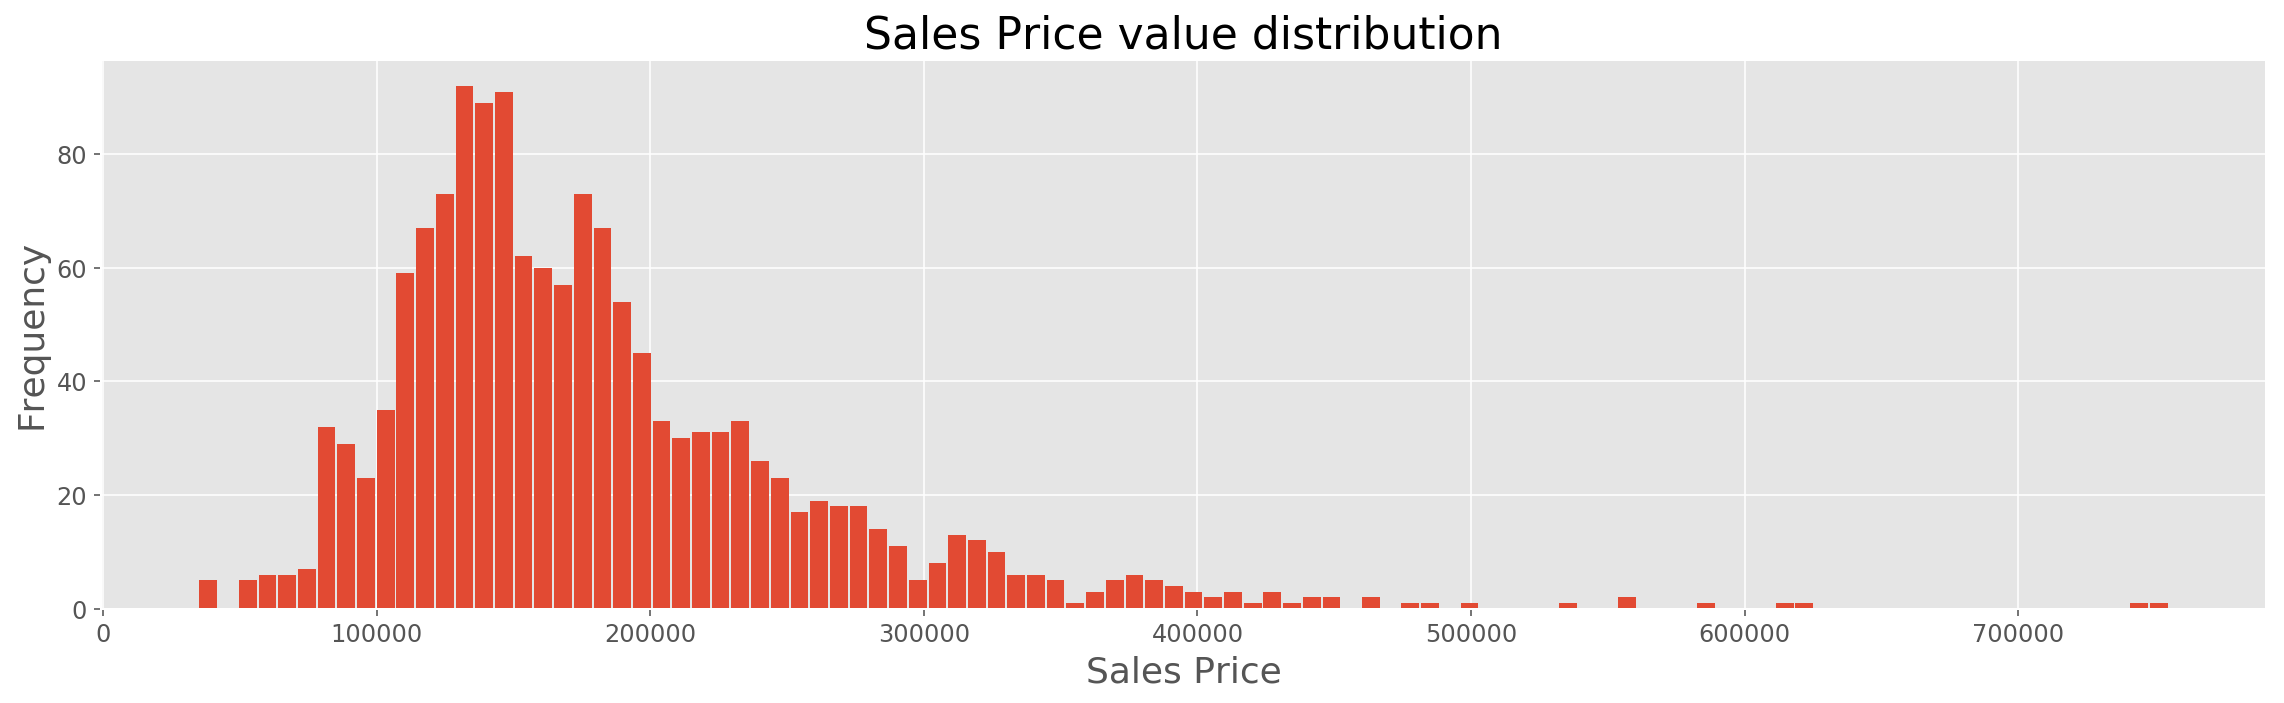

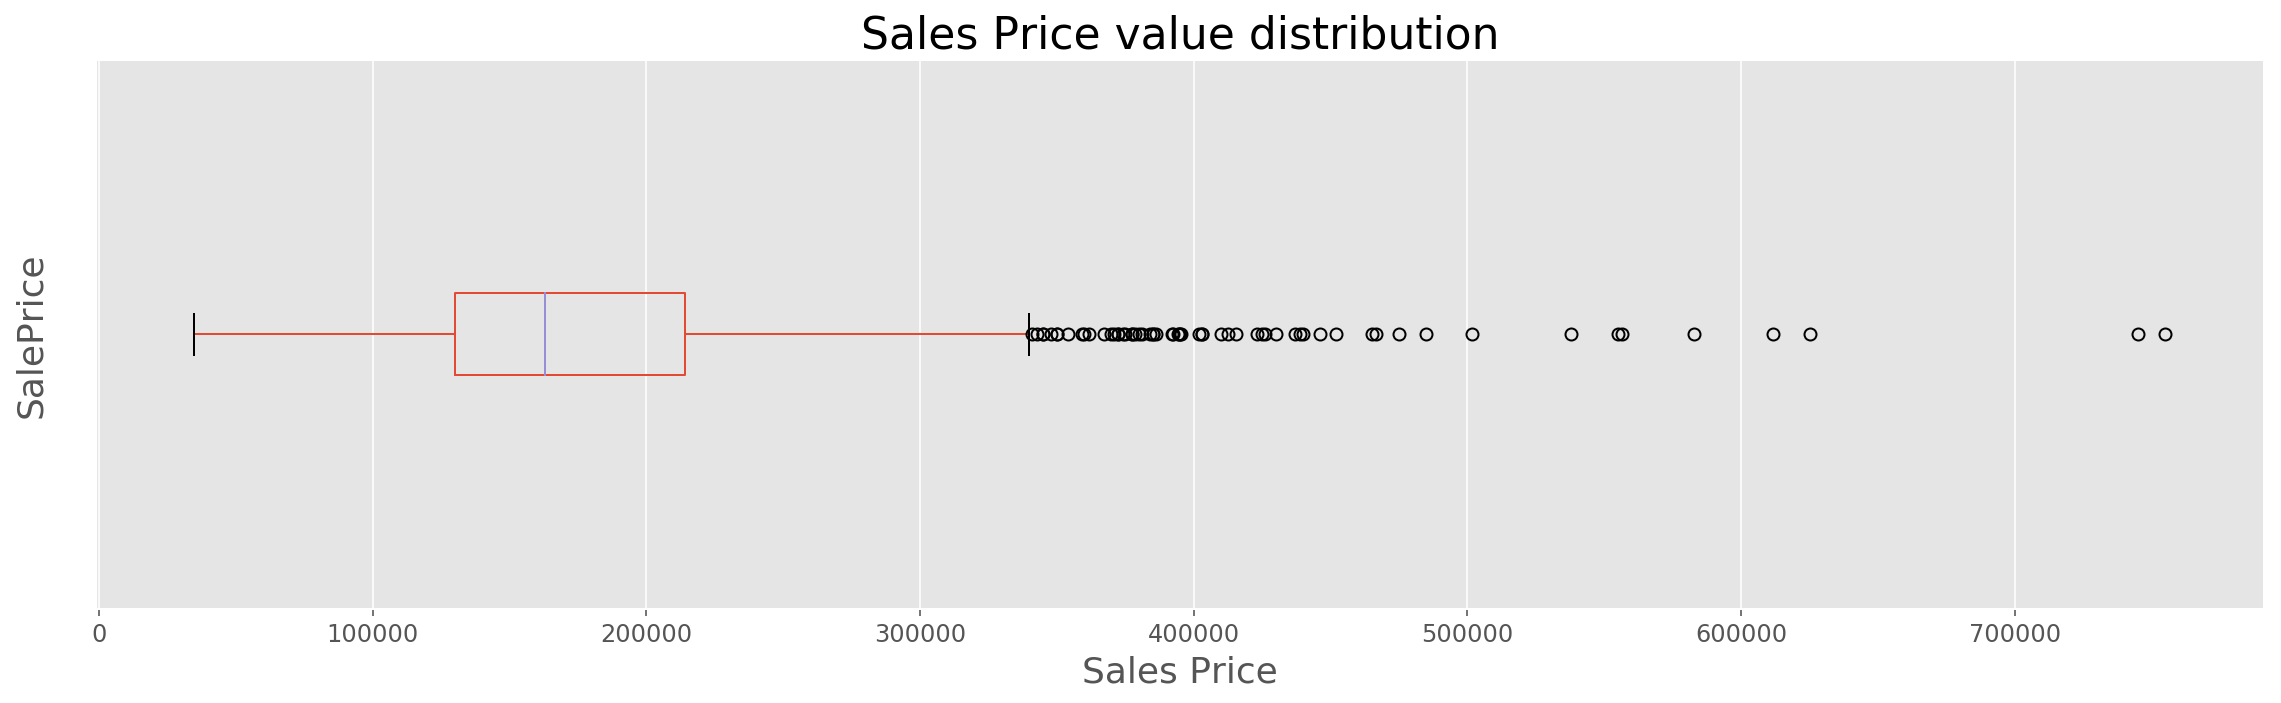

In [5]:
plt.figure(figsize=(16,5))
df.SalePrice.plot(kind="hist", bins=100, rwidth=0.9)
plt.title("Sales Price value distribution")
plt.xlabel("Sales Price")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,5))
df.SalePrice.plot(kind="box", vert=False)
plt.title("Sales Price value distribution")
plt.xlabel("Sales Price")
plt.yticks([0], [''])
plt.ylabel("SalePrice\n", rotation=90)
plt.tight_layout()
plt.show()

The **distribution of `SalePrice` is quite skewed**. The values don't seem normally distributed at all. 

We too can observe a lot of **outliers** on the upper end of the price spectrum. **But what exactly is an outlier?** And **can we isolate the outliers with statistical methods?**

[Taken from machinelearningmastery.com:](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)

>**An outlier is an observation that is unlike the other observations.** It is rare, or distinct, or does not fit in some way. 

>_Outliers can have many causes, such as: Measurement or input error, data corruption or true outlier observation (e.g. Michael Jordan in basketball).
**There is no precise way to define and identify outliers in general because of the specifics of each dataset.** Instead, you, or a domain expert, must interpret the raw observations and decide whether a value is an outlier or not.
Nevertheless, we can use statistical methods to identify observations that appear to be rare or unlikely given the available data._ 

Outliers will very likely decrease our models accuracy – since they make no sense and do not follow any regularities that can be learned by the algorithm. They are wrong and have to be excluded from the training data. 

A sound practical approach for _normally distributed data_ is to filter values that lie beyond 3 standard deviations from the mean. Since our sale price variable is not normally distributed we can use the **Interquartile Range Method**.  

The IQR is the difference between the 25th and 75th percentile range (e.g. the width of the box in the boxplot above). The outer bounds of a regular distribution are 1.5 * IQR. **A factor (called «k») of 3 or more can be used to identify values that are extreme outliers.** So let's try that.



In [6]:
# calculate percentiles and IQR
q25 = percentile(df.SalePrice, 25)
q75 = percentile(df.SalePrice, 75)
iqr = q75 - q25

# calculate normal and extreme upper and lower cut off
cut_off = iqr * 3
lower = q25 - cut_off 
upper = q75 + cut_off

print(f'Percentiles:\n25th  =  {q25}\n75th  =  {q75}\n\nIQR   =   {iqr}\nlower = {lower}\nupper =  {upper}')

Percentiles:
25th  =  129975.0
75th  =  214000.0

IQR   =   84025.0
lower = -122100.0
upper =  466075.0


The lower bound is negative and therefore can be ignored. 

**The upper bound is 466'075 USD.** So let's filter out samples beyond that cut off.

In [7]:
df[df.SalePrice > upper]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
178    179          20       RL     63.00000    17423   Pave   NaN      IR1   
185    186          75       RM     90.00000    22950   Pave   NaN      IR2   
440    441          20       RL    105.00000    15431   Pave   NaN      Reg   
691    692          60       RL    104.00000    21535   Pave   NaN      IR1   
769    770          60       RL     47.00000    53504   Pave   NaN      IR2   
798    799          60       RL    104.00000    13518   Pave   NaN      Reg   
803    804          60       RL    107.00000    13891   Pave   NaN      Reg   
898    899          20       RL    100.00000    12919   Pave   NaN      IR1   
1046  1047          60       RL     85.00000    16056   Pave   NaN      IR1   
1169  1170          60       RL    118.00000    35760   Pave   NaN      IR1   
1182  1183          60       RL    160.00000    15623   Pave   NaN      IR1   
1373  1374          20       RL          nan    11400   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
178          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
185          Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
440          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
691          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
769          HLS    AllPub  ...        0    NaN    NaN         NaN       0   
798          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
803          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
898          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1046         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1169         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   
1373         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
178       7   2009       New        Partial     501837  
185       6   2006        WD         Normal     475000  
440       4   2009        WD         Normal     555000  
691       1   2007        WD         Normal     755000  
769       6   2010        WD         Normal     538000  
798       7   2009       New        Partial     485000  
803       1   2009       New        Partial     582933  
898       3   2010       New        Partial     611657  
1046      7   2006       New        Partial     556581  
1169      7   2006        WD         Normal     625000  
1182      7   2007        WD        Abnorml     745000  
1373      3   2007        WD         Normal     466500  

[12 rows x 81 columns]

Now that we have identified outliers, **let's see how skewed the distribution is**. The measure is [**skewness**](https://en.wikipedia.org/wiki/Skewness). 

A normal distribution has a skewness of `0`. A positive value of skewness means that the tail is on the right, and vice versa with negative values. 

Pandas provides a convenient function. We add a probability plot to visualize the skewness of the sale prices.

The skewness of SalePrice is: 1.88


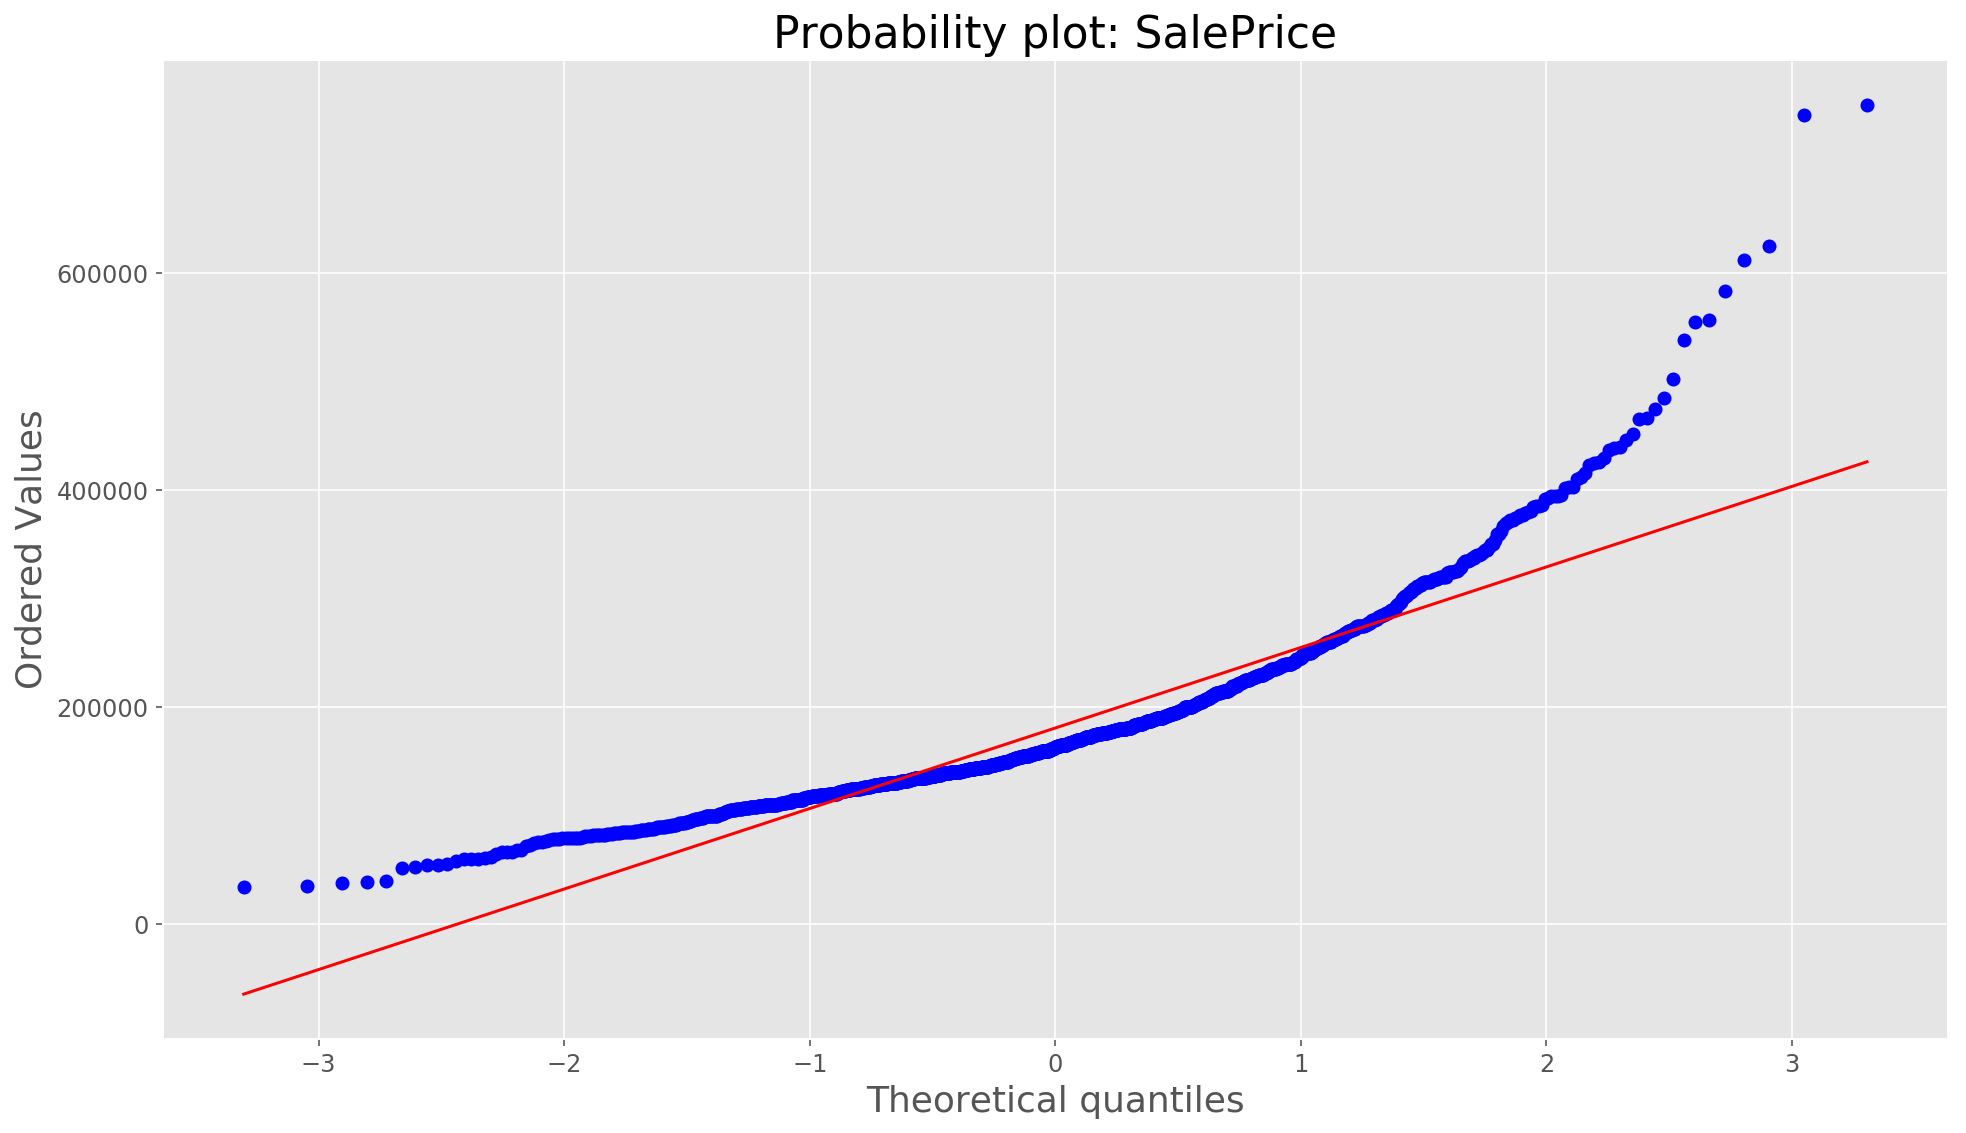

In [8]:
print(f"The skewness of SalePrice is: {df.SalePrice.skew():.2f}")

plt.figure(figsize=(16,9))
_ = stats.probplot(df['SalePrice'], plot=plt)
plt.title("Probability plot: SalePrice")
plt.show()

As expected the skewness is a positive value. From the plot we can observe the deviations from the expected, theoretical values of normal distribution. These also makes sense – they tend to be higher than expected on the right end – making it a long tail.

Just for the fun of it let's examine the skewness of all numerical values.

In [9]:
display(df.select_dtypes("number").skew().sort_values(ascending=False))

MiscVal         24.47679
PoolArea        14.82837
LotArea         12.20769
3SsnPorch       10.30434
LowQualFinSF     9.01134
KitchenAbvGr     4.48840
BsmtFinSF2       4.25526
ScreenPorch      4.12221
BsmtHalfBath     4.10340
EnclosedPorch    3.08987
MasVnrArea       2.66908
OpenPorchSF      2.36434
LotFrontage      2.16357
SalePrice        1.88288
BsmtFinSF1       1.68550
WoodDeckSF       1.54138
TotalBsmtSF      1.52425
MSSubClass       1.40766
1stFlrSF         1.37676
GrLivArea        1.36656
BsmtUnfSF        0.92027
2ndFlrSF         0.81303
OverallCond      0.69307
TotRmsAbvGrd     0.67634
HalfBath         0.67590
Fireplaces       0.64957
BsmtFullBath     0.59607
OverallQual      0.21694
MoSold           0.21205
BedroomAbvGr     0.21179
GarageArea       0.17998
YrSold           0.09627
FullBath         0.03656
Id               0.00000
GarageCars      -0.34255
YearRemodAdd    -0.50356
YearBuilt       -0.61346
GarageYrBlt     -0.64941
dtype: float64

`LotArea` looks relevant and is one of the most skewed features.

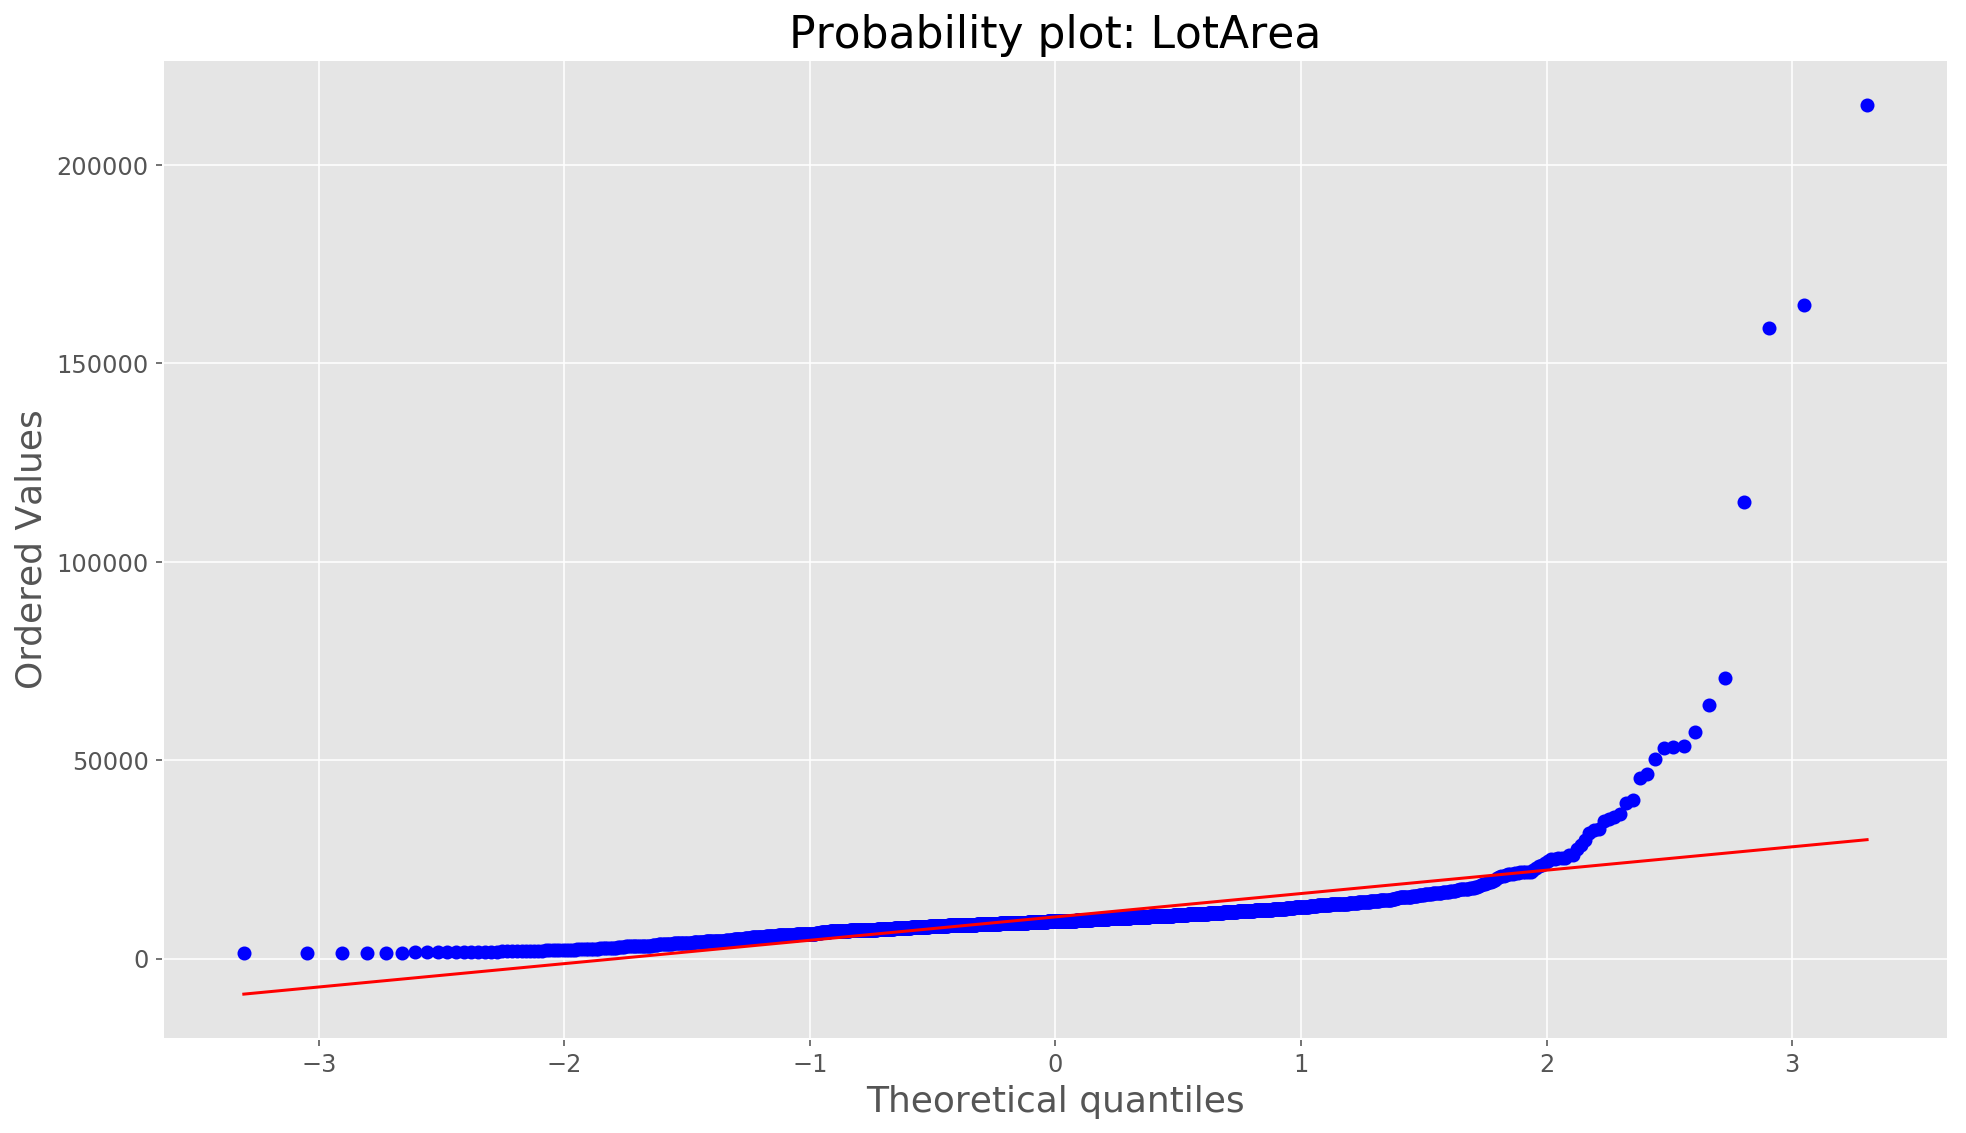

In [10]:
plt.figure(figsize=(16, 9))
_ = stats.probplot(df['LotArea'], plot=plt)
plt.title("Probability plot: LotArea")
plt.show()

Now back to sale price. Let's log transform the values and pot again.

Skewness of log transformed sale prices: 0.12


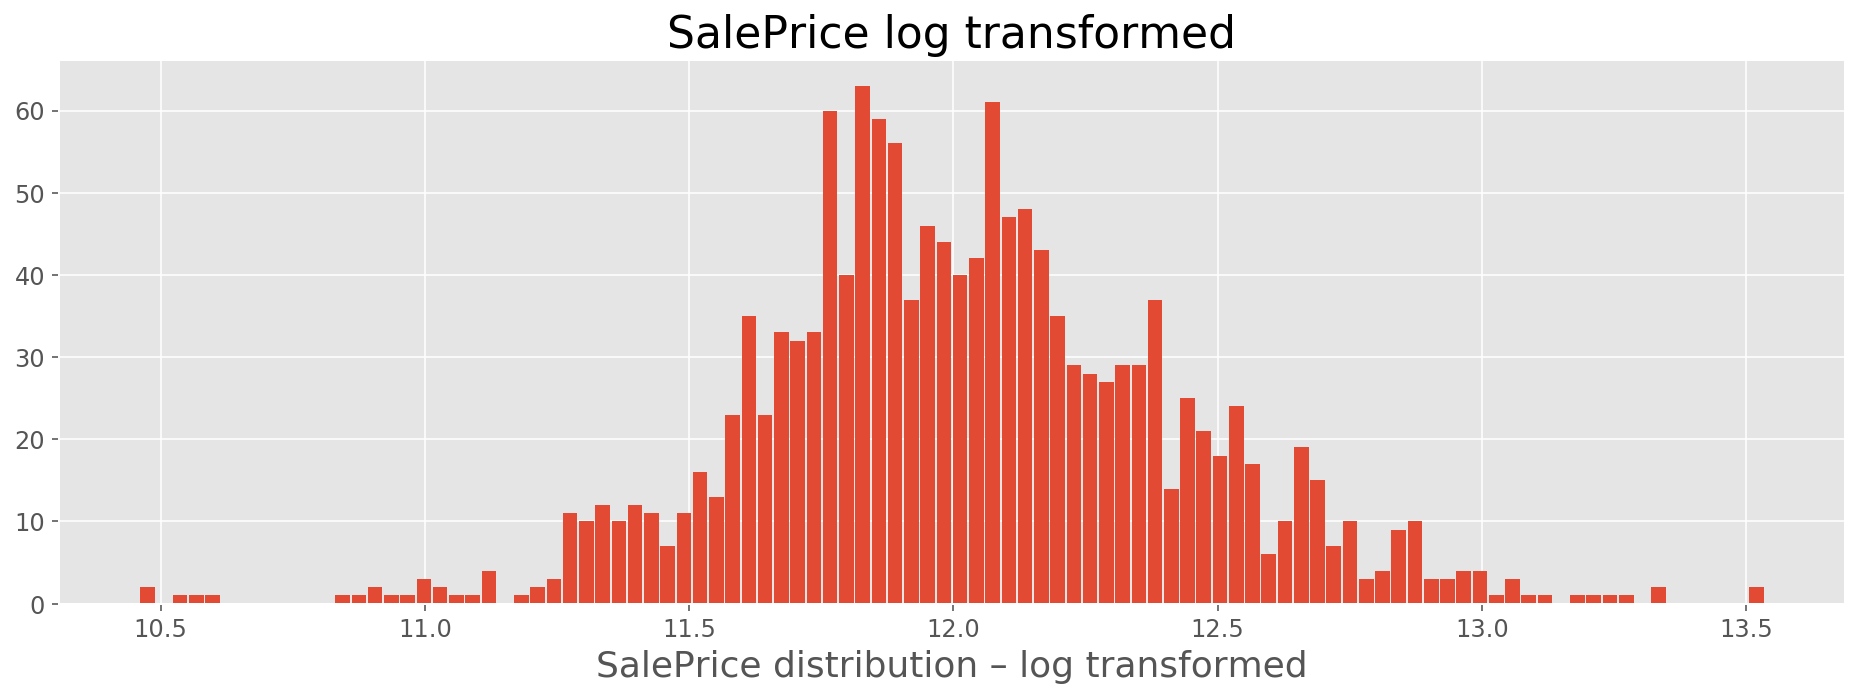

In [11]:
logSalePrice = np.log1p(df.SalePrice.values)
print(f"Skewness of log transformed sale prices: {pd.DataFrame(logSalePrice).skew().values[0]:.2f}")

plt.figure(figsize=(16,5));
plt.hist(logSalePrice, bins=100, rwidth=0.9)
plt.title("SalePrice log transformed")
plt.xlabel("SalePrice distribution – log transformed")
plt.show()

This looks much better. Again – we keep that in mind for later, when we actually prepare the data.

Let's get more **detailed stats about the distribution**.

In [12]:
display(df.SalePrice.describe())

count     1460.00000
mean    180921.19589
std      79442.50288
min      34900.00000
25%     129975.00000
50%     163000.00000
75%     214000.00000
max     755000.00000
Name: SalePrice, dtype: float64

This gives us some more insight:

* Prices **range from 34'900 USD to a hefty 755'000**.
* The **average sale price (the mean) is 180'921 USD**. 
* The **median is lower: 163'000 USD**. This is to be expected since the _mean_ is sensitive to outliers and in this case pulled towards outlying higher values. 
* The **standard deviation** is around 79k. So on average, prices in the dataset tend to vary by this amount around the mean of ~180k.

How are **numerical features correlated to `SalePrice`**? 

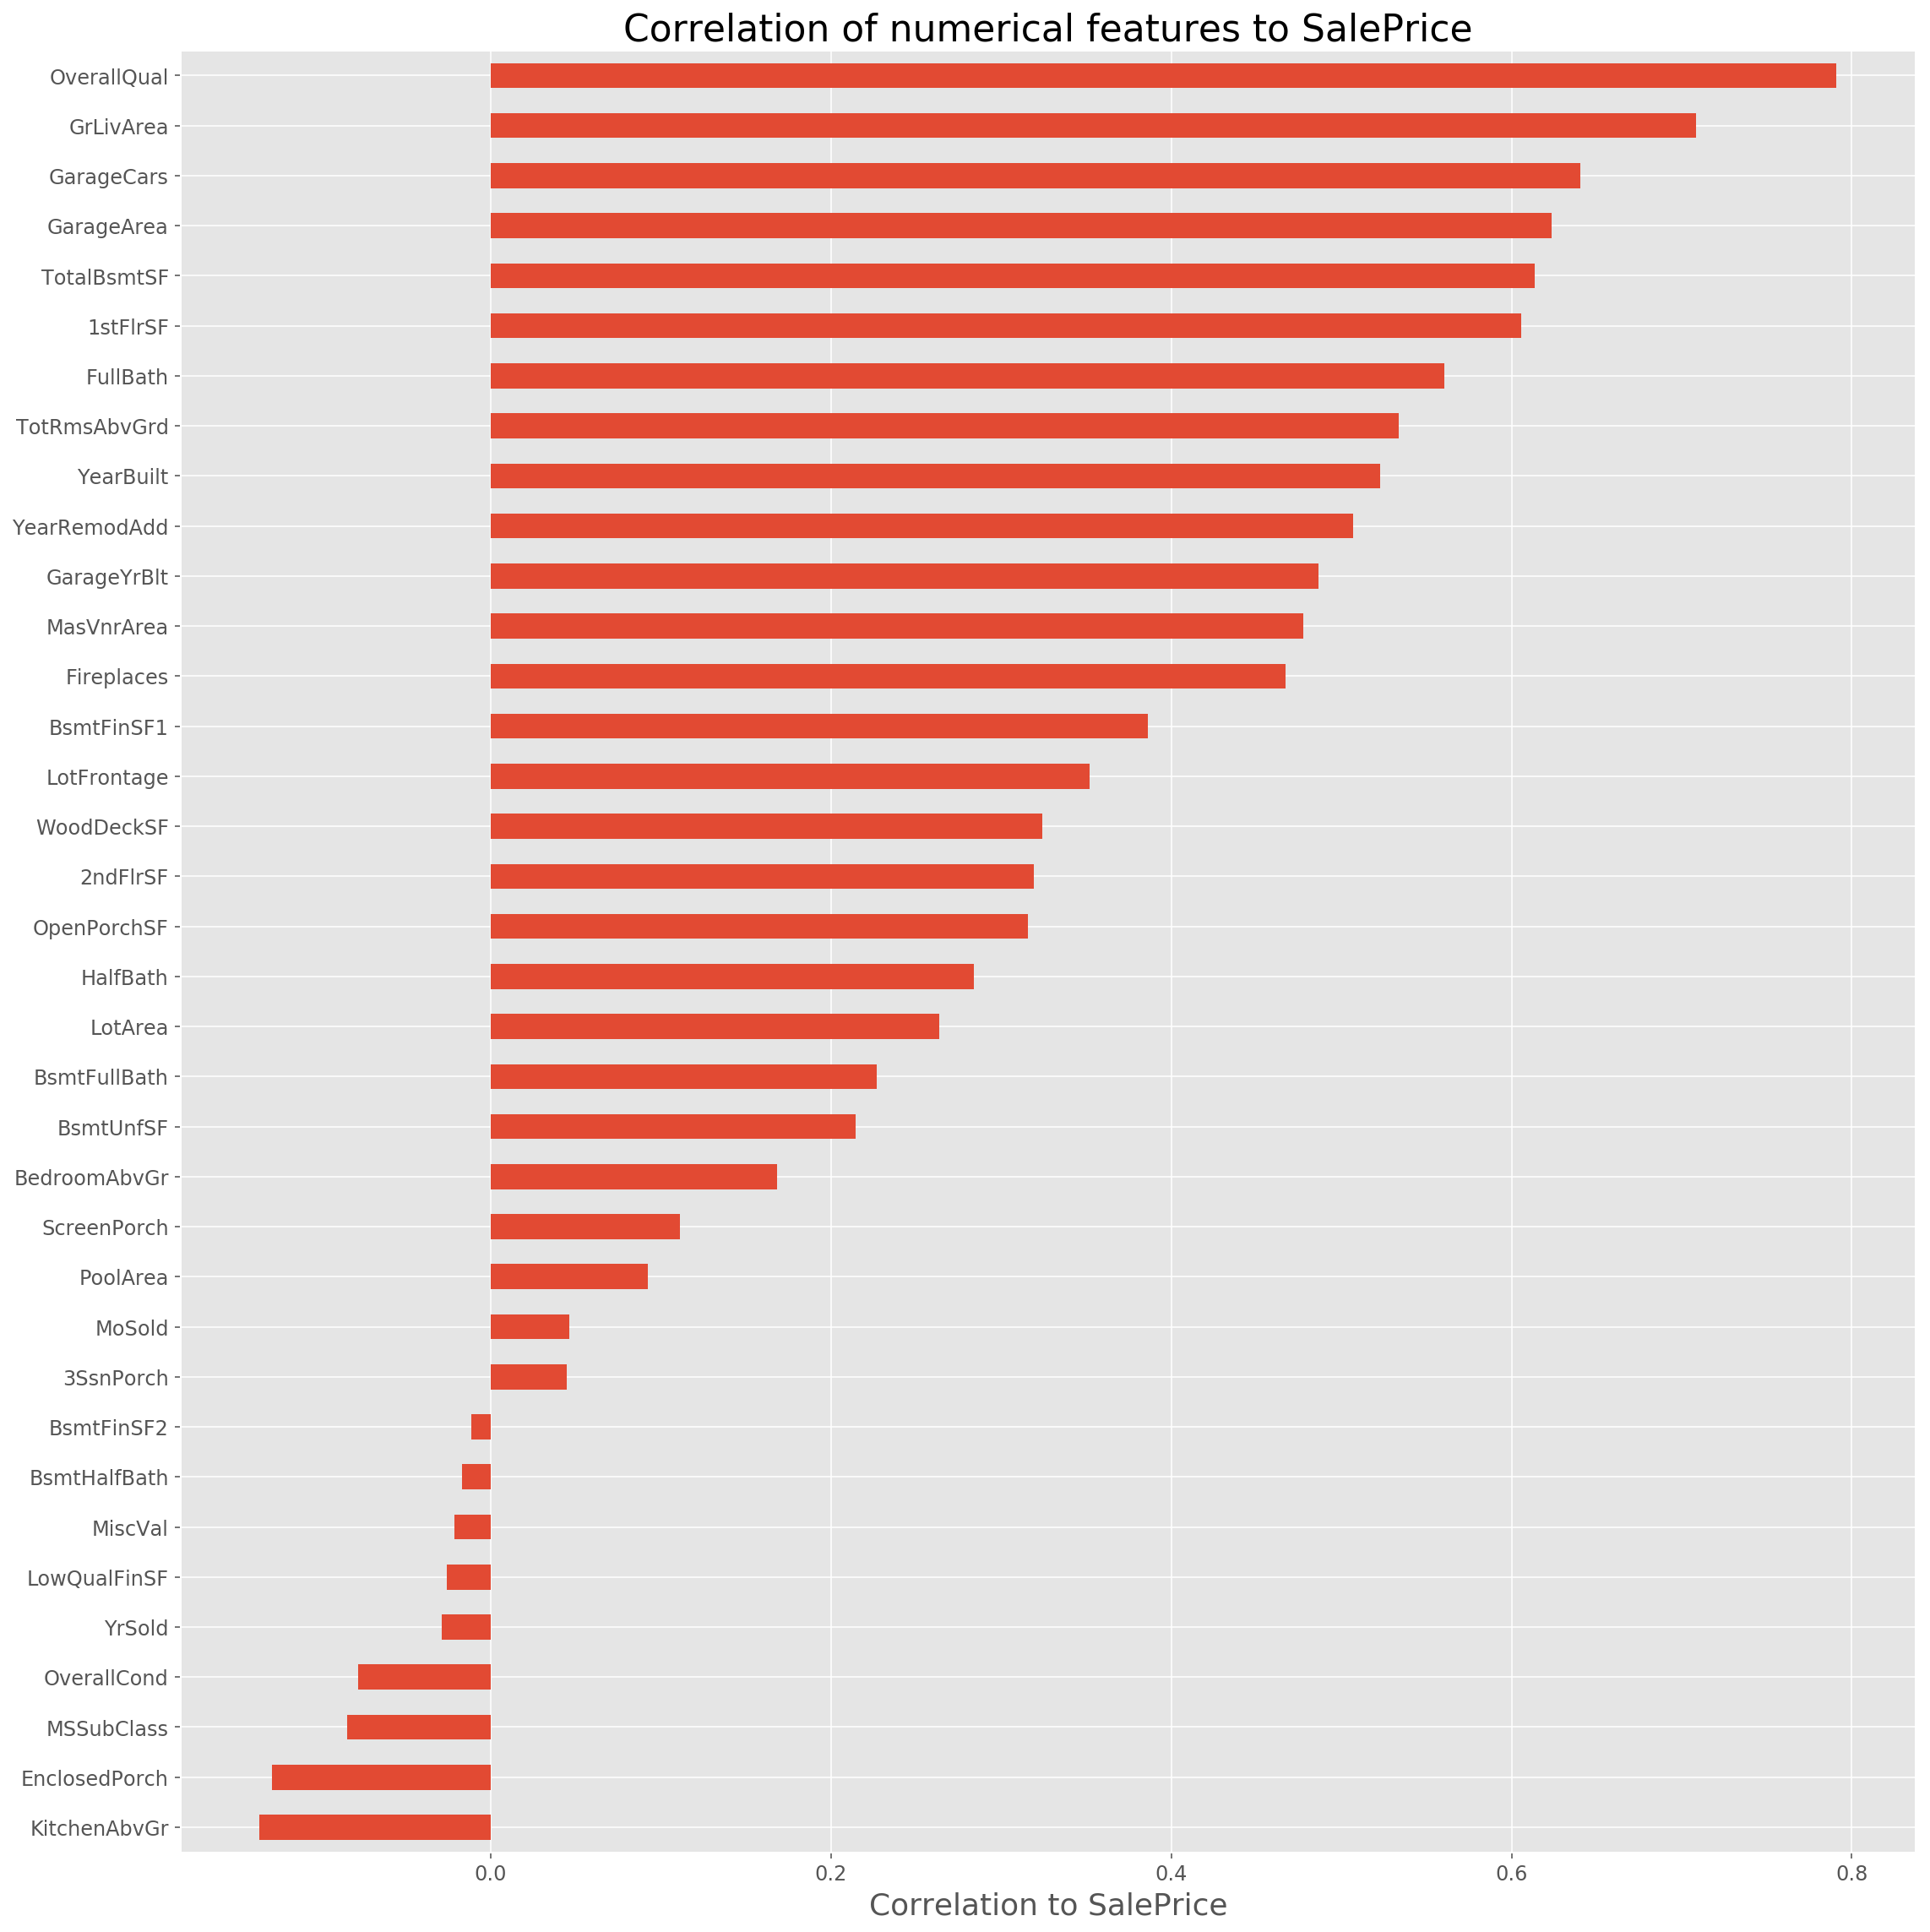

In [13]:
# we drop Id (not relevant)
corr = df.drop(["Id"], axis=1).select_dtypes(include="number").corr()

plt.figure(figsize=(16,16));
corr["SalePrice"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

Not surprisingly most positively correlated features are e.g. the overall quality, living area, number and area of garages. 

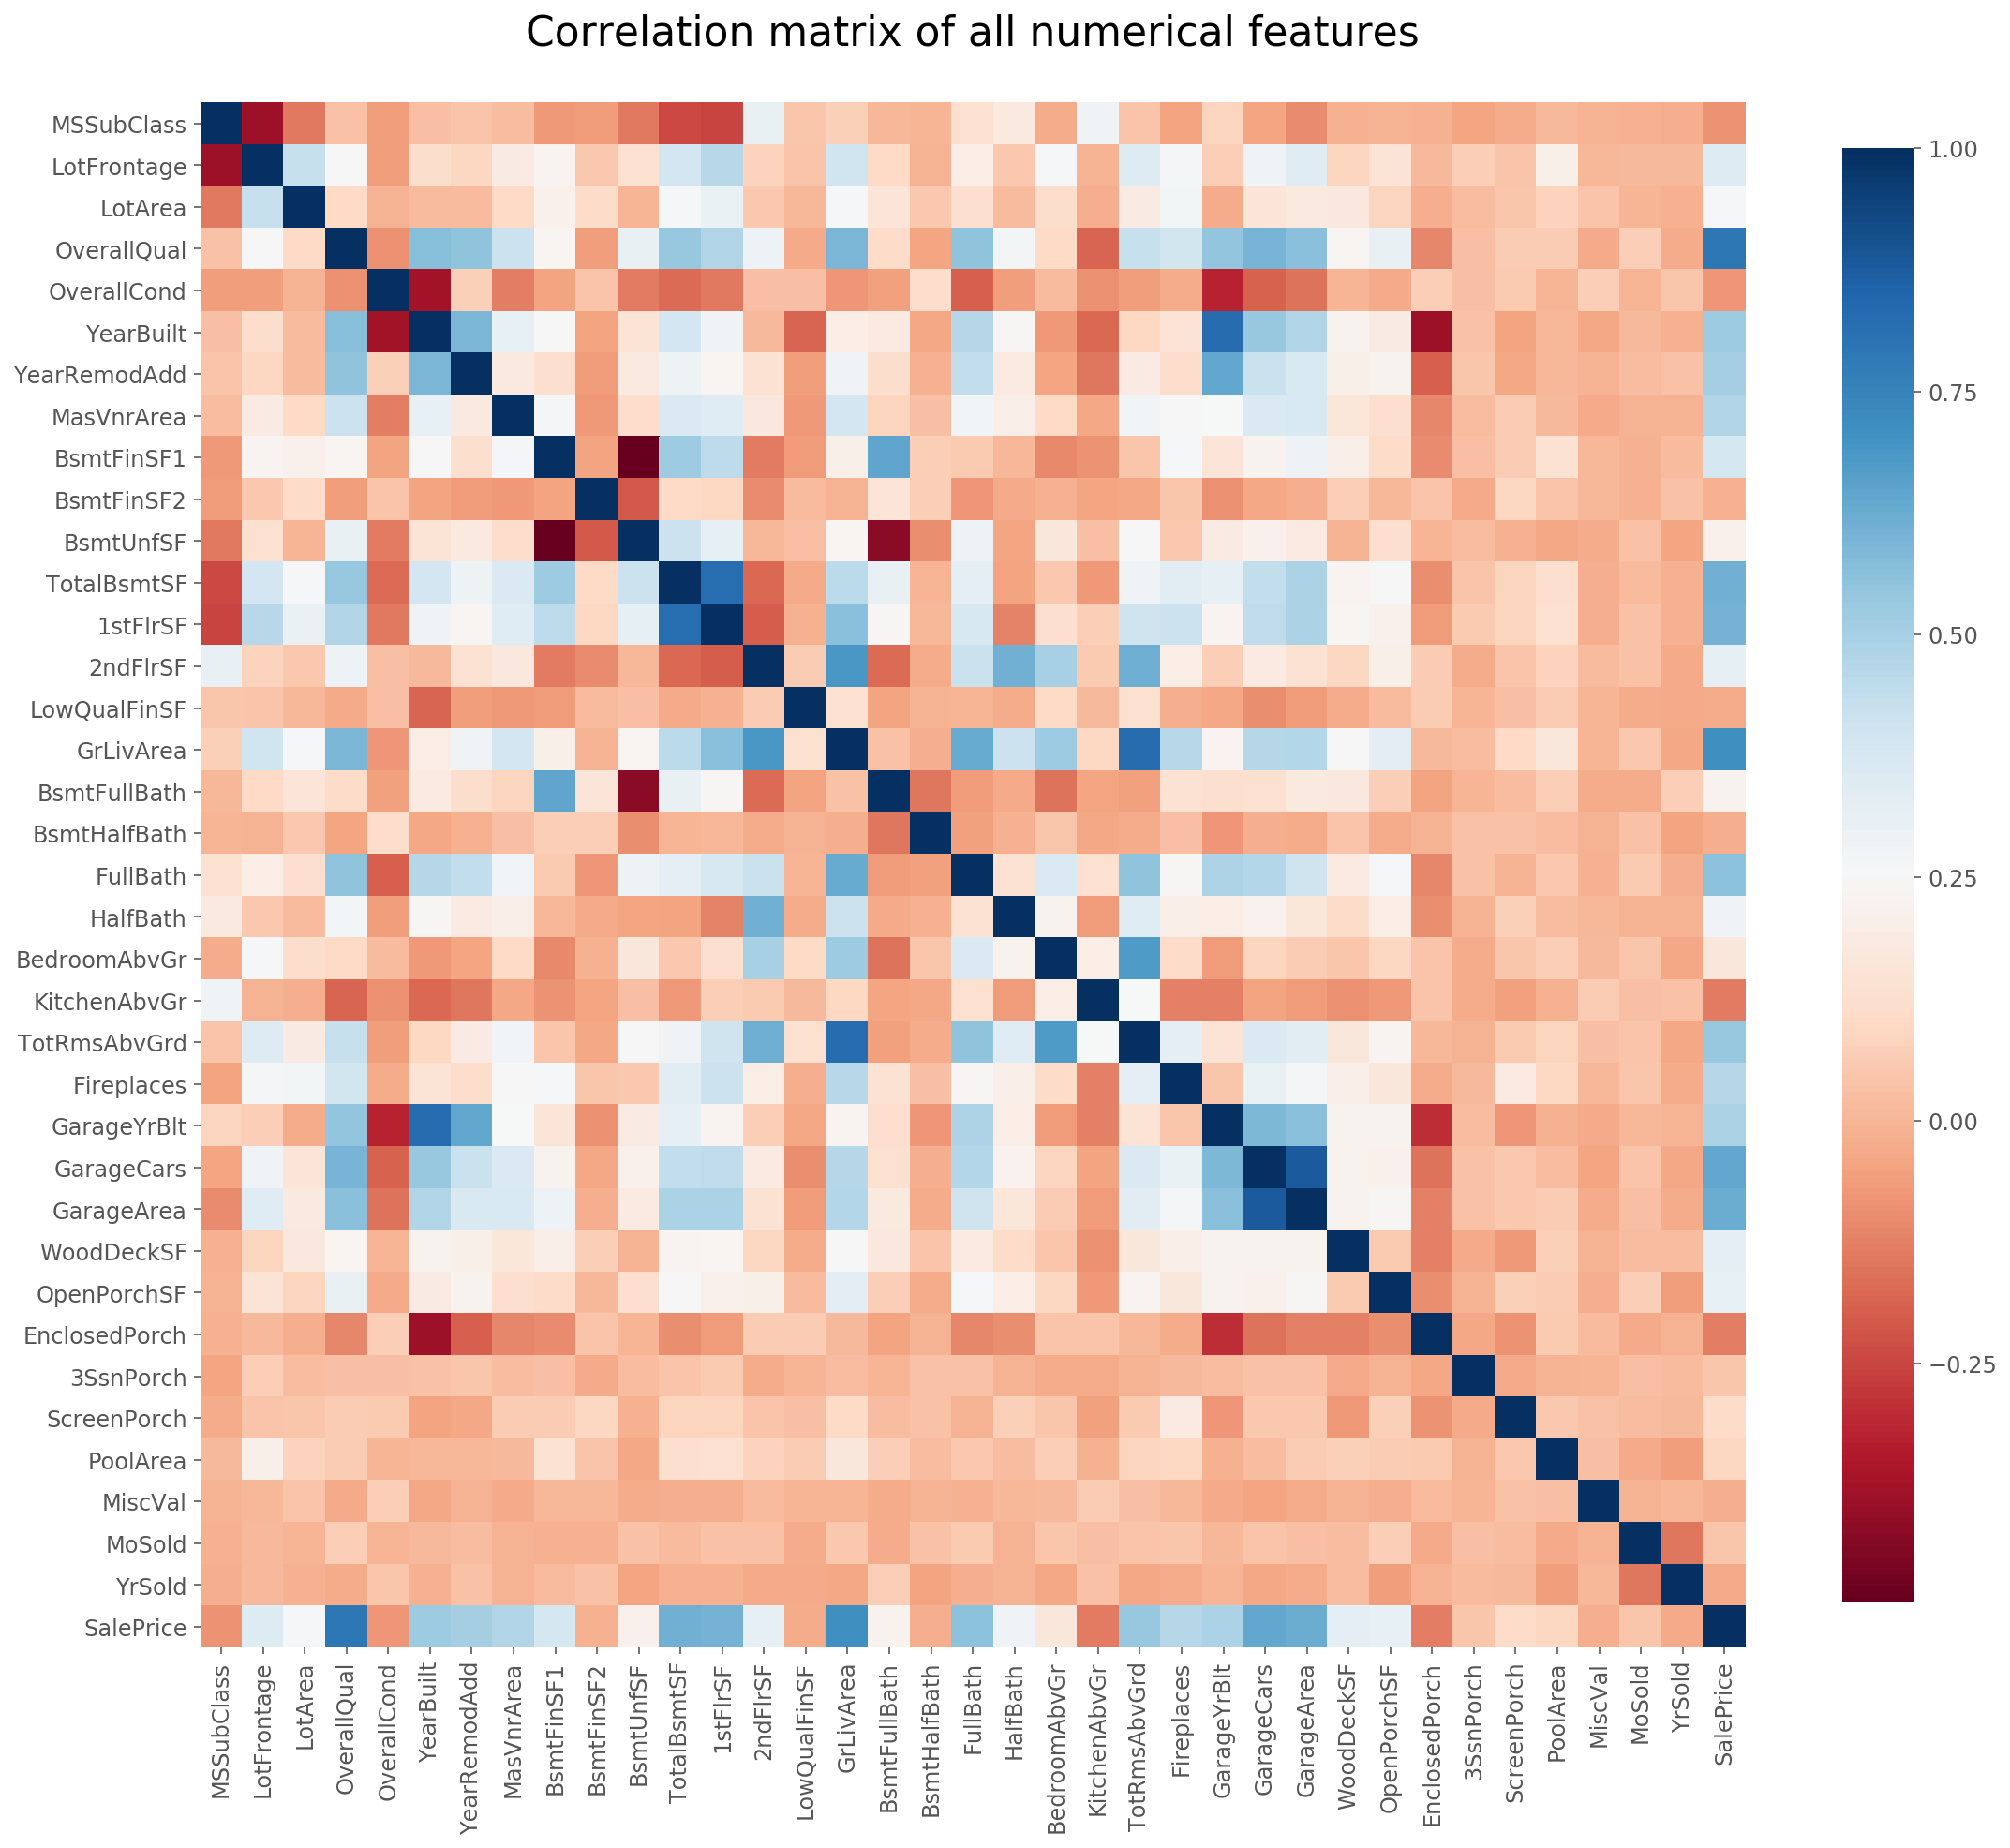

In [14]:
# sort by SalePrice to make more sense in row order
plt.subplots(figsize=(16,16));
sns.heatmap(corr, cmap="RdBu", square=True, cbar_kws={"shrink": .7})
plt.title("Correlation matrix of all numerical features\n")
plt.tight_layout()
plt.show()

Again: Many correlations makes sense on a first glance. E.g. `OverallQual` sticks out highly correlated regarding `SalePrice`. Which is interesting since it is "the overall material and finish of the house" rather than the “overall condition of the house" `OverallCond`.  

There are many details too that we could follow up, just for curiosities sake. E.g. Enclosed porches seem to have fallen out of favor – `YearBuilt` is negatively correlated to `EnclosedPorc`.

To examine the relevant correlations more thoroughly we plot `SalePrice` vs `OverallQual`. The latter is a categorical ranging from «Very poor» = 1 to «Very Excellent» = 10. **Rather than a scatter plot we use box plots for categoricals.**

><span style="color:darkred">Interpreting box plots we have to be very careful to **not confuse width of distribution with count of observations!** A long box in the plot might visually suggest many values, which is misleading. 
    
Let's validate that by plotting bars for counts first.

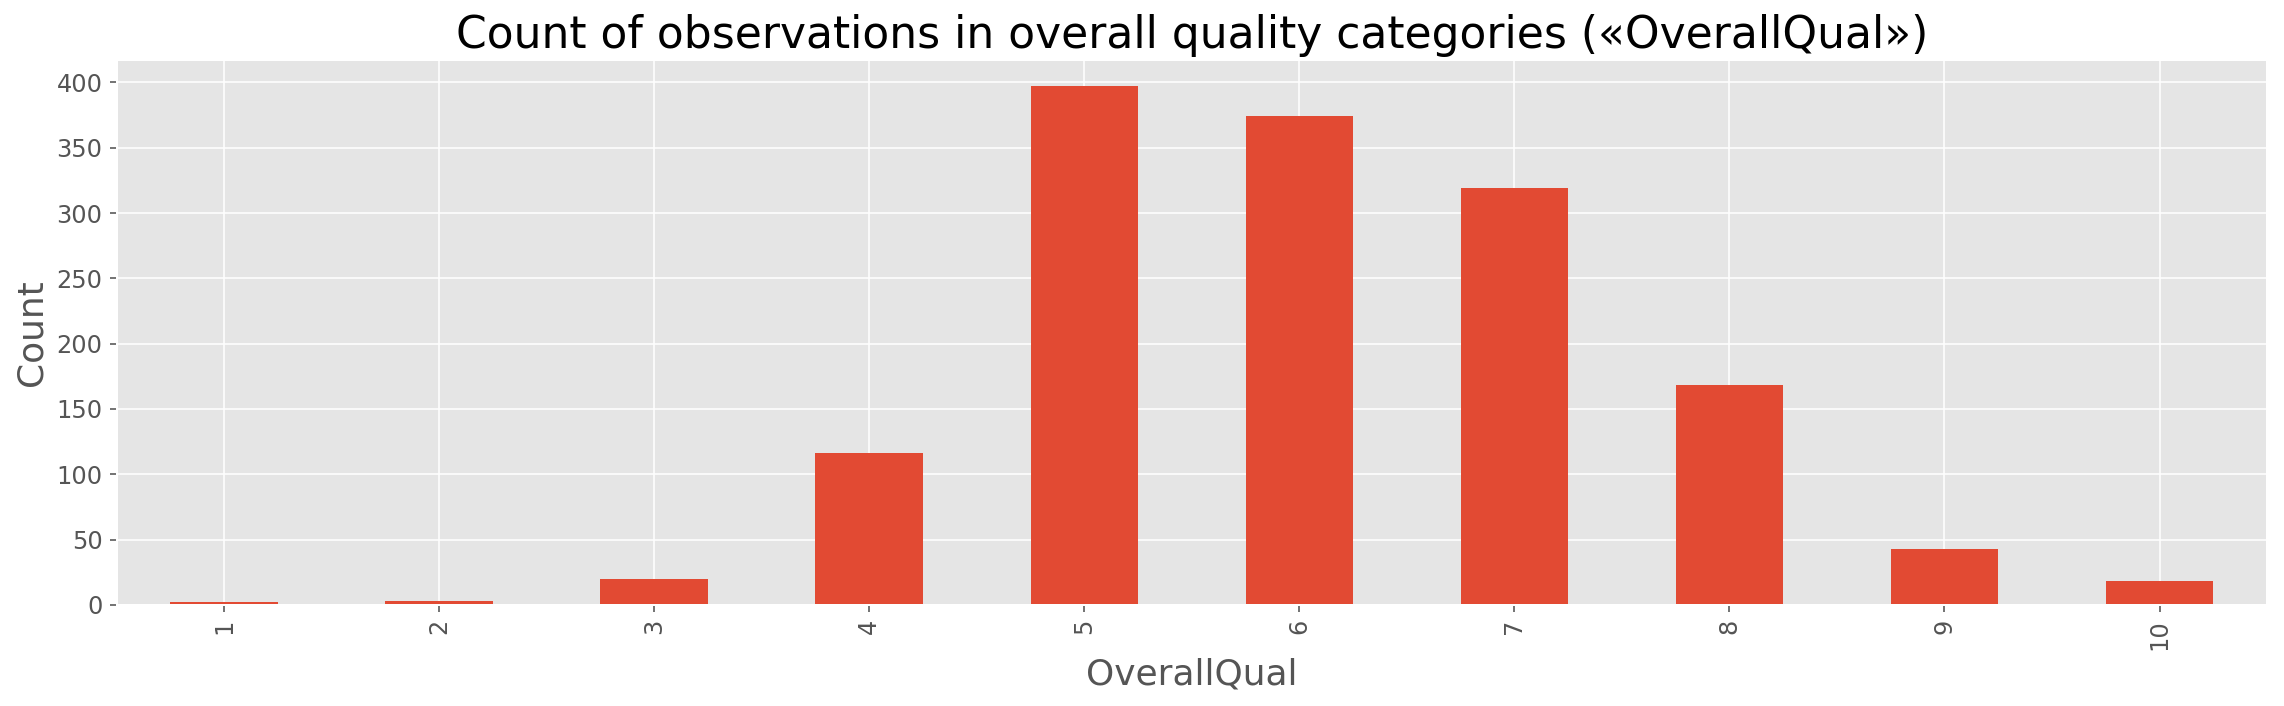

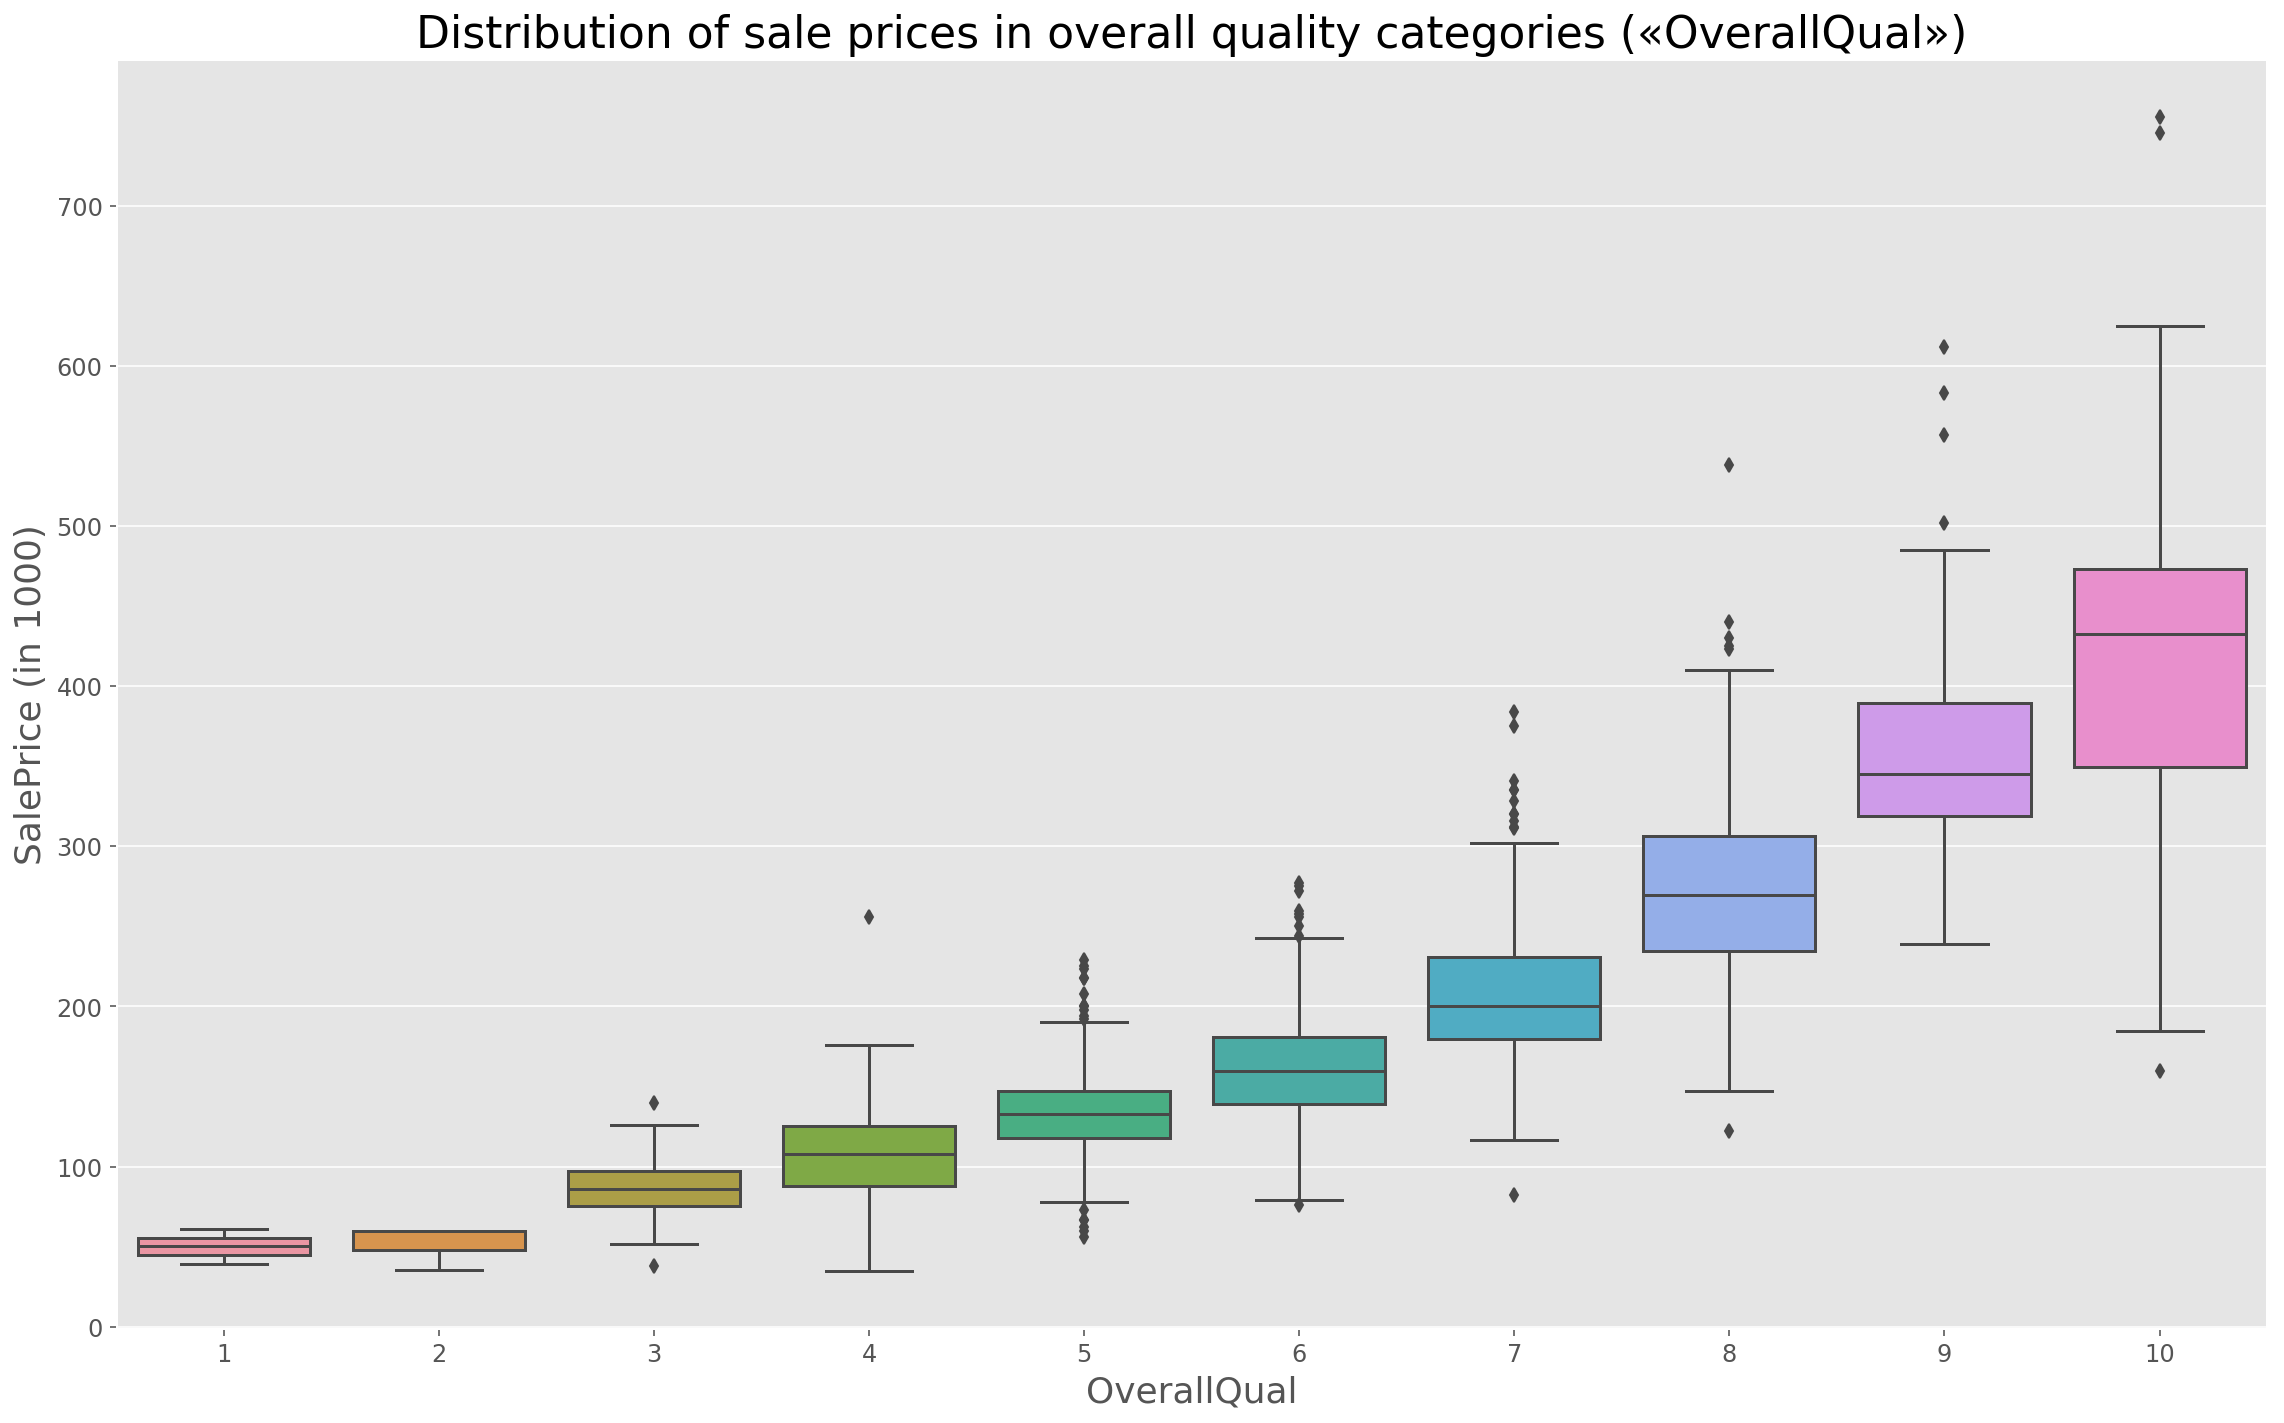

In [15]:
# OverallQual: Rates the overall material and finish of the house
plt.figure(figsize=(16,5));
df.groupby("OverallQual")["SalePrice"].count().plot(kind="bar")
plt.title("Count of observations in overall quality categories («OverallQual»)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,10));
ax = sns.boxplot(x="OverallQual", y="SalePrice", data=df)
plt.title("Distribution of sale prices in overall quality categories («OverallQual»)")
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_1000))
plt.ylabel("SalePrice (in 1000)")
plt.tight_layout()
plt.show()

We observe that:
- A higher overall quality results in higher sale price (obviously).
- **The higher the quality the wider the price range.** Poor & very poor quality buildings have almost the same price range while very good to excellent properties have a much wider range of possible sale prices.
- **Most sales range from average to very good (5-8).**
- There are only very few sales on the tails (1-3, 9-10). 
- In most categories we seem to have some outliers on both ends.

Let's plot the **overall condition** in comparison.

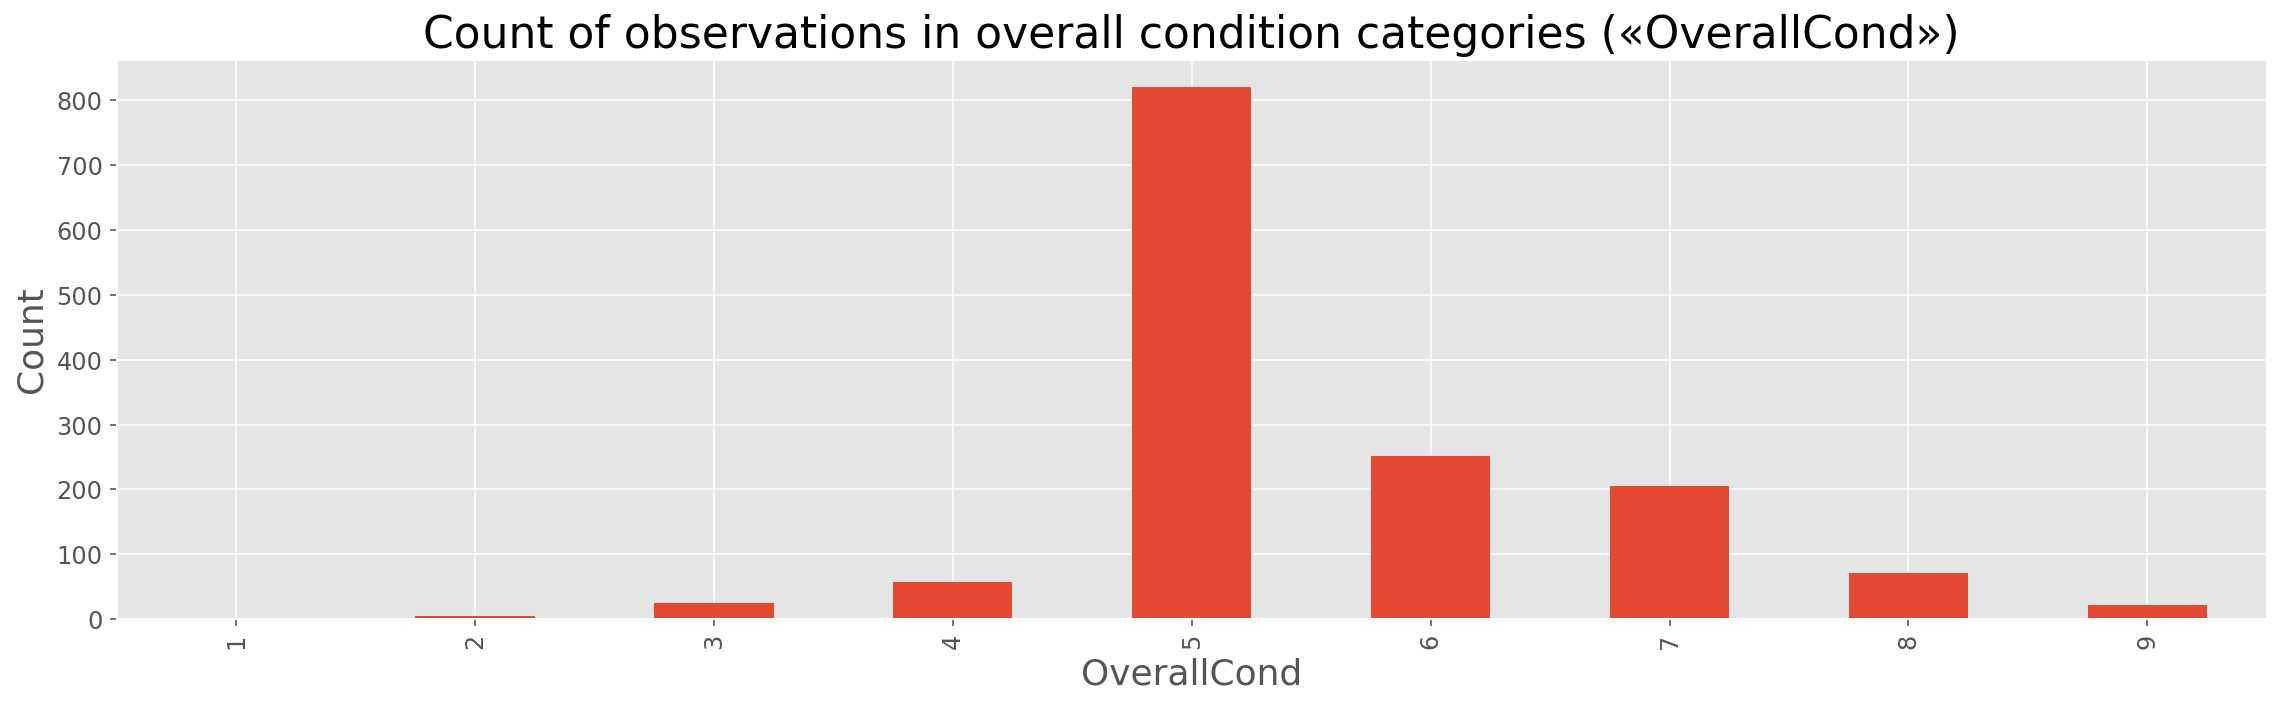

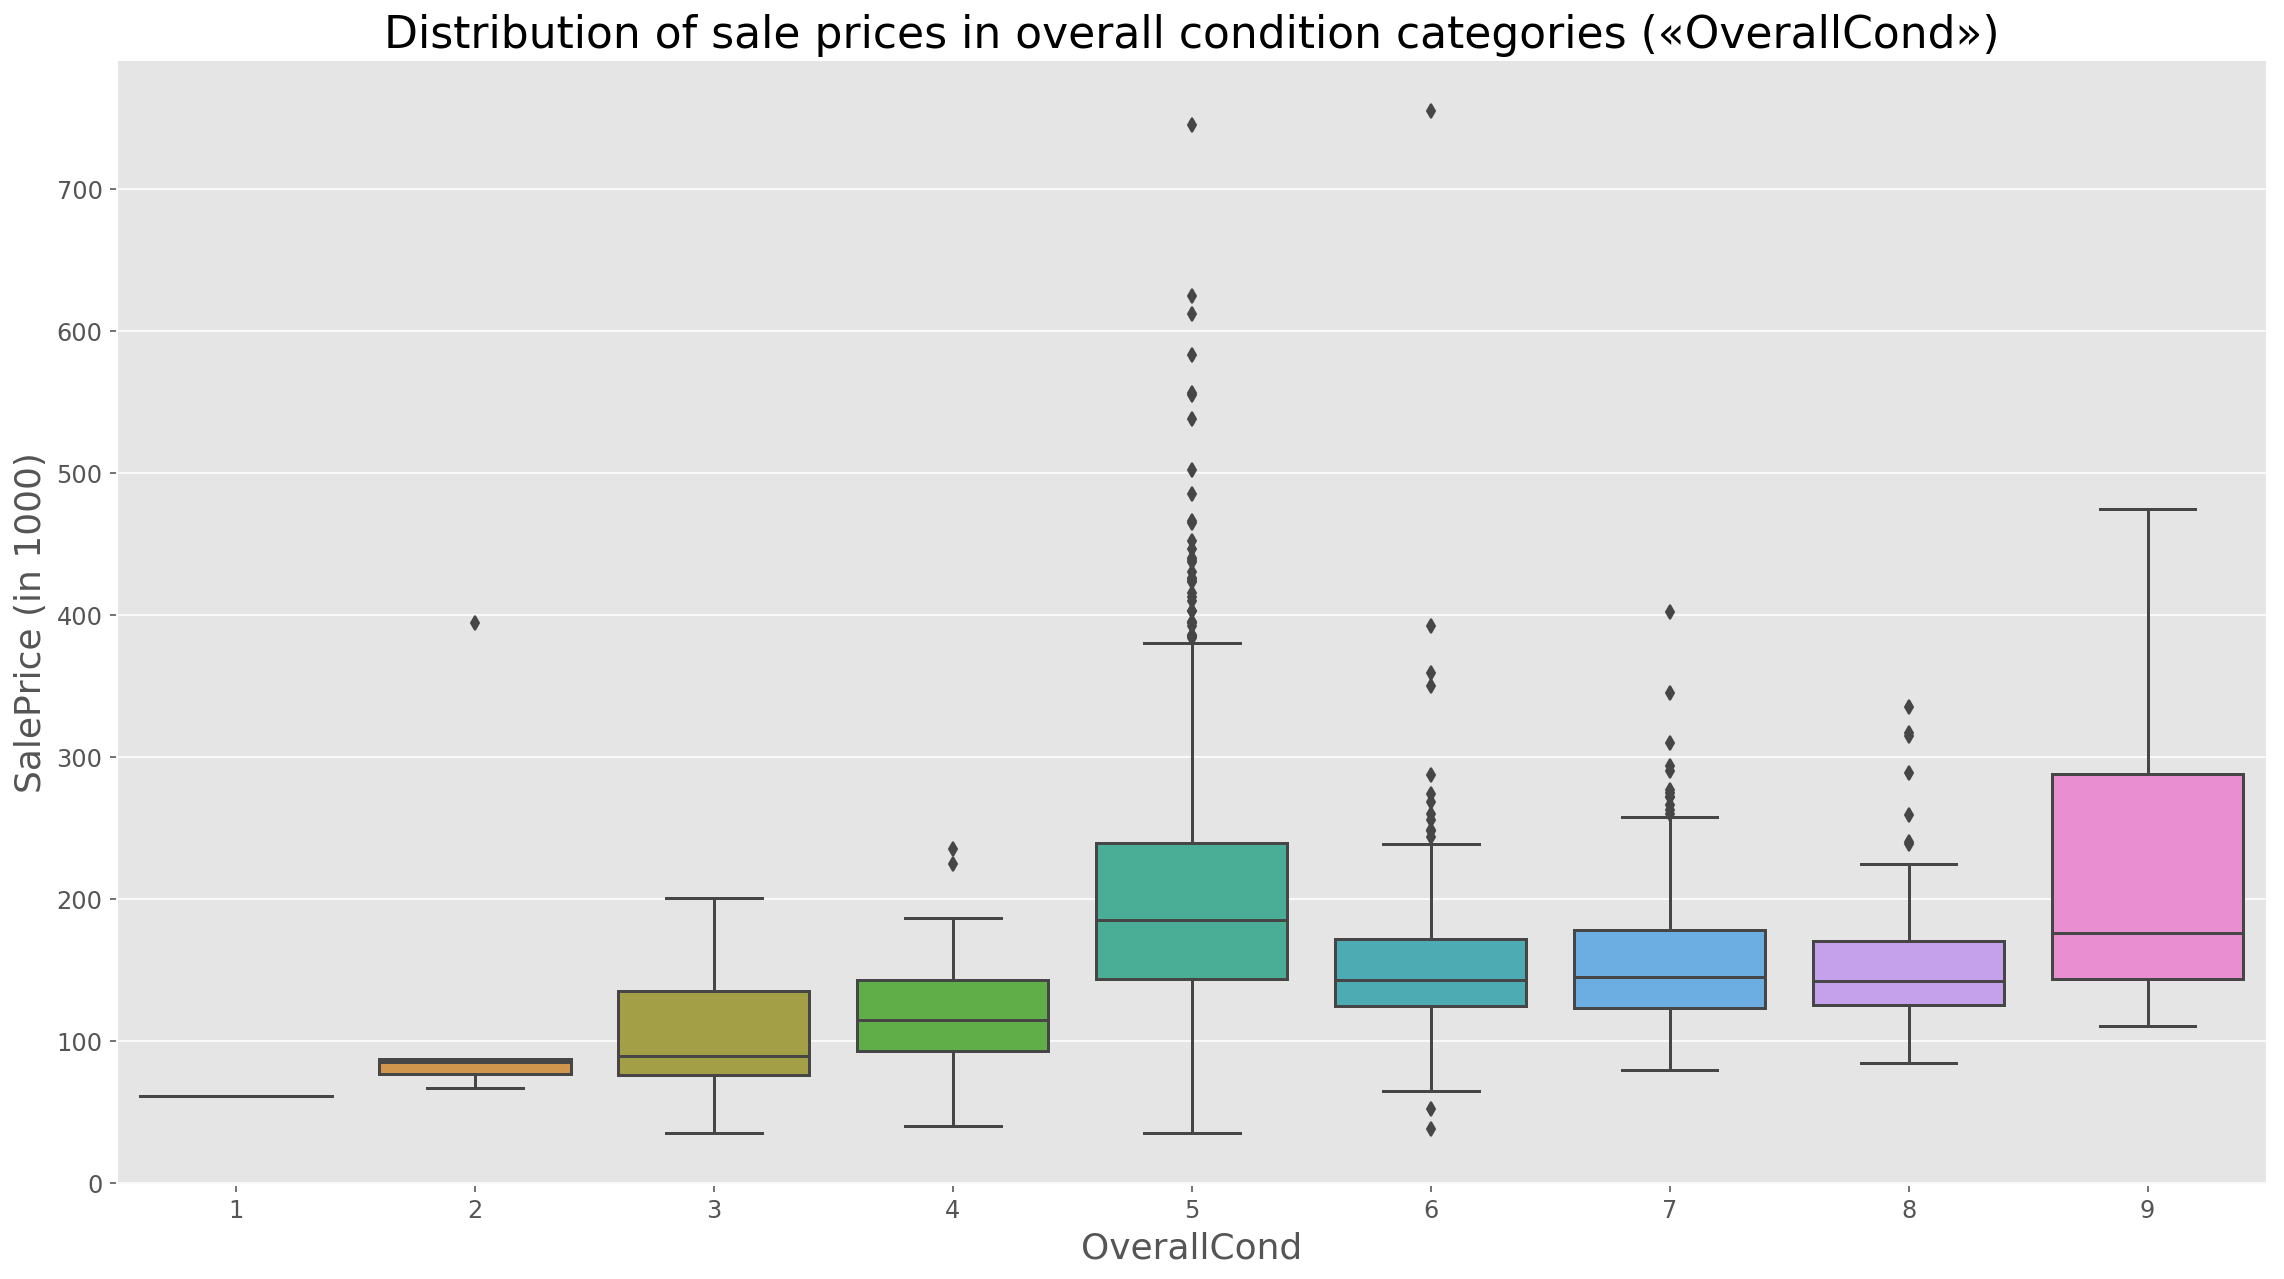

In [16]:
# OverallCond: Rates the overall condition of the house
plt.figure(figsize=(16,5));
df.groupby("OverallCond")["SalePrice"].count().plot(kind="bar")
plt.title("Count of observations in overall condition categories («OverallCond»)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,9));
ax = sns.boxplot(x="OverallCond", y="SalePrice", data=df)
plt.title("Distribution of sale prices in overall condition categories («OverallCond»)")
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_1000))
plt.ylabel("SalePrice (in 1000)")
plt.tight_layout()
plt.show()

We see that:
- Only very few properties are rated below average (5). 
- Average (5) is the category value of overall condition that has by far the most counts.
- **The mean sale price for «Average» is higher than for «Above Average» and higher.**

One possible explanation could be that as long as the house is in average condition it can be fixed to a higher condition without that much additional cost. If the base materials and finish are not good, than a prospective owner would have much more difficulties upping the property. 

By the way: **If we want to visually _combine count and distribution_ we can use a [swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot).** 

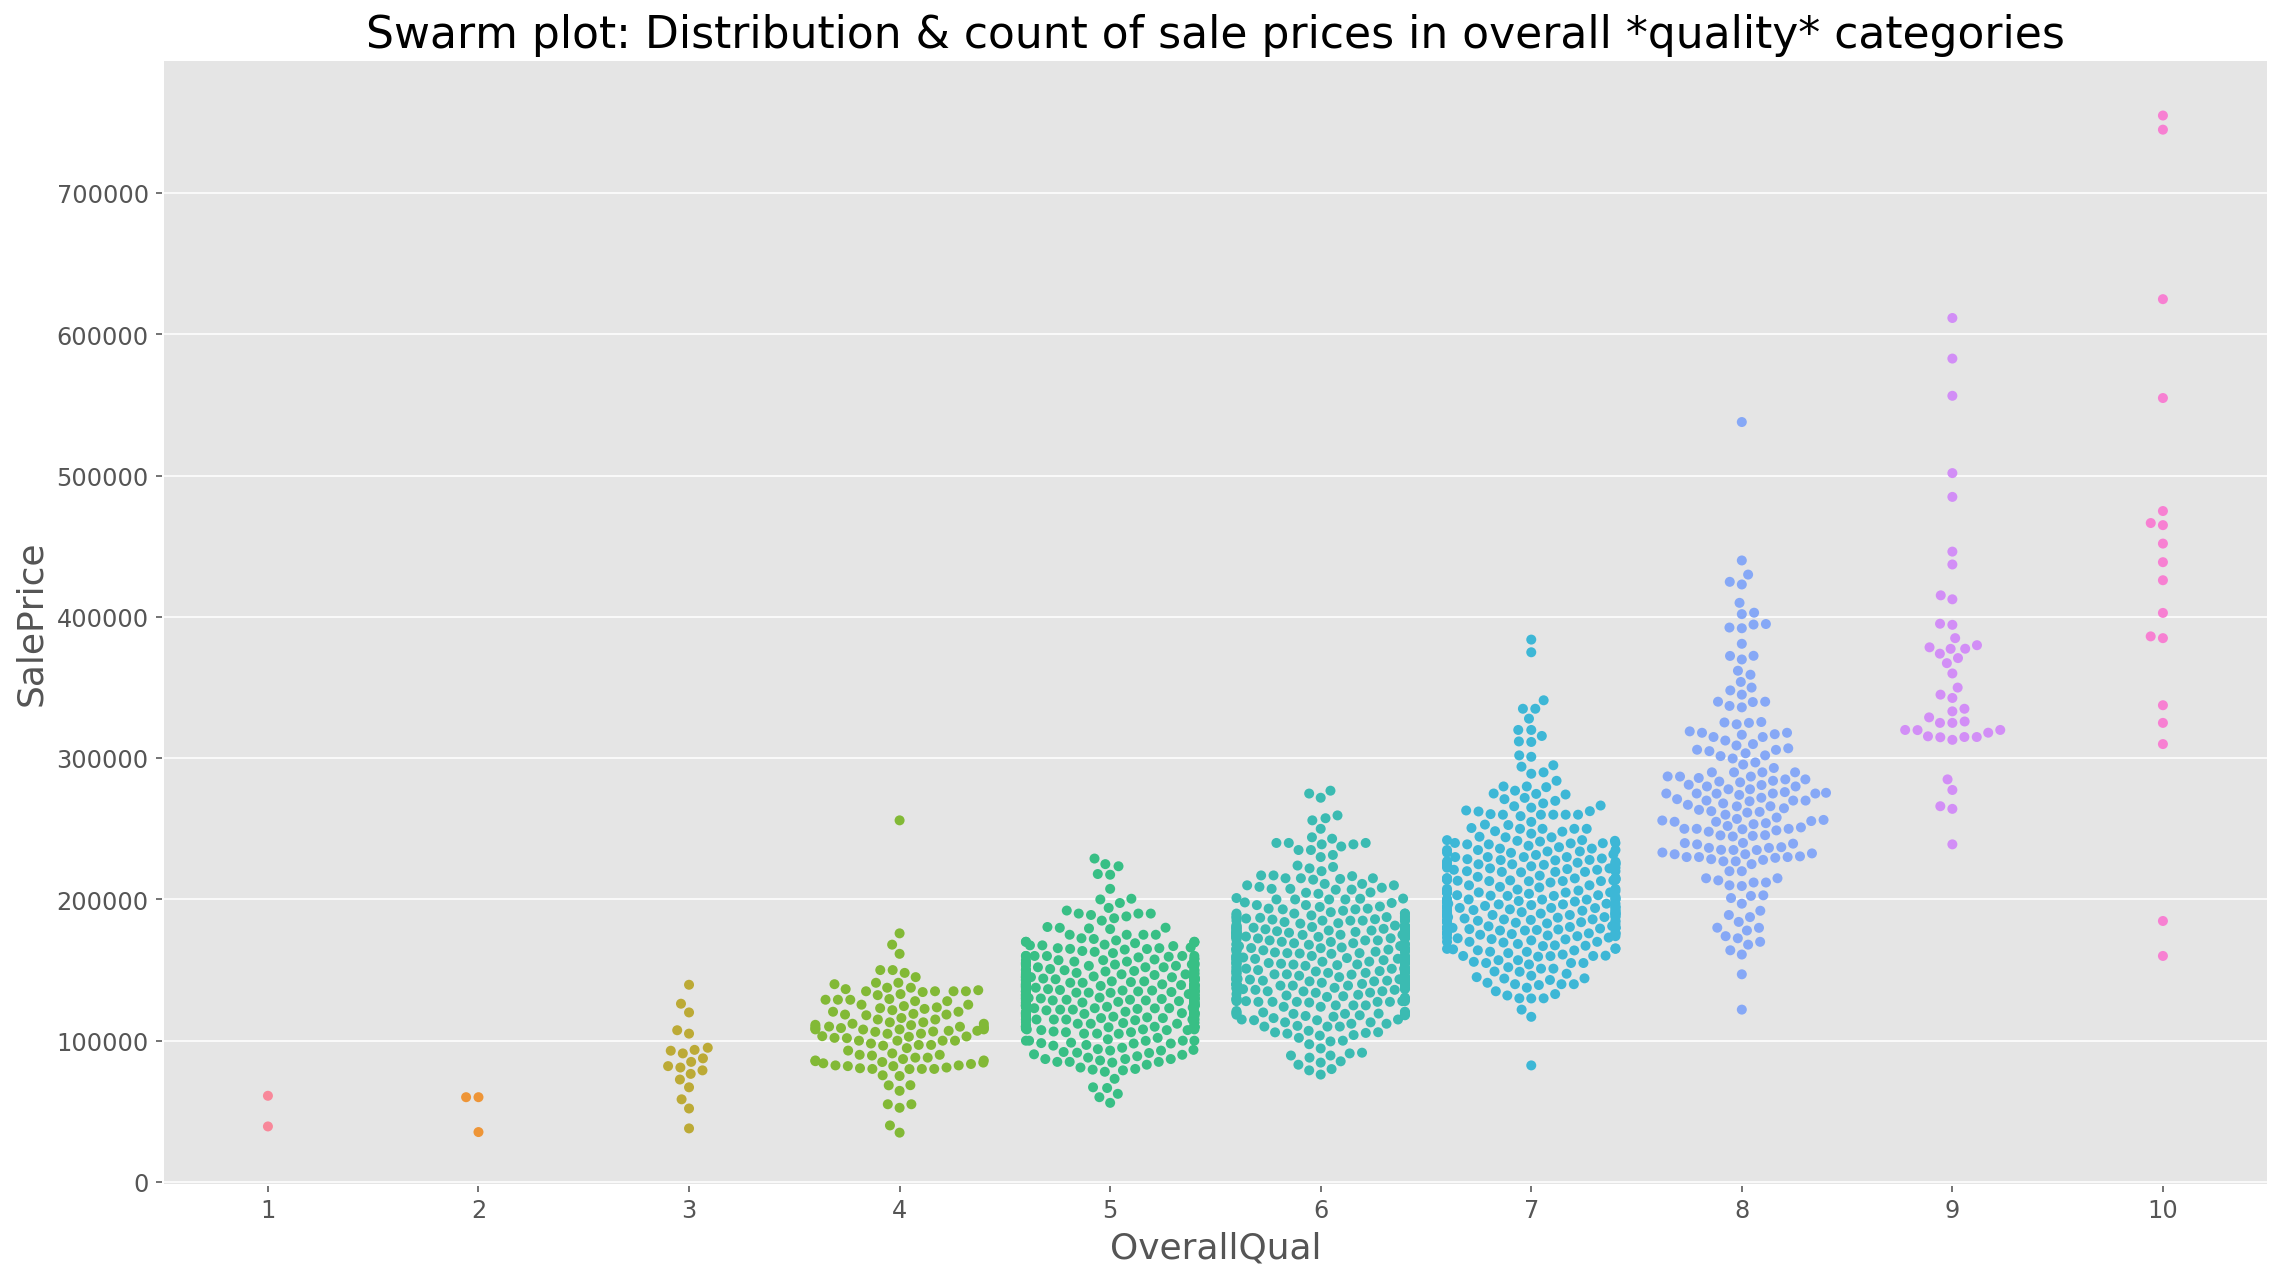

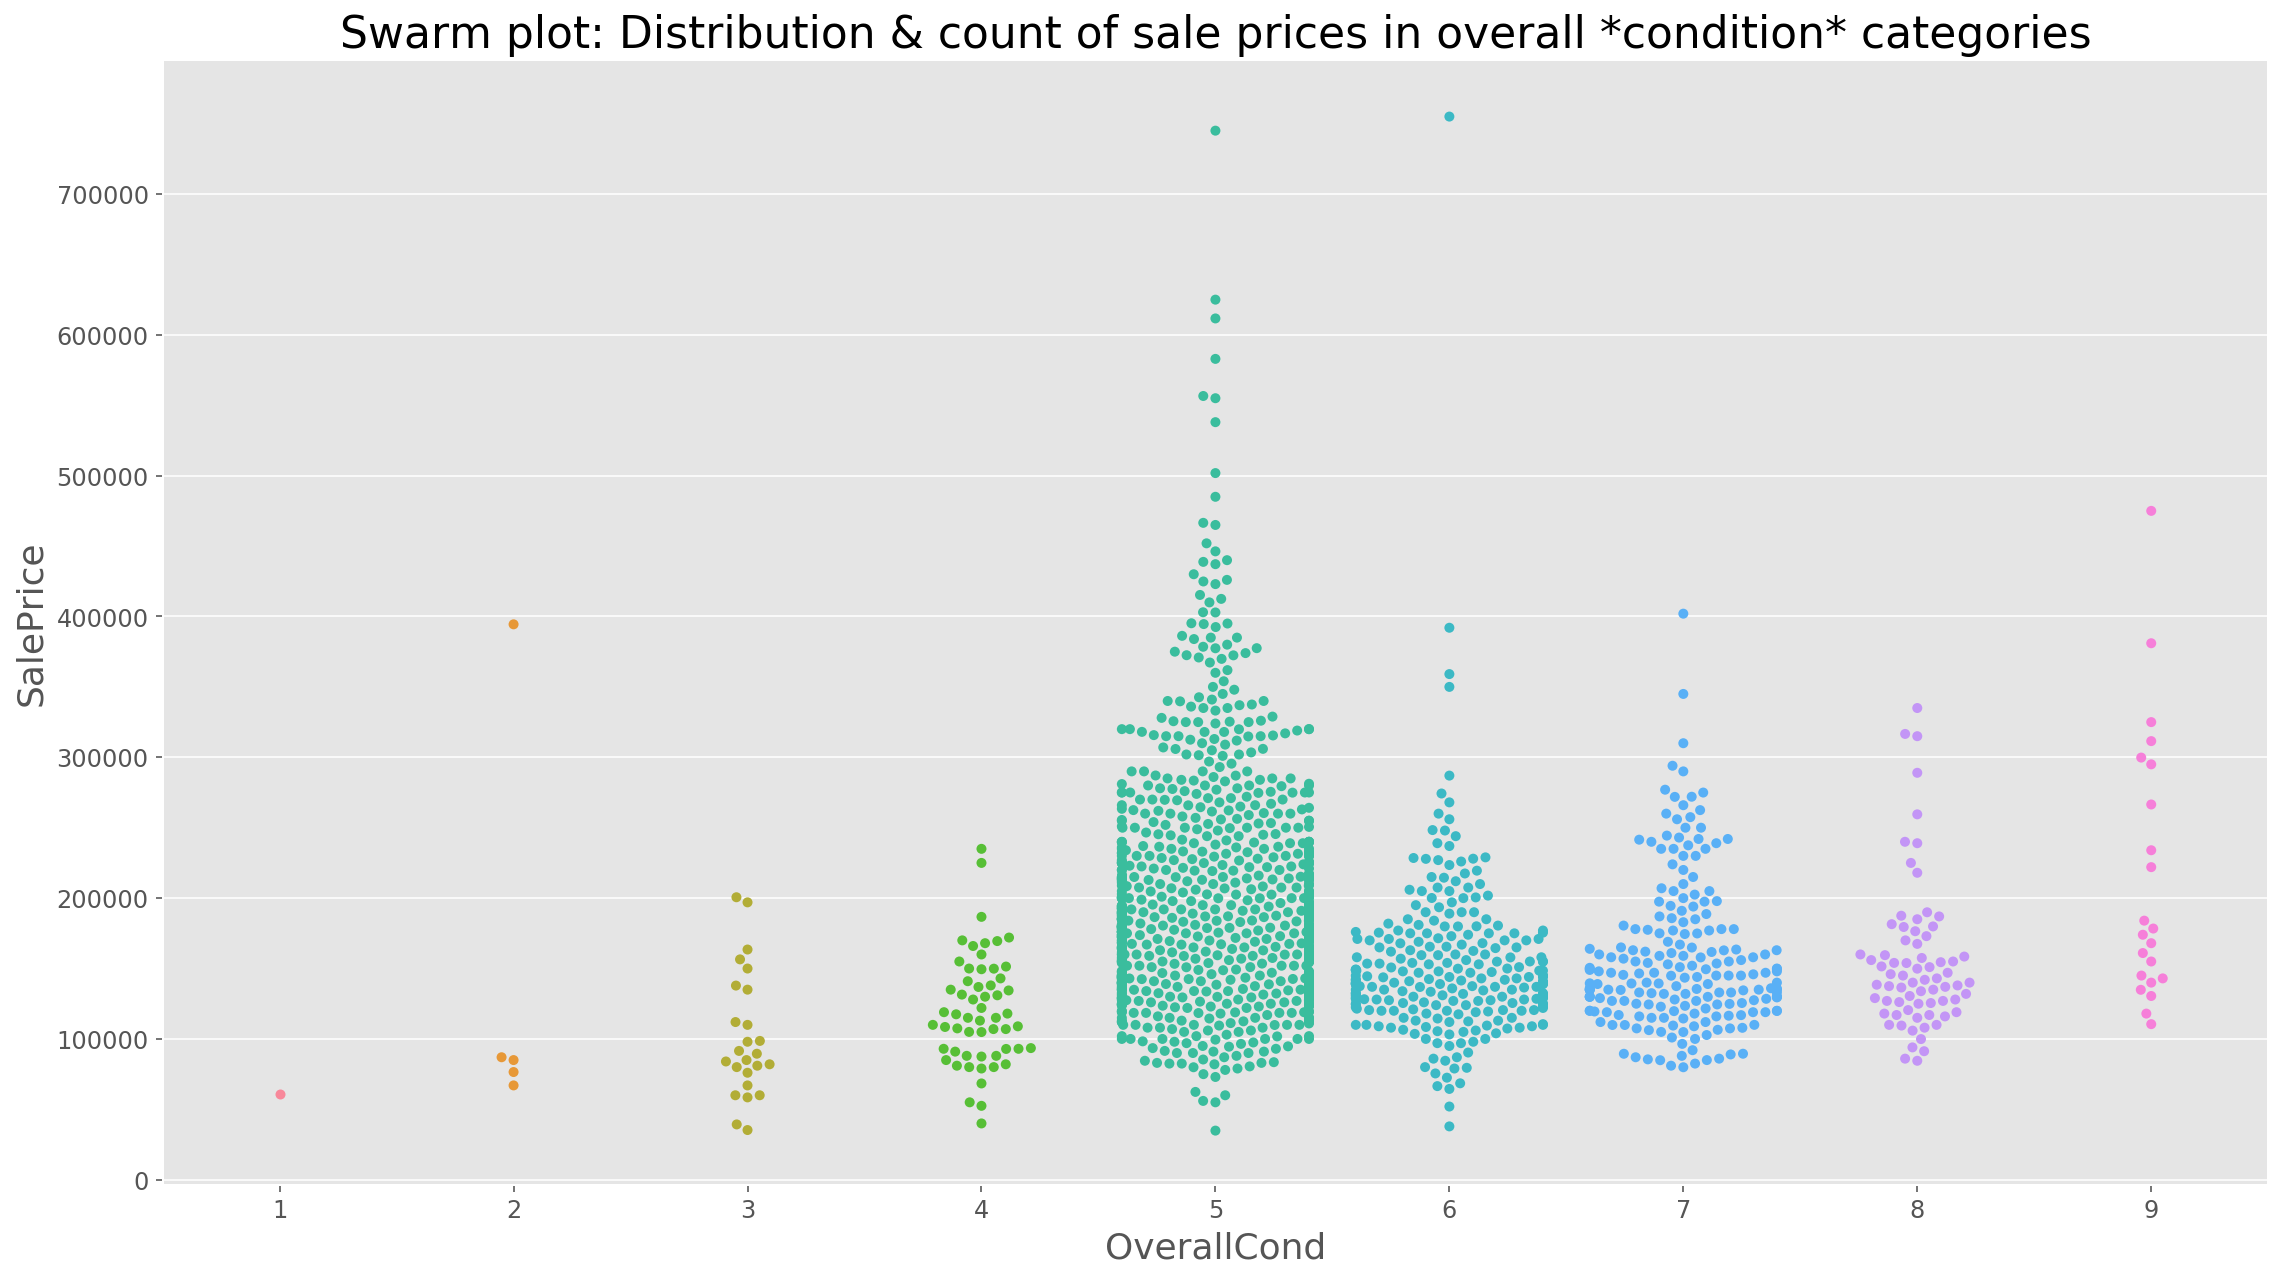

In [17]:
plt.figure(figsize=(16,9));
sns.swarmplot(x="OverallQual", y="SalePrice", data=df)
plt.title("Swarm plot: Distribution & count of sale prices in overall *quality* categories")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,9));
sns.swarmplot(x="OverallCond", y="SalePrice", data=df)
plt.title("Swarm plot: Distribution & count of sale prices in overall *condition* categories")
plt.tight_layout()
plt.show()

We are now **examining the relation of our target variable to other interesting correlated features** and start with several numerical **features of size.**

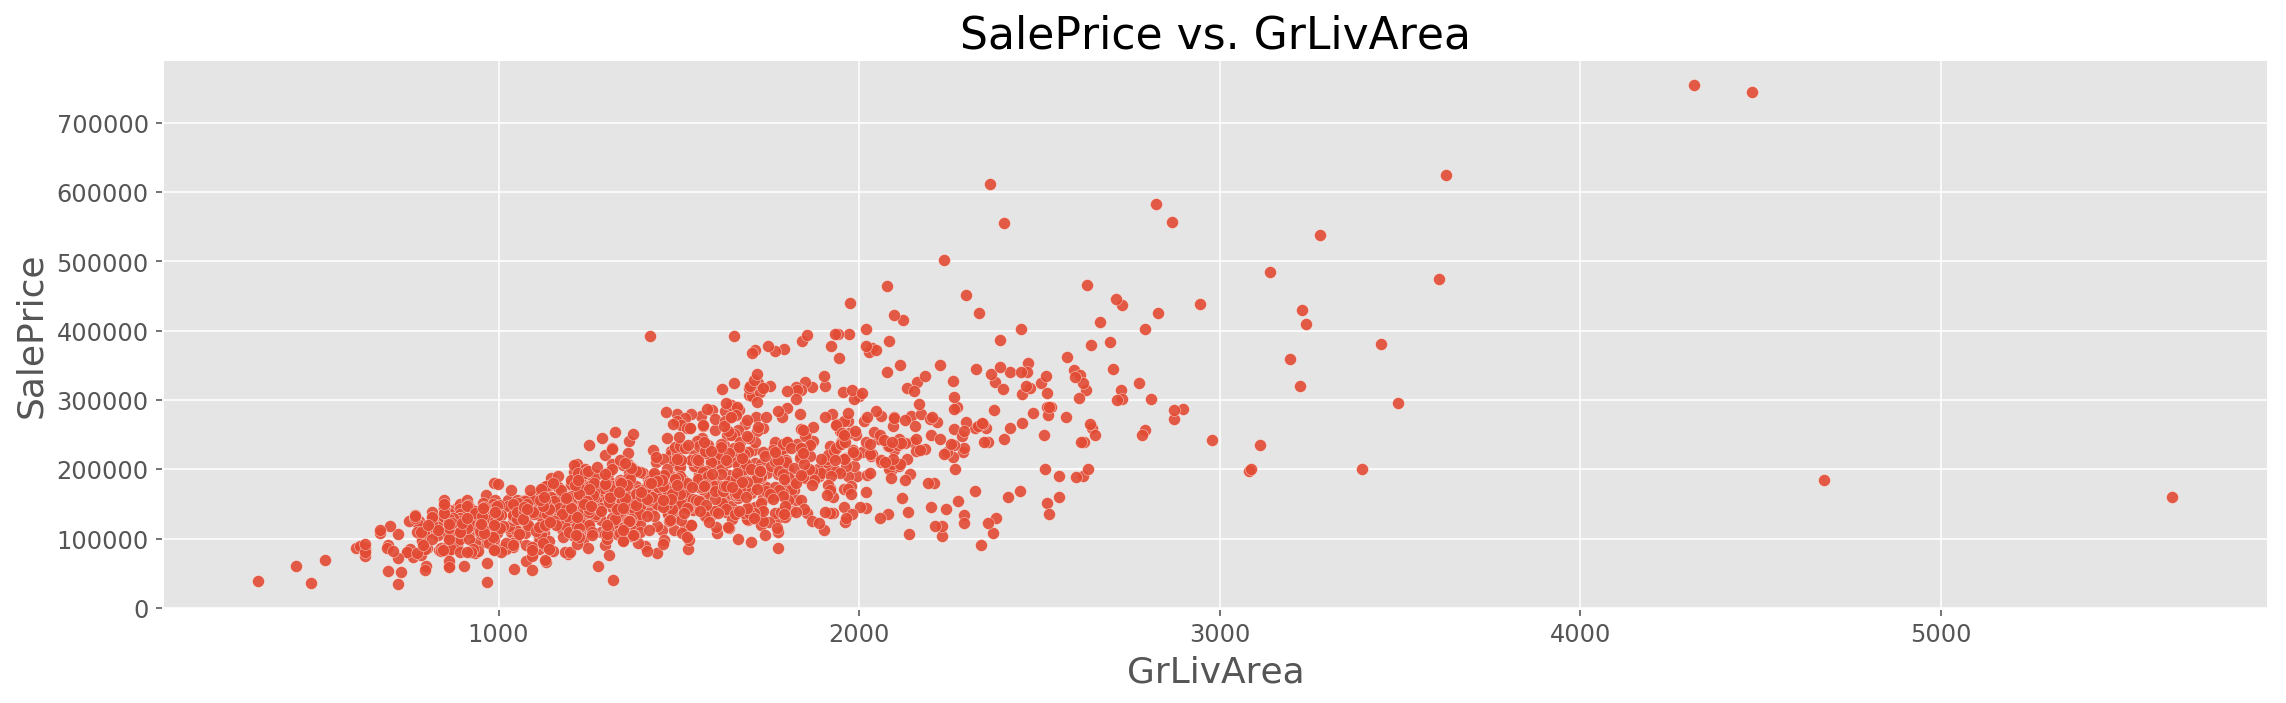

In [18]:
plt.figure(figsize=(16,5));
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df, linewidth=0.2, alpha=0.9)
plt.title(f"SalePrice vs. GrLivArea")
plt.tight_layout()
plt.show()

The correlation is clearly noticable. 

We also can observe some of **the hefty outliers that Dean De Cock has warned us** about. There are two data points of very high living area and low sale price and two with a rather high sale price.

We try to improve the visualisation by adding the overall condition as hue to the plot. 

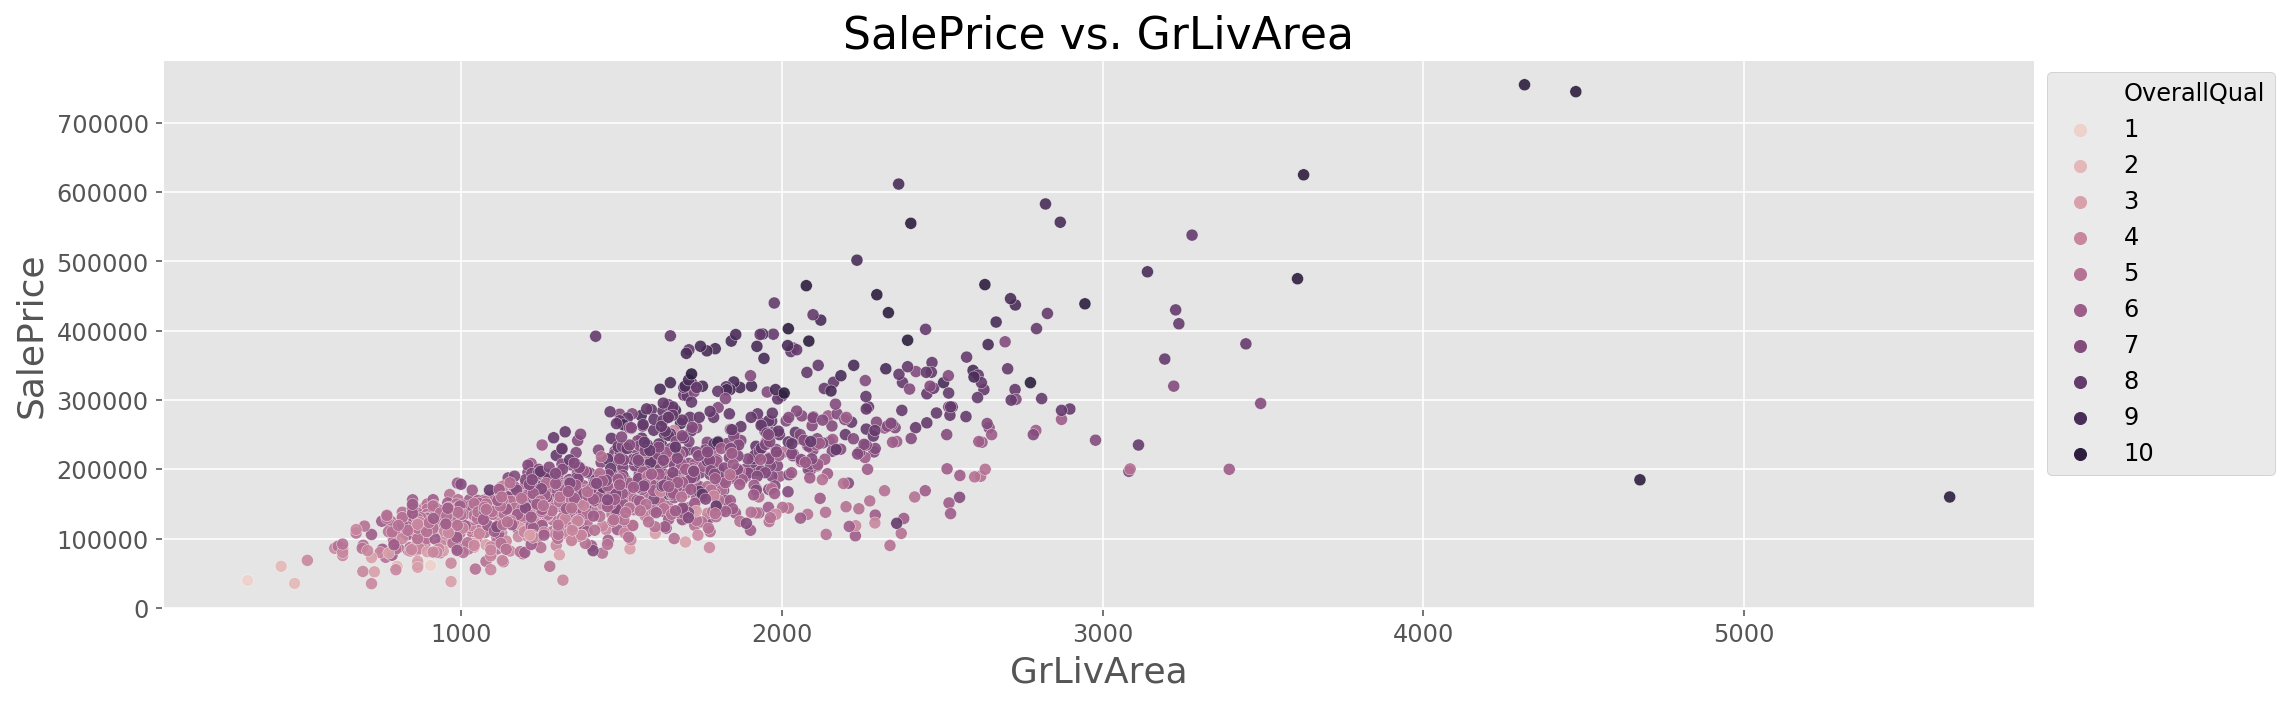

In [19]:
plt.figure(figsize=(16,5));
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="OverallQual", data=df, 
                legend="full", linewidth=0.2, alpha=0.9)
plt.title(f"SalePrice vs. GrLivArea")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.tight_layout()
plt.show()

Makes sense: low overall quality data points plot with light hue in lower ranges of living area and sale price. 

What if we **bin the continuous feature `GrLivArea` to a categorical** and plot again counts and distribution?

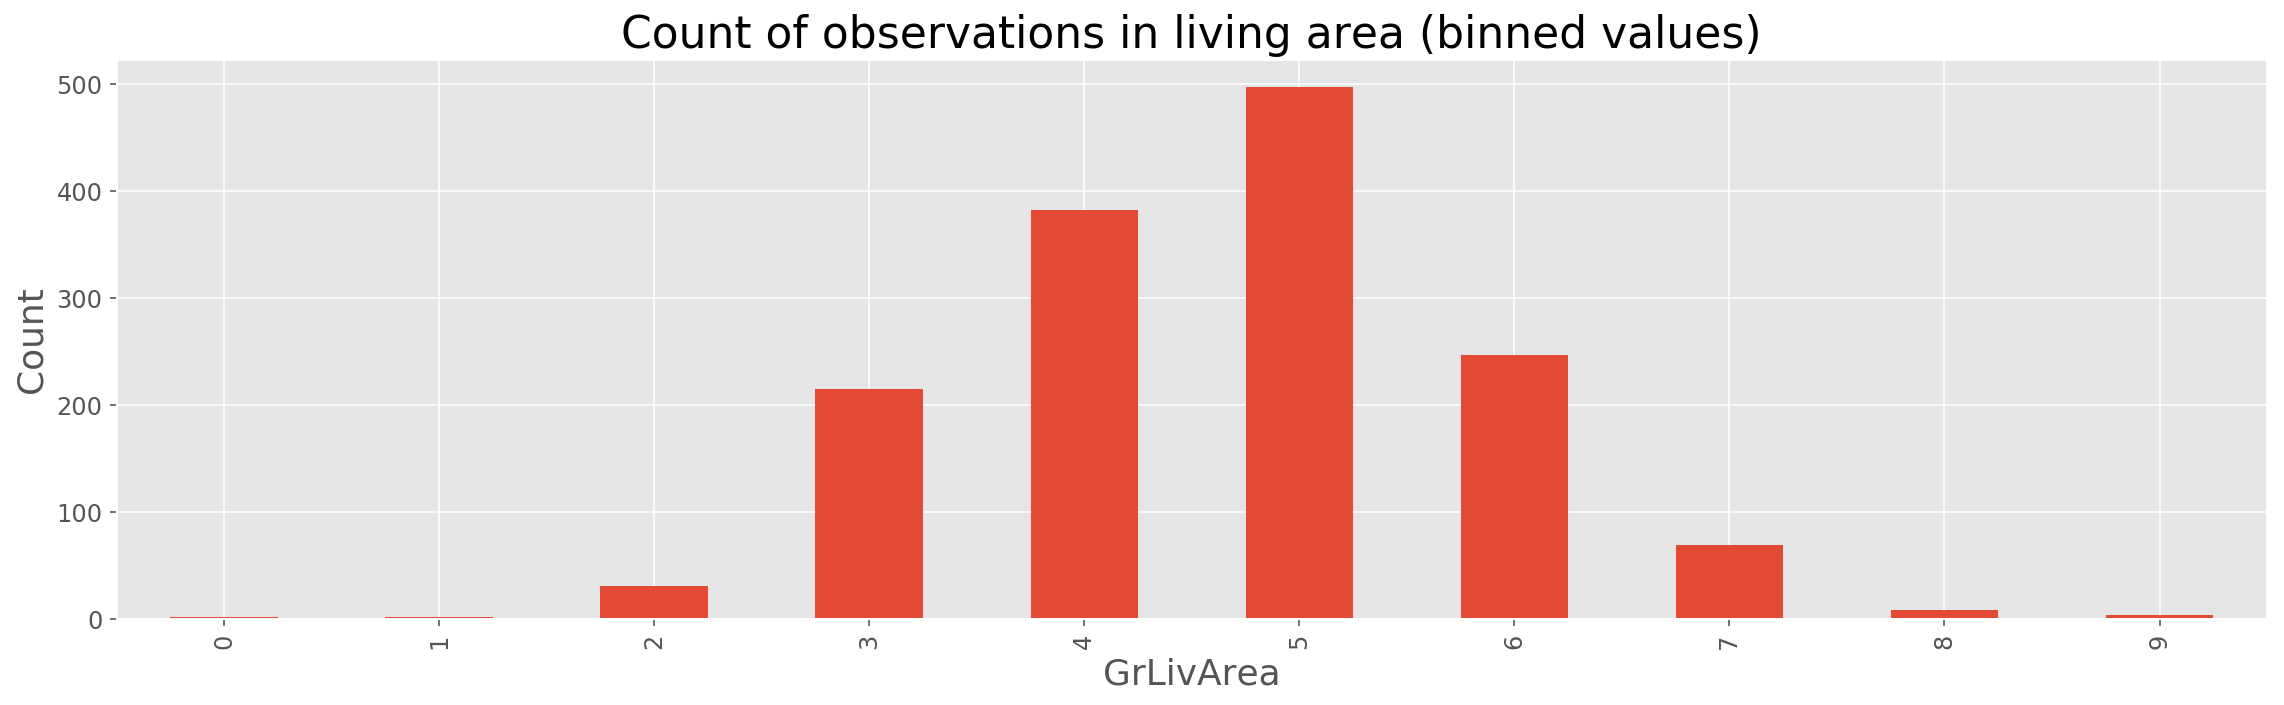

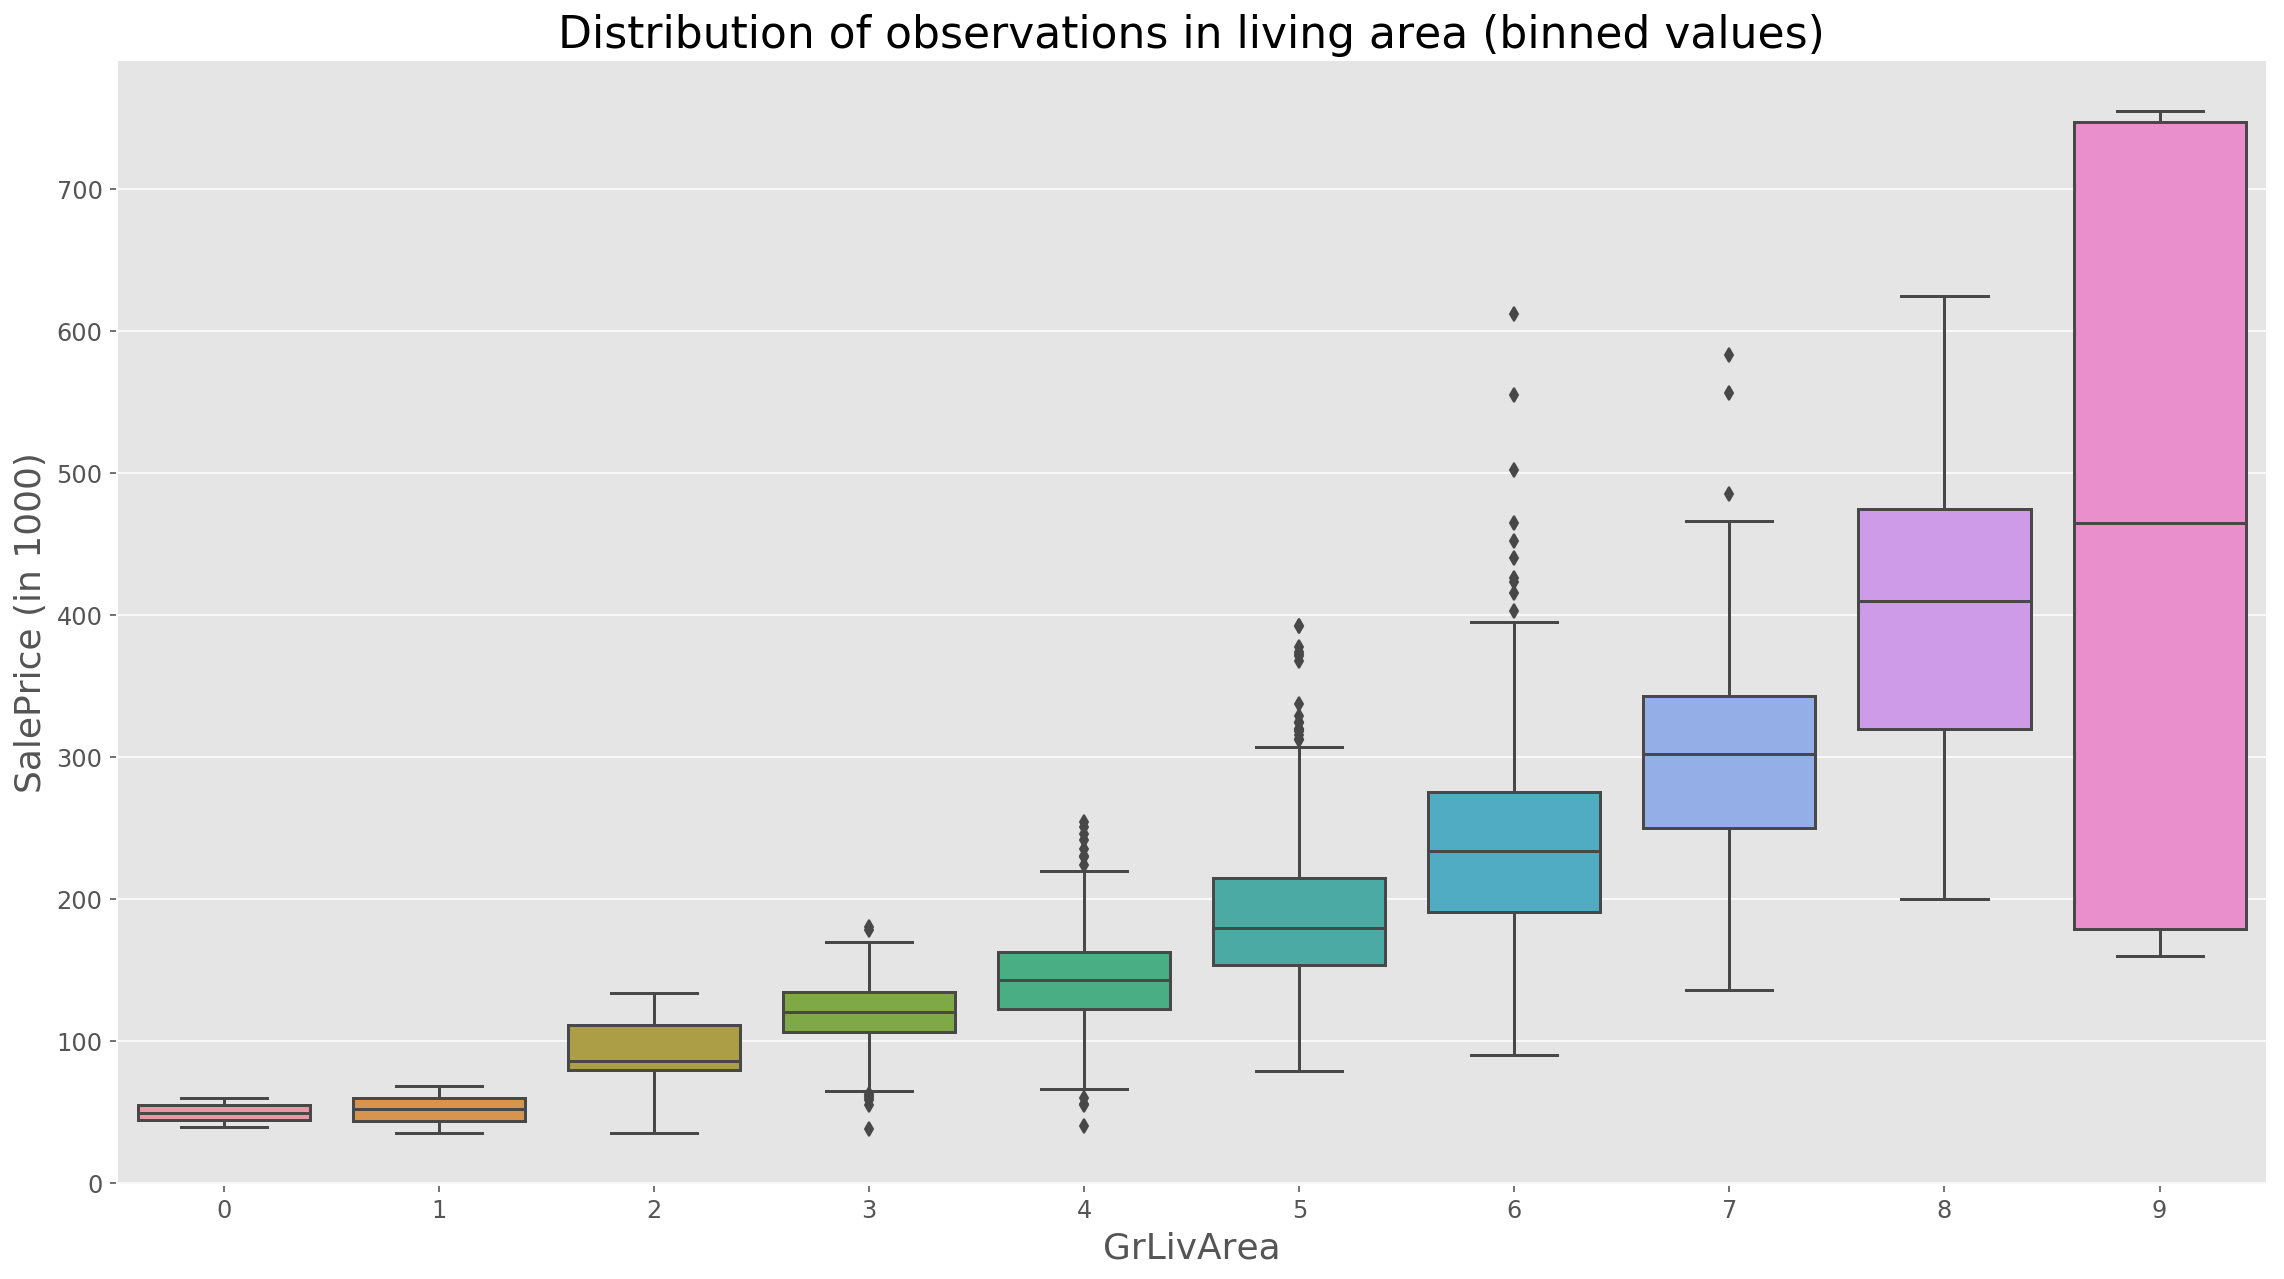

In [20]:
df_cut = pd.DataFrame(pd.cut(np.log(df.GrLivArea), bins=10, labels=np.arange(0,10)))
df_comb = pd.concat([df_cut, df.SalePrice], axis=1)

plt.figure(figsize=(16,5));
df_comb.groupby("GrLivArea").SalePrice.count().plot(kind="bar")
plt.title("Count of observations in living area (binned values)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,9));
ax = sns.boxplot(x="GrLivArea", y="SalePrice", data=df_comb)
plt.title("Distribution of observations in living area (binned values)")
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_1000))
plt.ylabel("SalePrice (in 1000)")
plt.tight_layout()
plt.show()

Main finding: **The more living area the more variance we have in the distribution of sale prices.** In the top range of living area we find unusual high variance – very likely due to the outliers.

Now checking 4 more features of size.

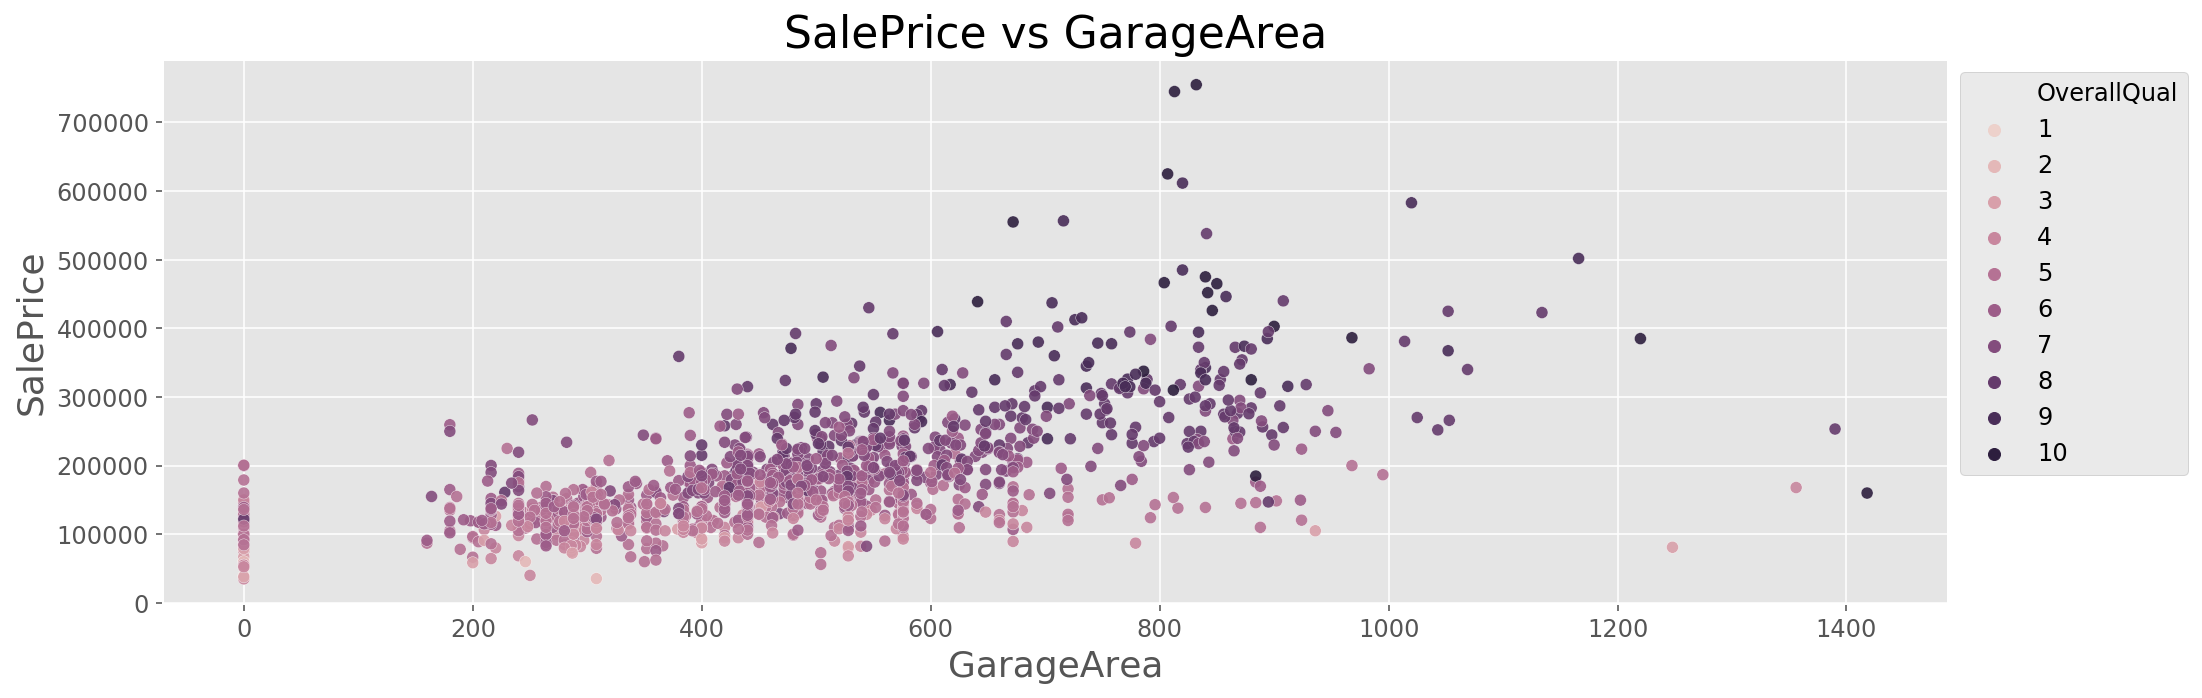

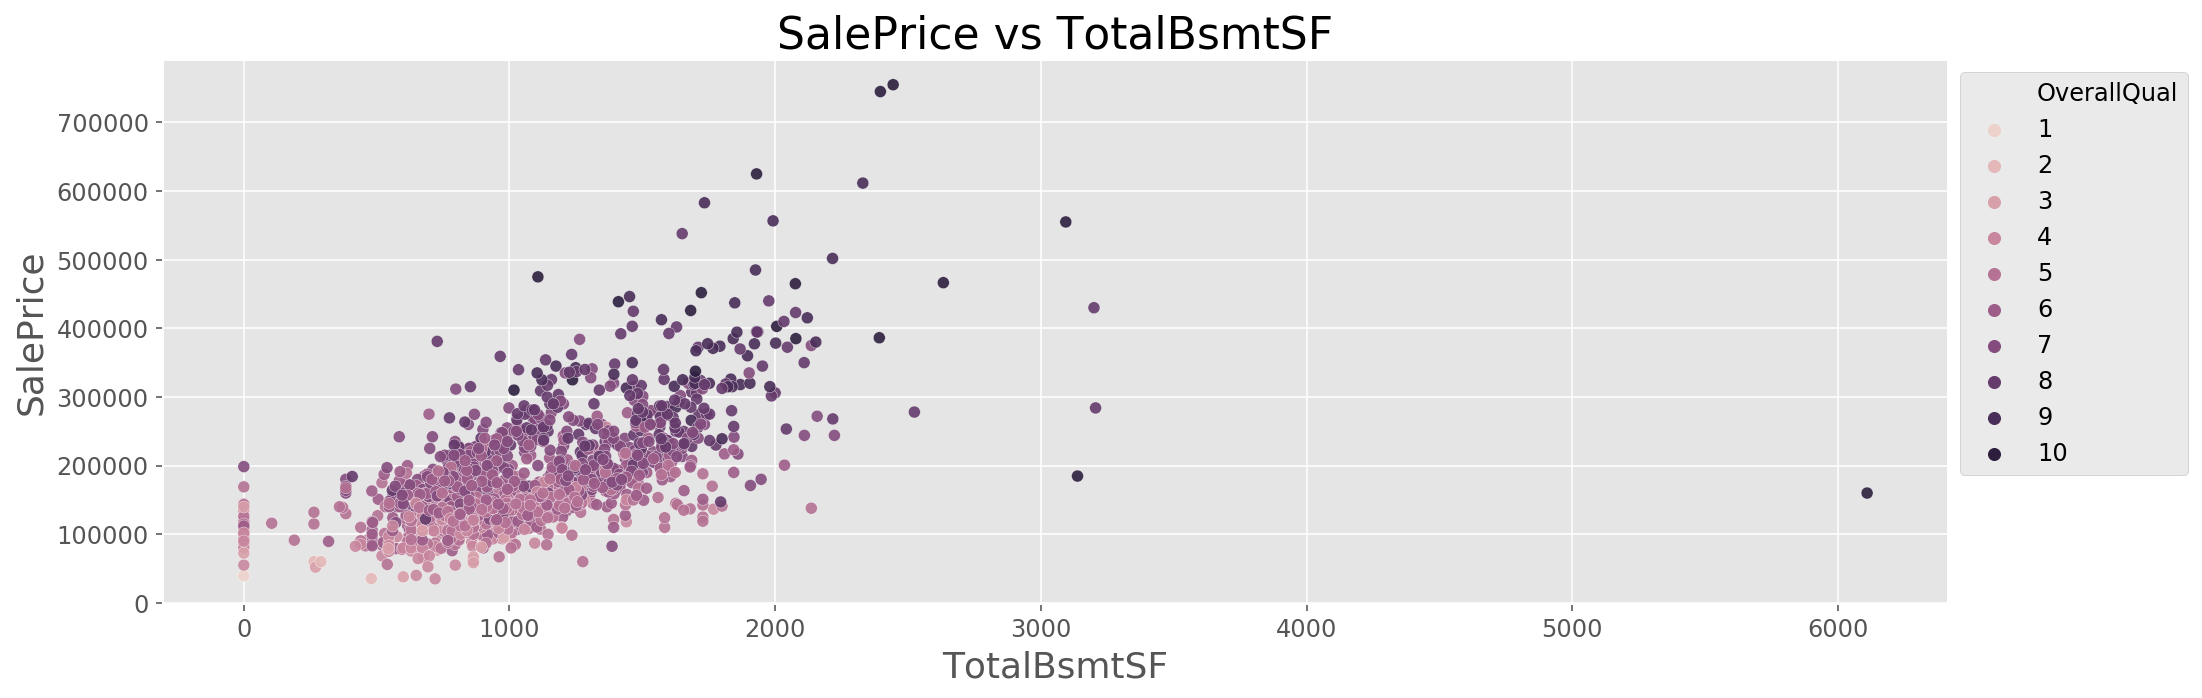

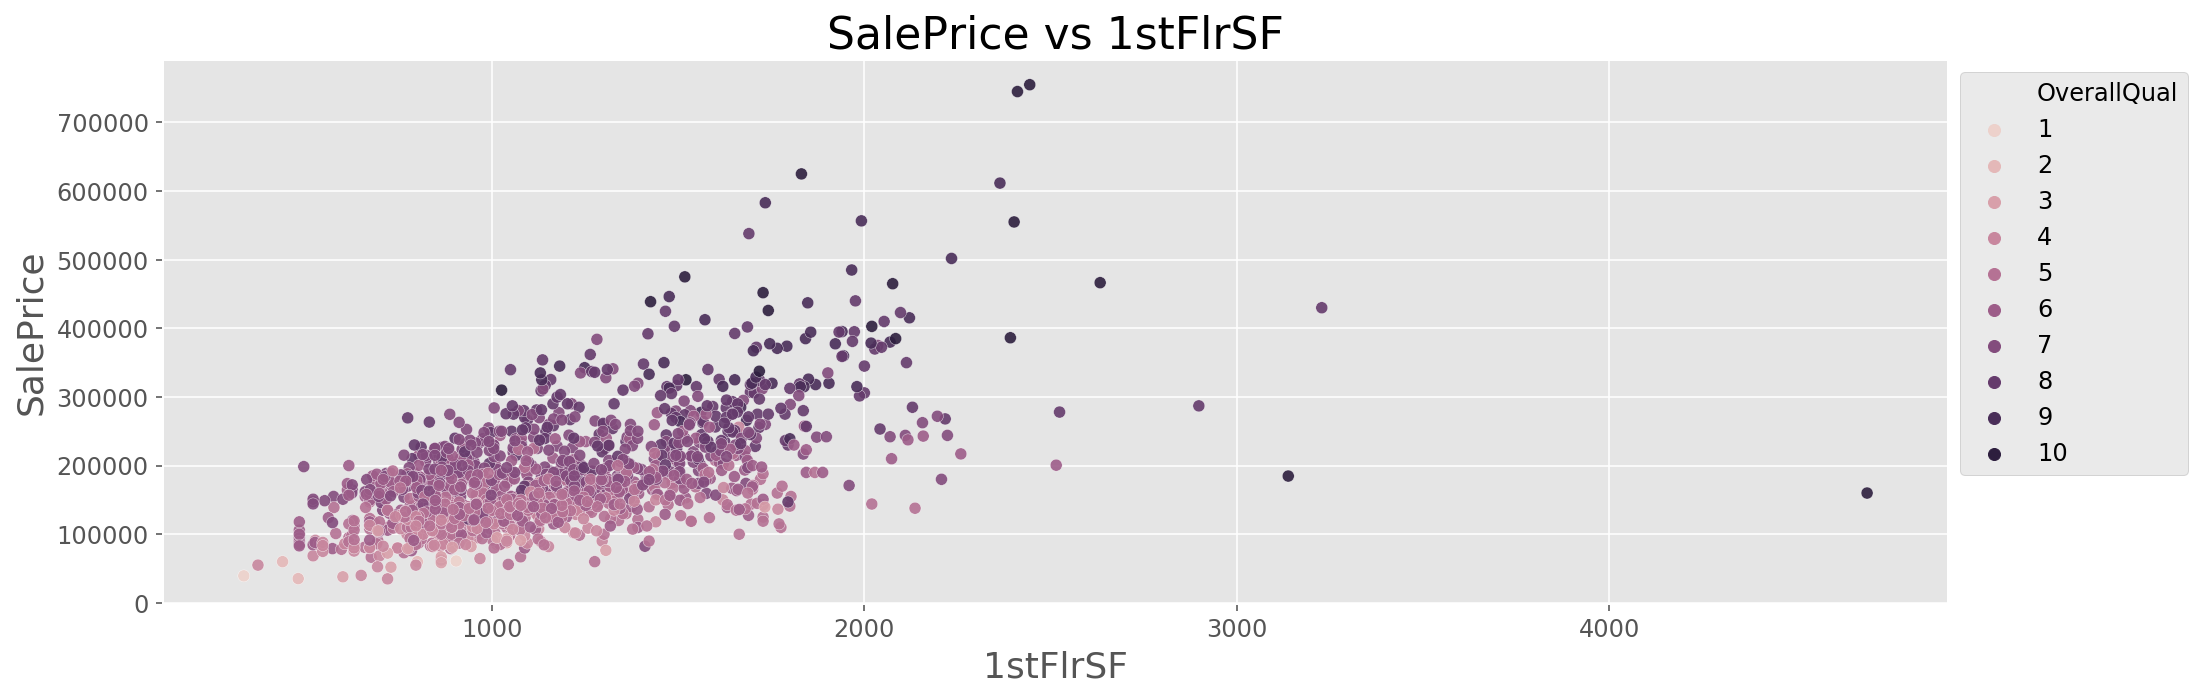

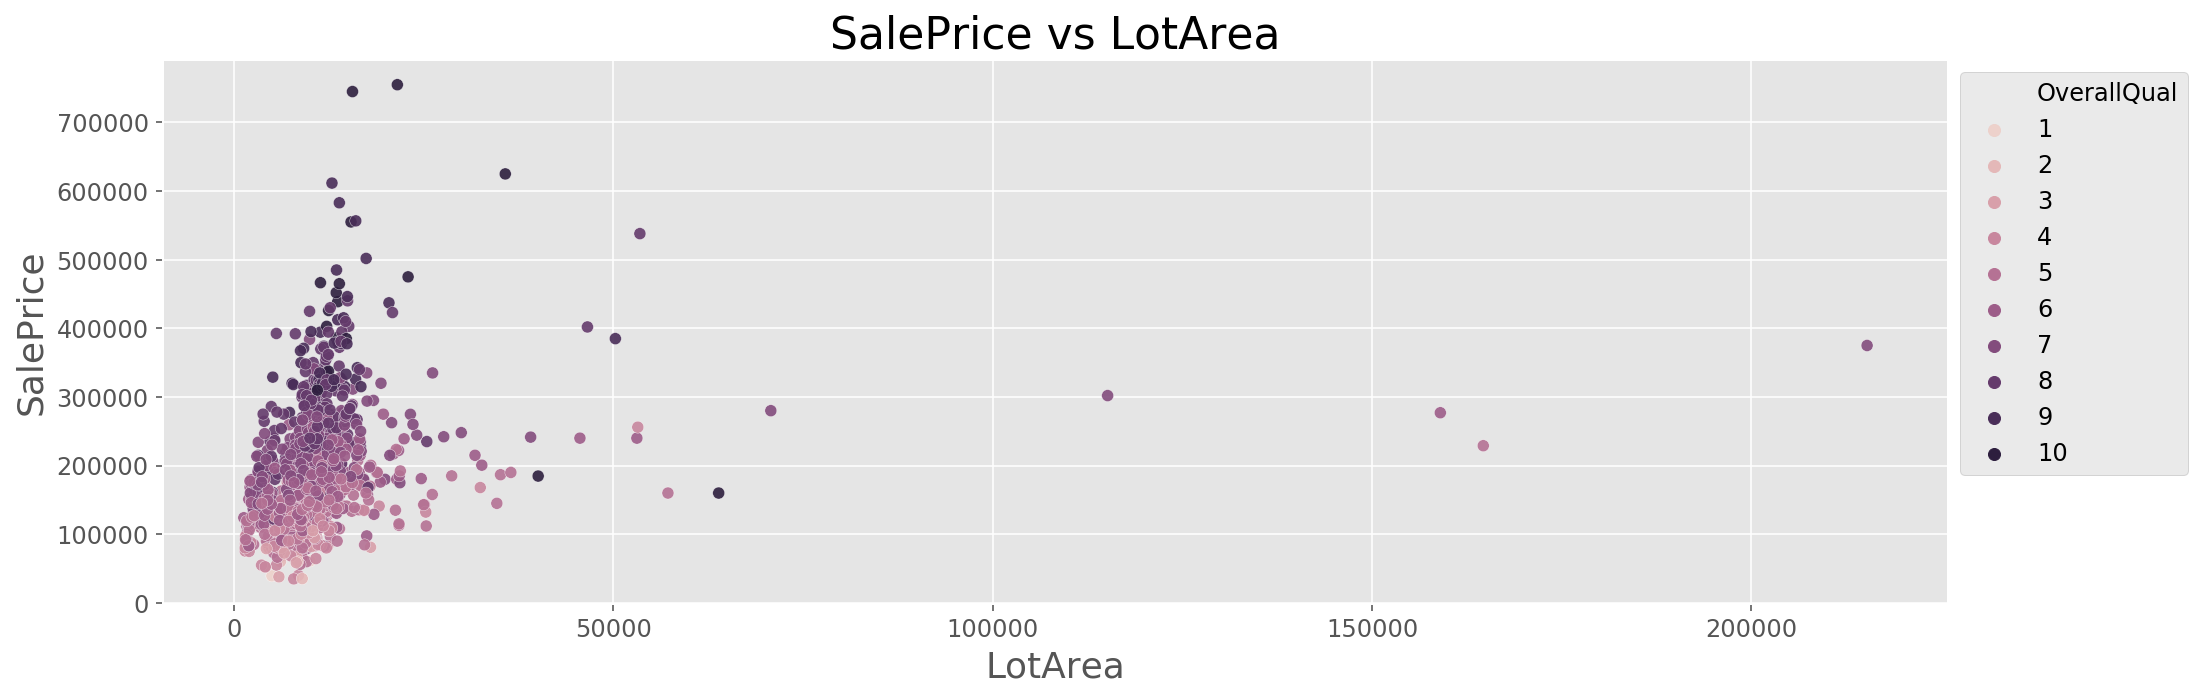

In [21]:
features = ["GarageArea", "TotalBsmtSF", "1stFlrSF", "LotArea"]

for feature in features:
    plt.figure(figsize=(16,5));
    sns.scatterplot(x=feature, y="SalePrice", hue="OverallQual", data=df, 
                legend="full", linewidth=0.2, alpha=0.9)
    plt.legend(bbox_to_anchor=(1, 1), loc=2)
    plt.title(f"SalePrice vs {feature}")
    plt.show()

We clearly observe the positive correlation of the features and again various outliers.

Let's look at the **time related features like building year, year and month of sale.**

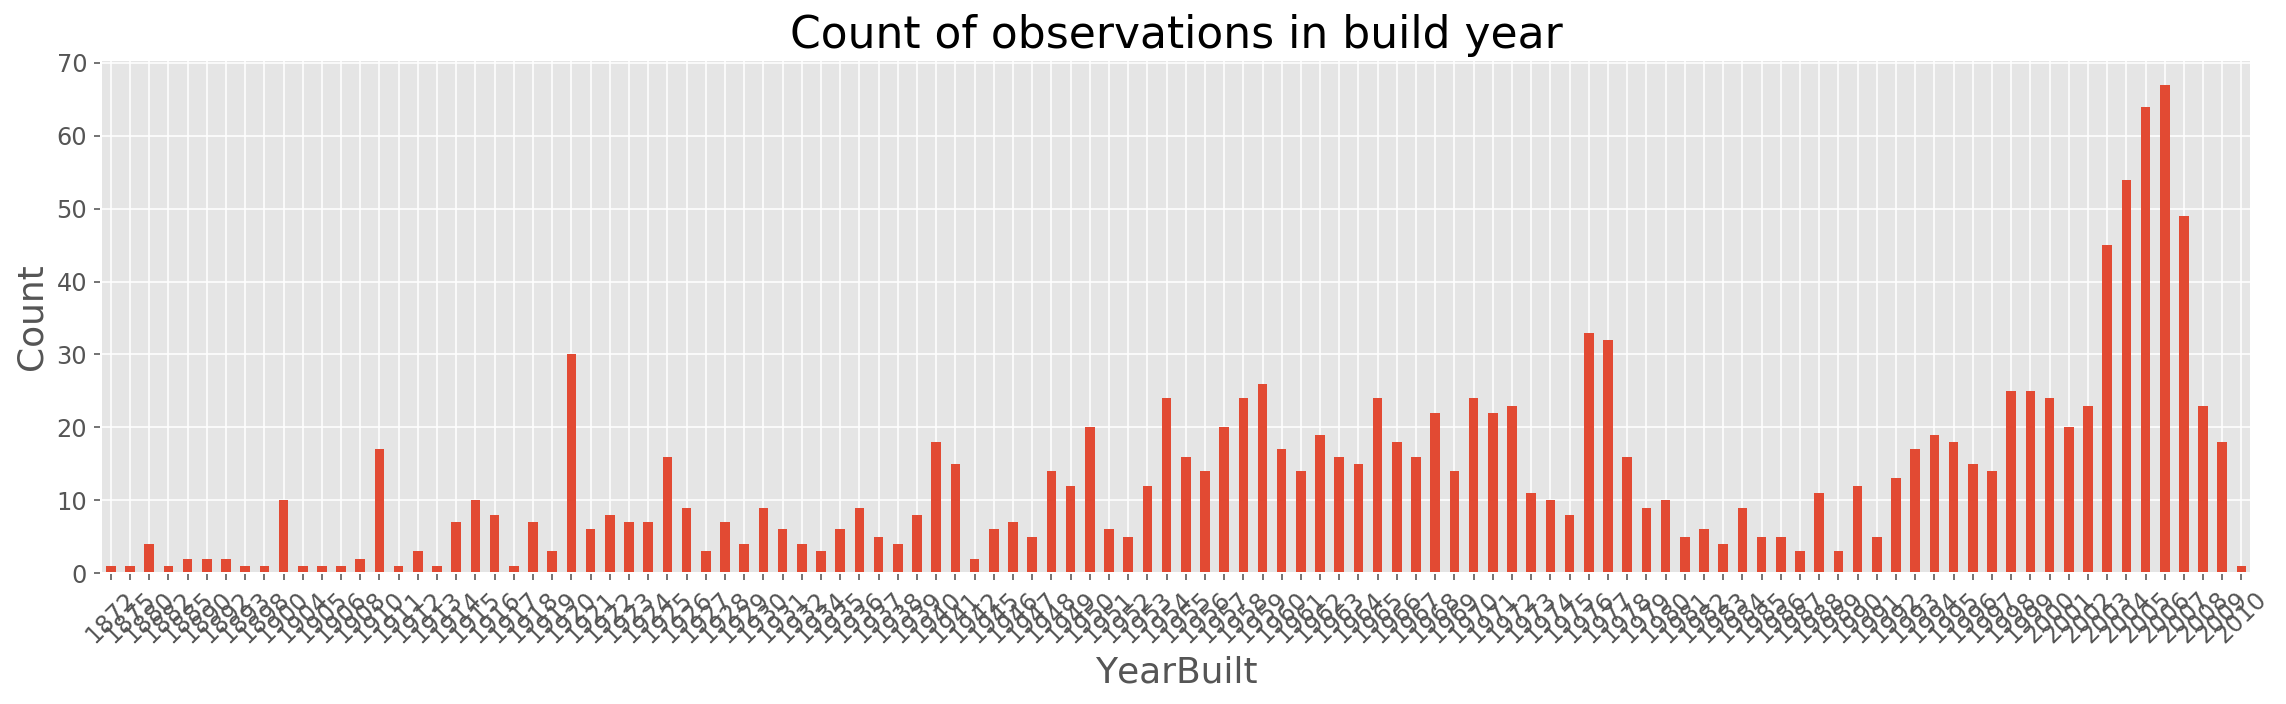

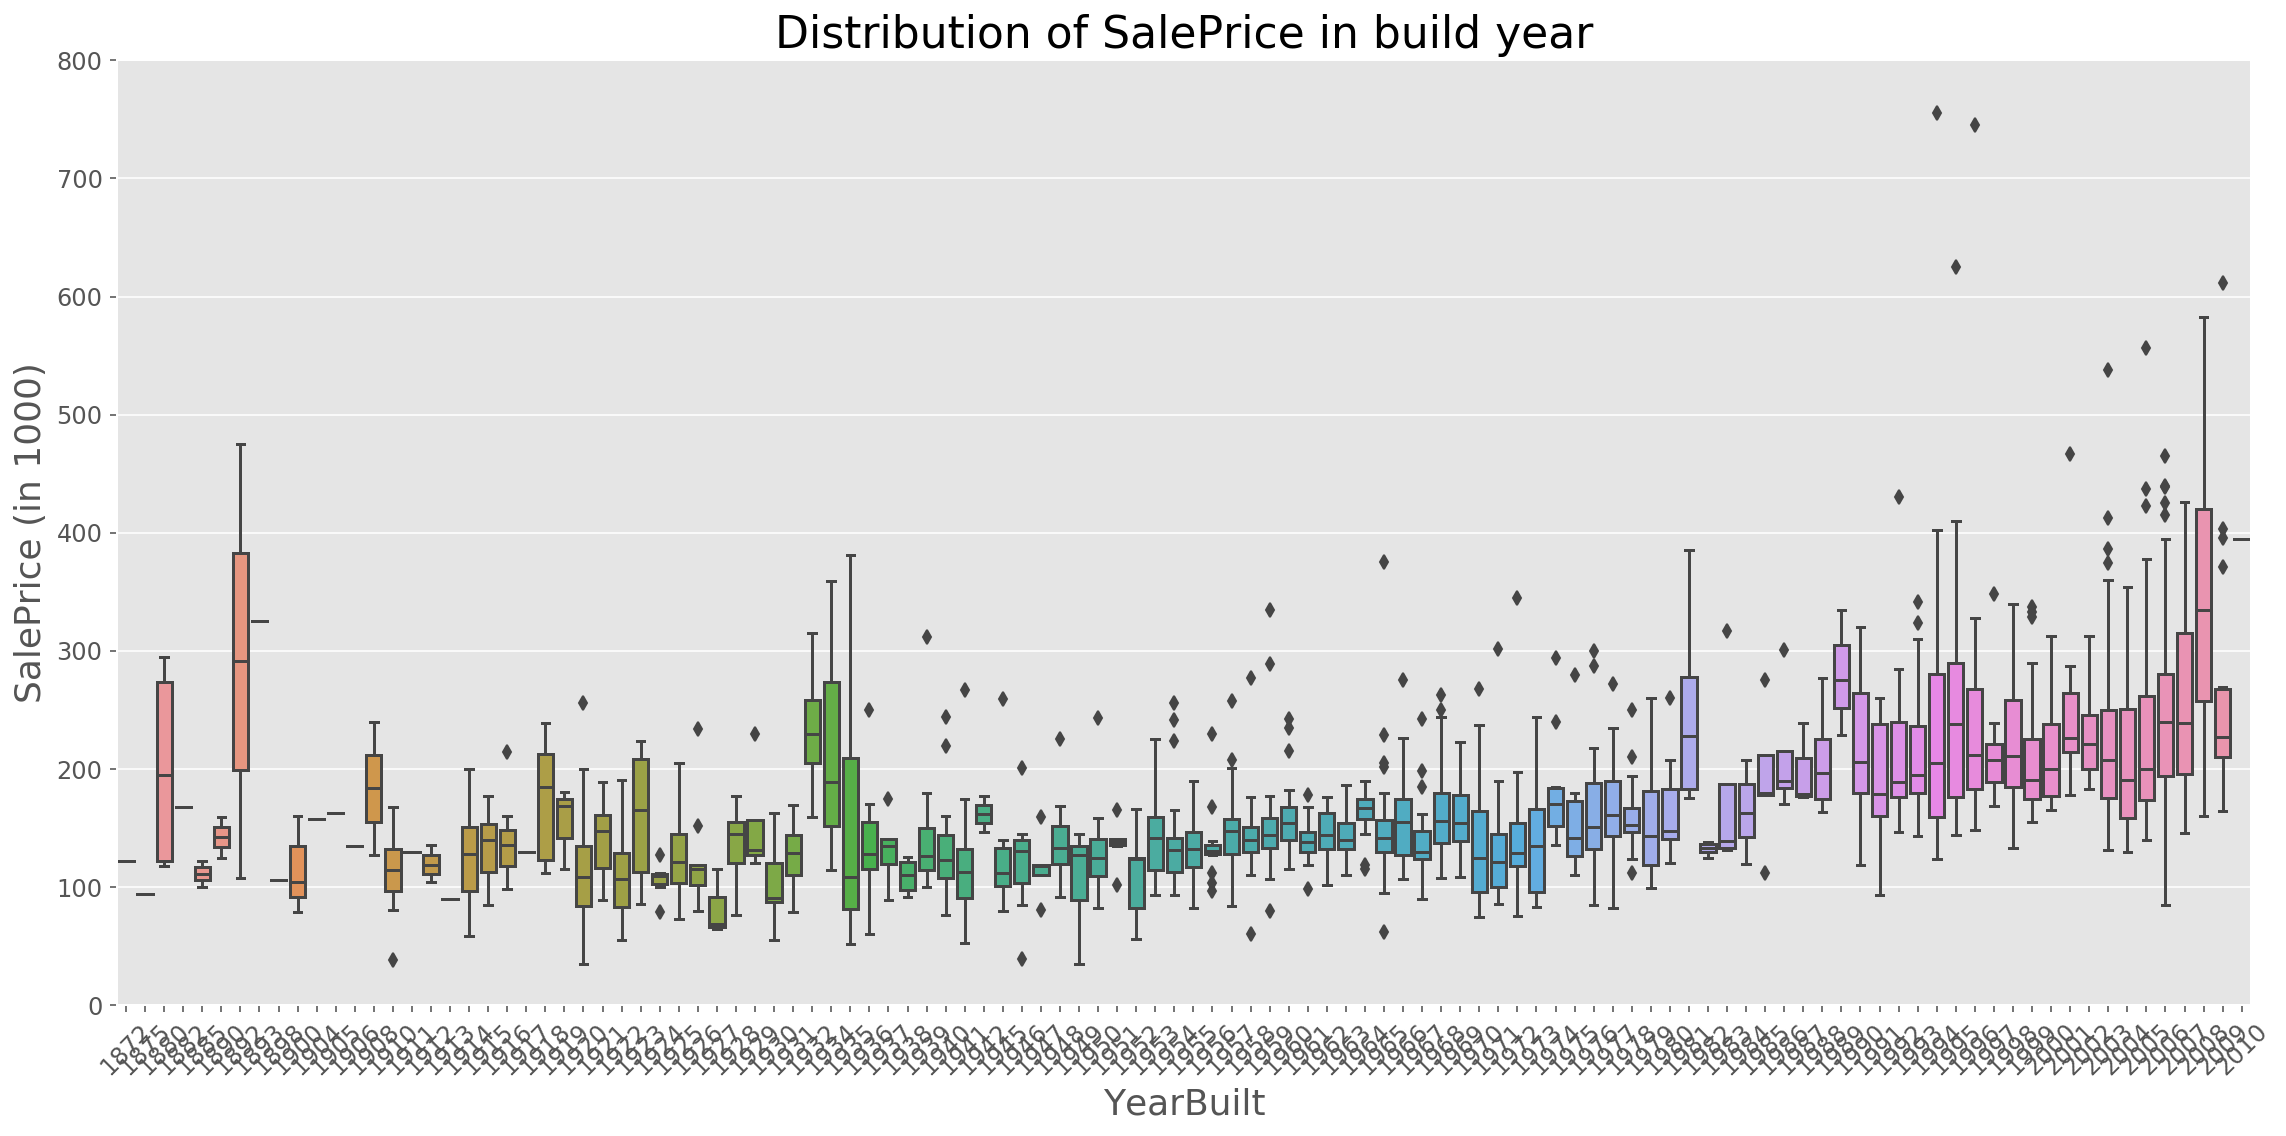

In [22]:
plt.figure(figsize=(16,5));
df.groupby("YearBuilt").SalePrice.count().plot(kind="bar")
plt.title("Count of observations in build year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,8));
ax = sns.boxplot(x="YearBuilt", y="SalePrice", data=df)
plt.axis(ymin=0, ymax=800000)
plt.title("Distribution of SalePrice in build year")
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_1000))
plt.ylabel("SalePrice (in 1000)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interesting but **hard to decipher**. Let's **bin the data to decades**.

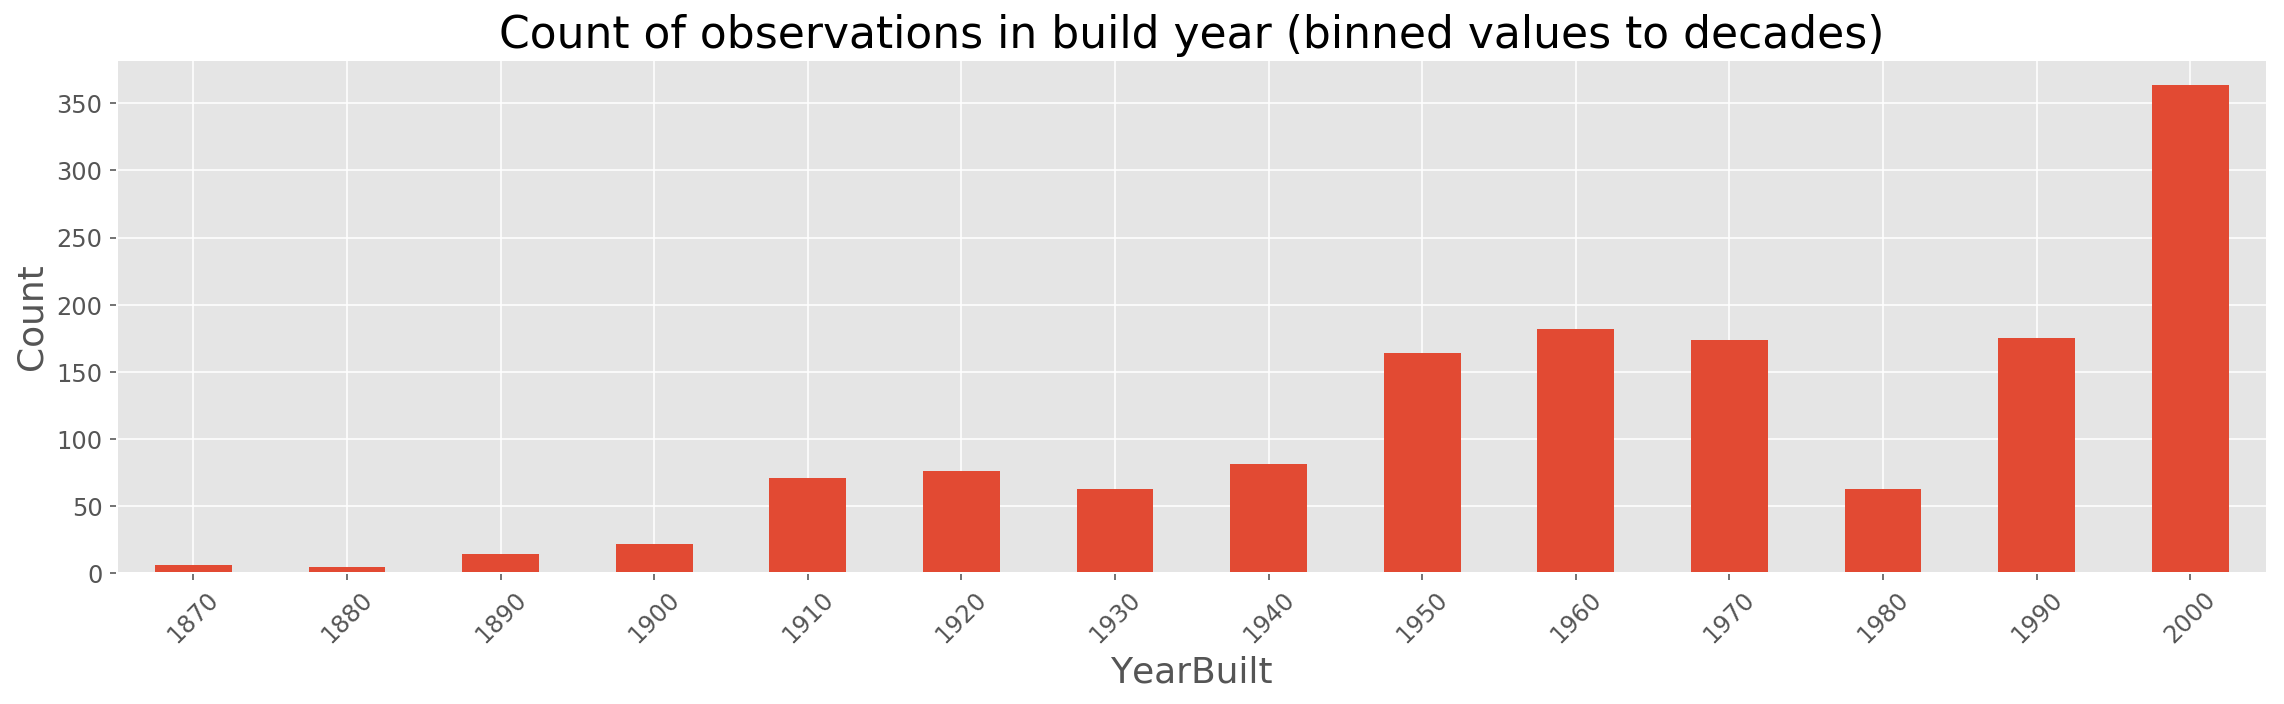

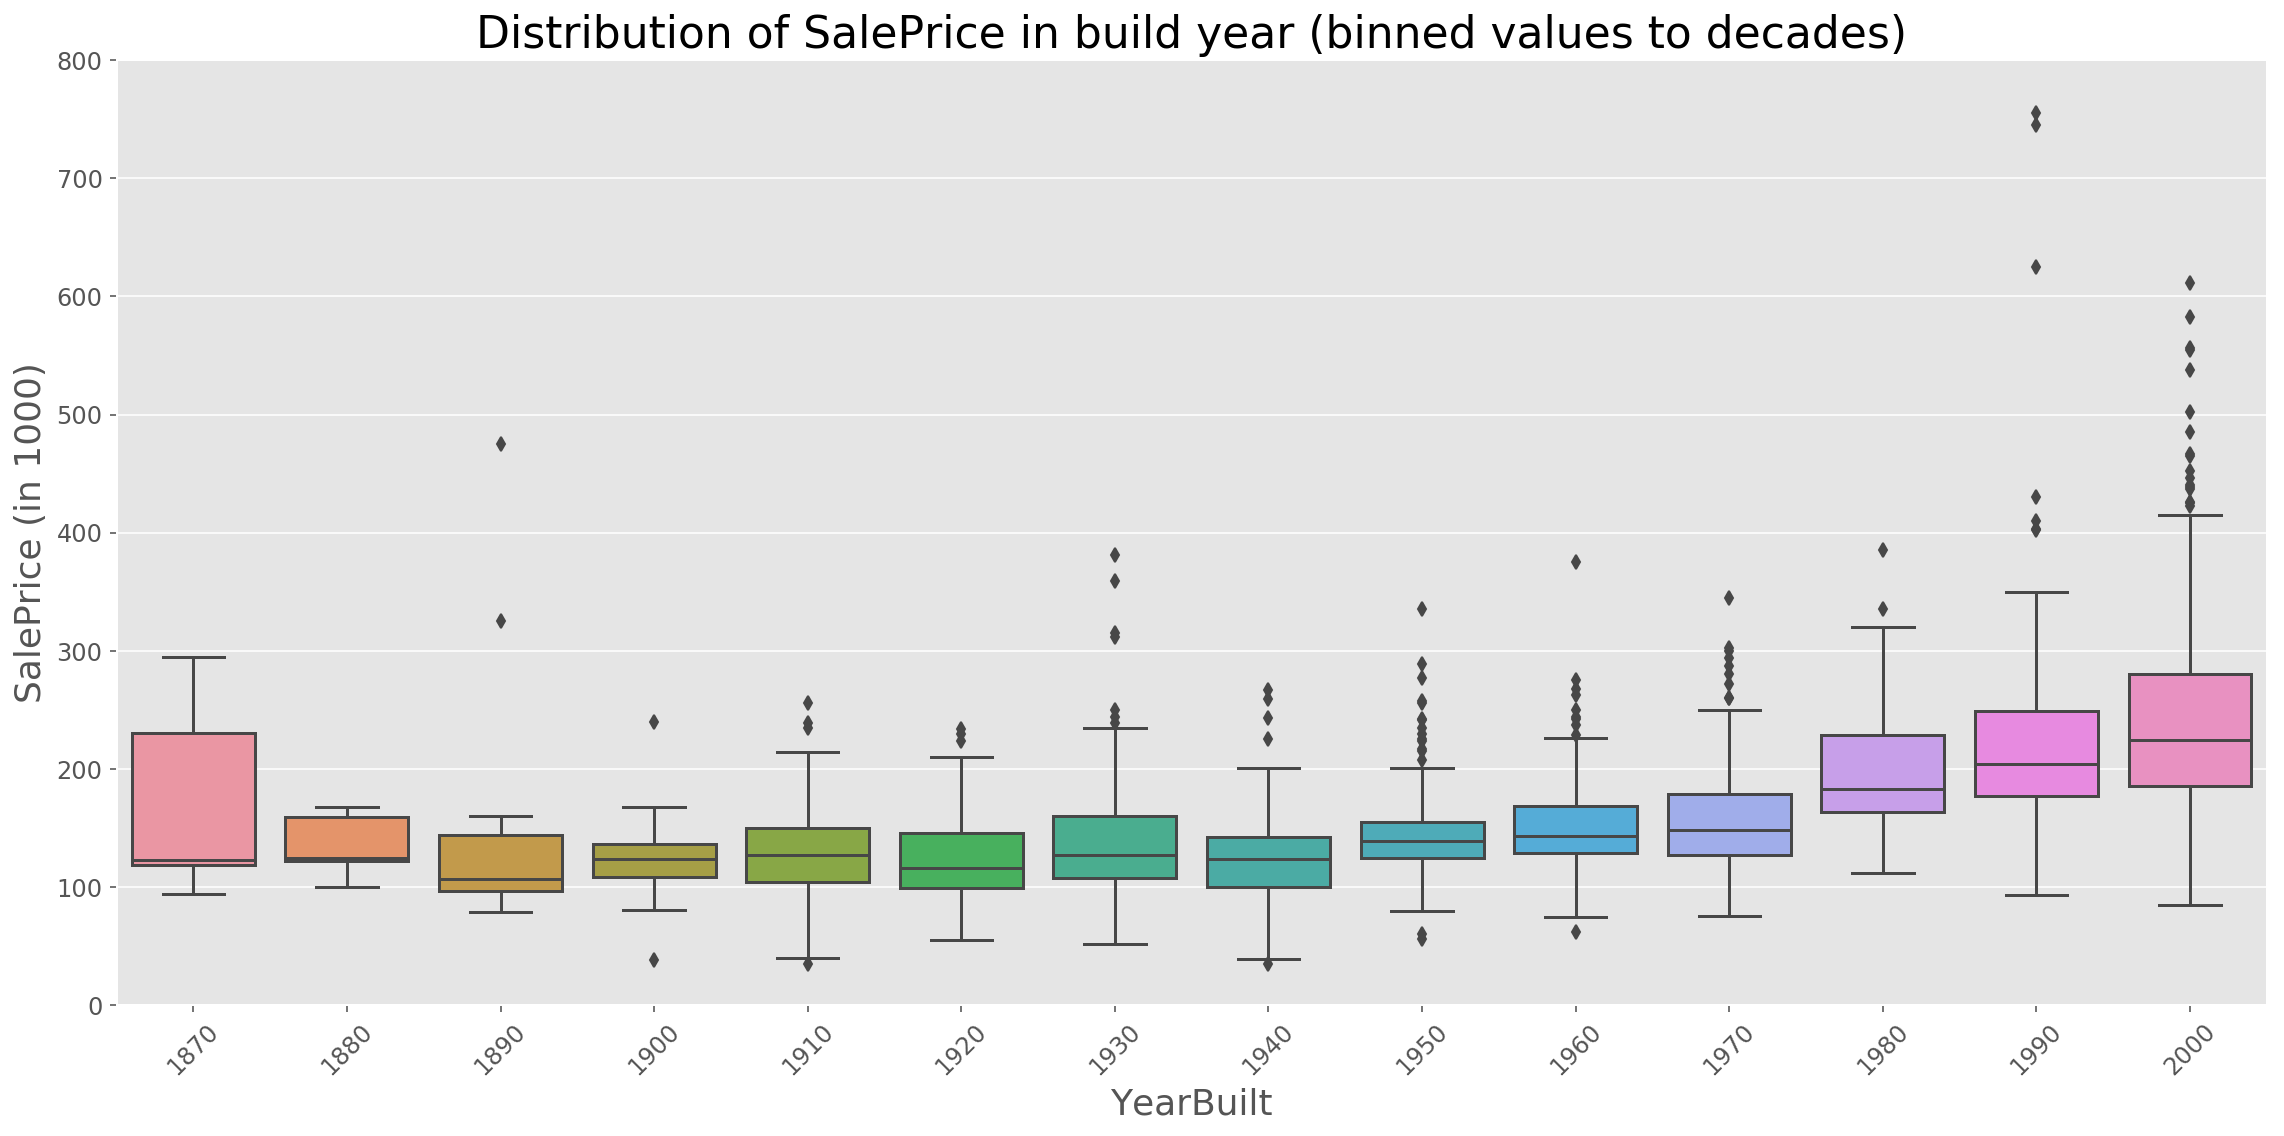

In [23]:
# bin years to decades since plotting every single year would clutter the plot
decades = np.arange(1870, 2015, 10)
df_cut = pd.cut(df.YearBuilt, bins=decades, labels=decades[:-1])
df_comb = pd.concat([df_cut, df.SalePrice], axis=1)

plt.figure(figsize=(16,5));
df_comb.groupby("YearBuilt").SalePrice.count().plot(kind="bar")
plt.title("Count of observations in build year (binned values to decades)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,8));
ax = sns.boxplot(x="YearBuilt", y="SalePrice", data=df_comb)
plt.axis(ymin=0, ymax=800000)
plt.title("Distribution of SalePrice in build year (binned values to decades)")
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_1000))
plt.ylabel("SalePrice (in 1000)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We observe that:

- Most of the house were built 1950 and later.
- A good third of all properties was built 1990 and later.
- Newer houses tend to yield a little higher mean of sale price.
- House from 1870 to 1880 have an unusual variance in sale price – again very likely to outliers

Let's have a look at the time of sales...

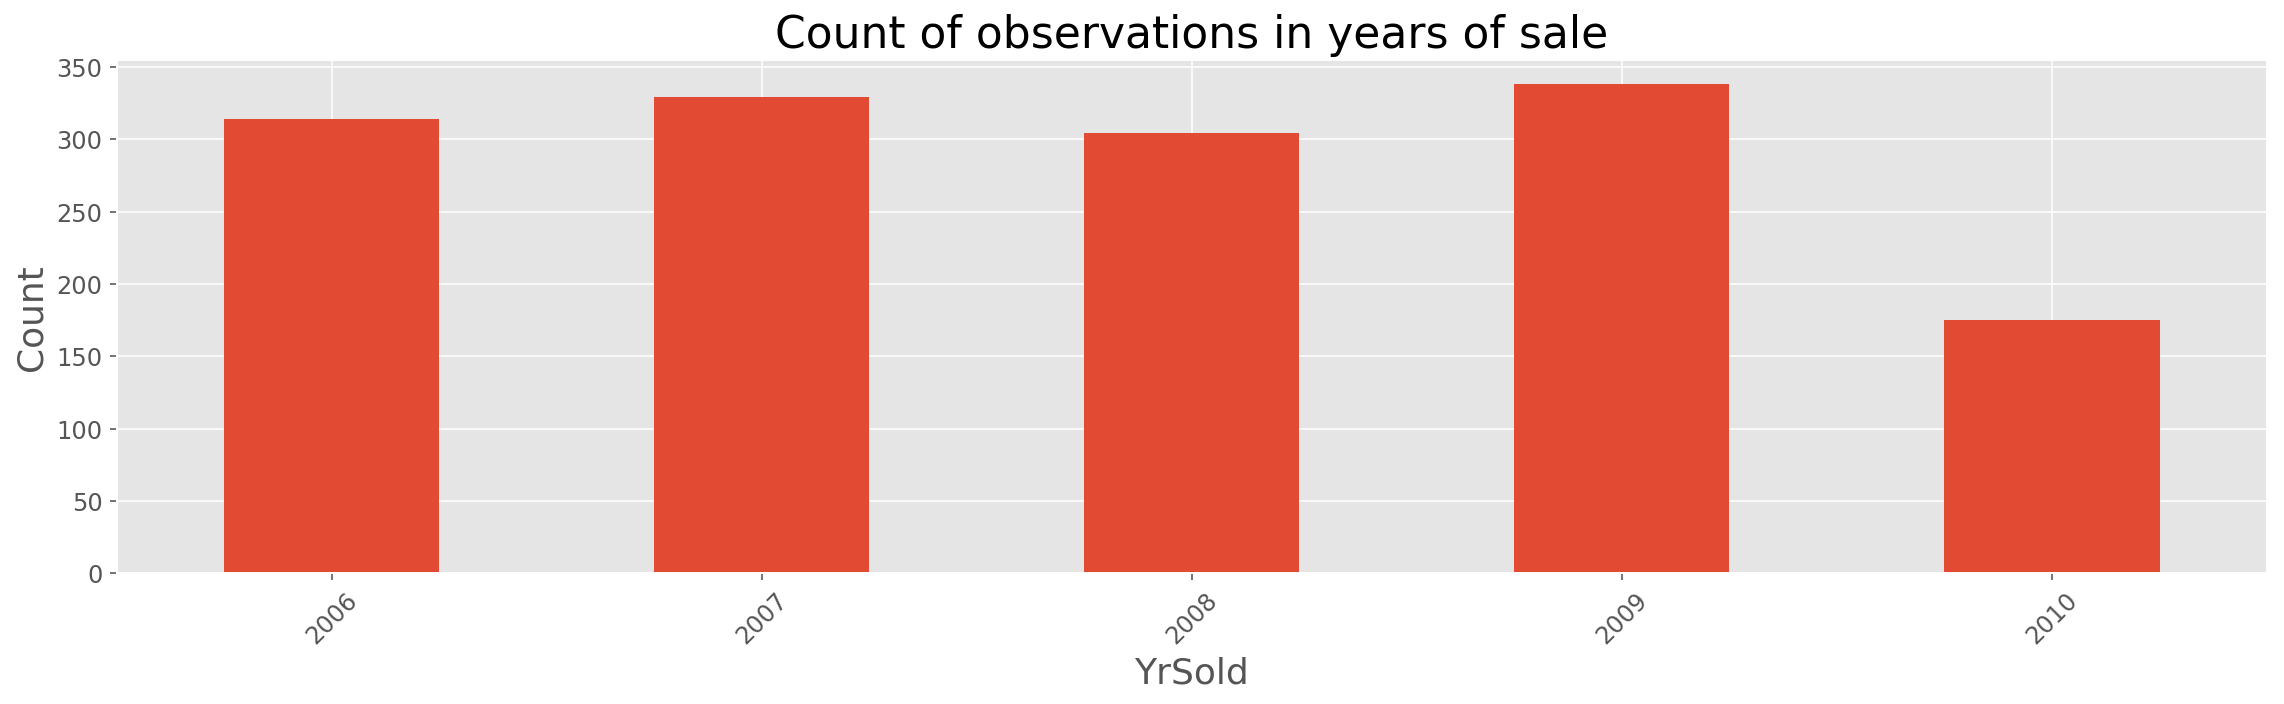

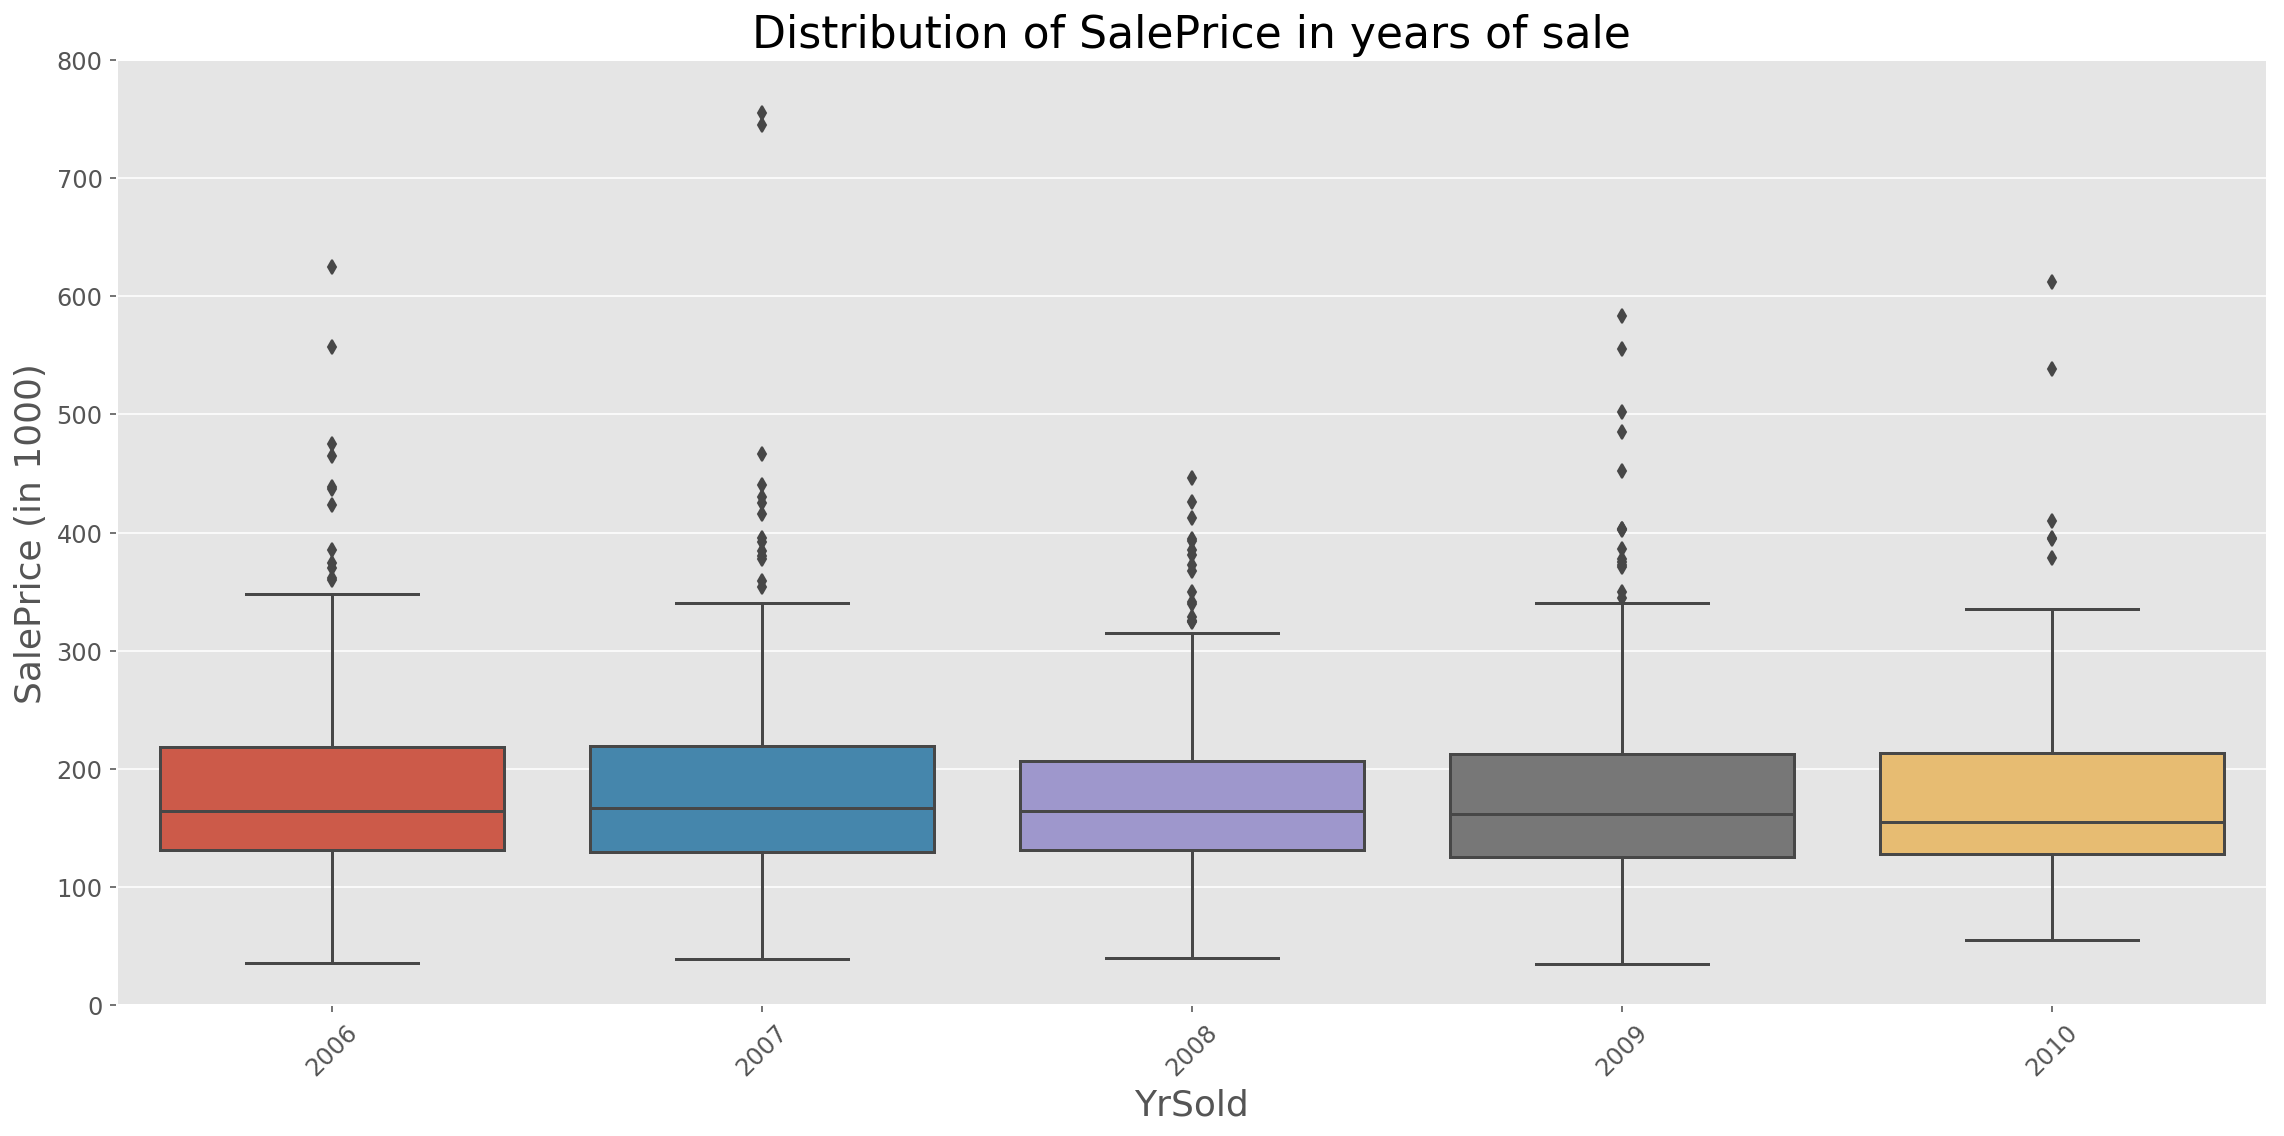

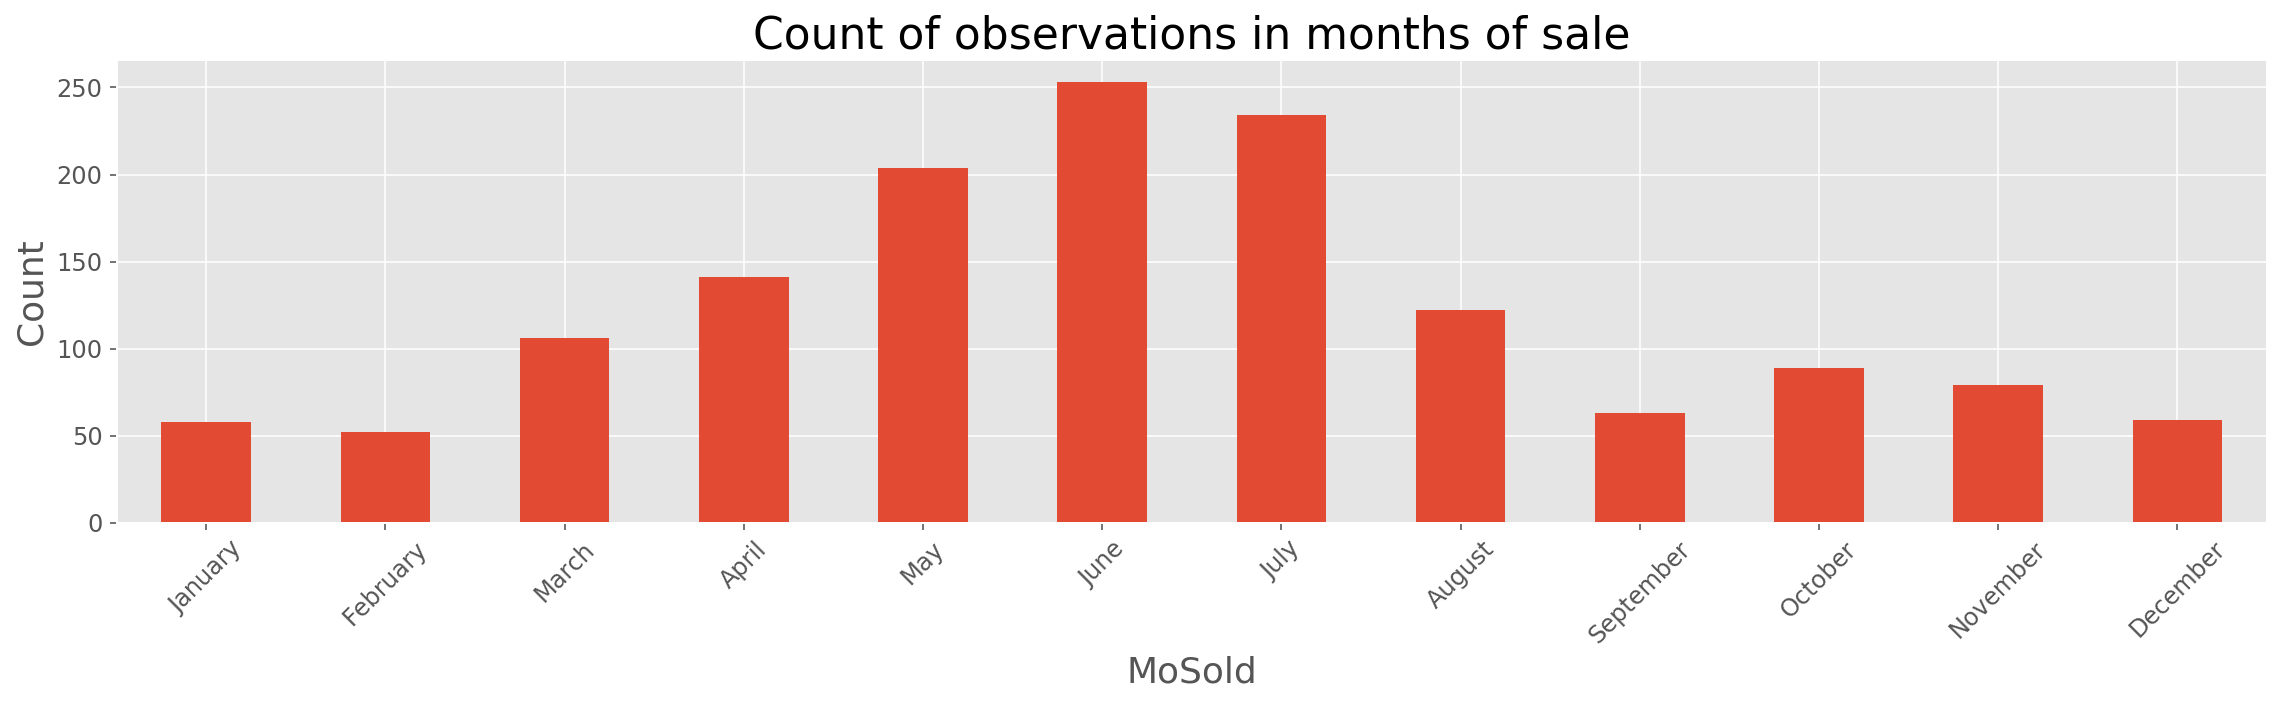

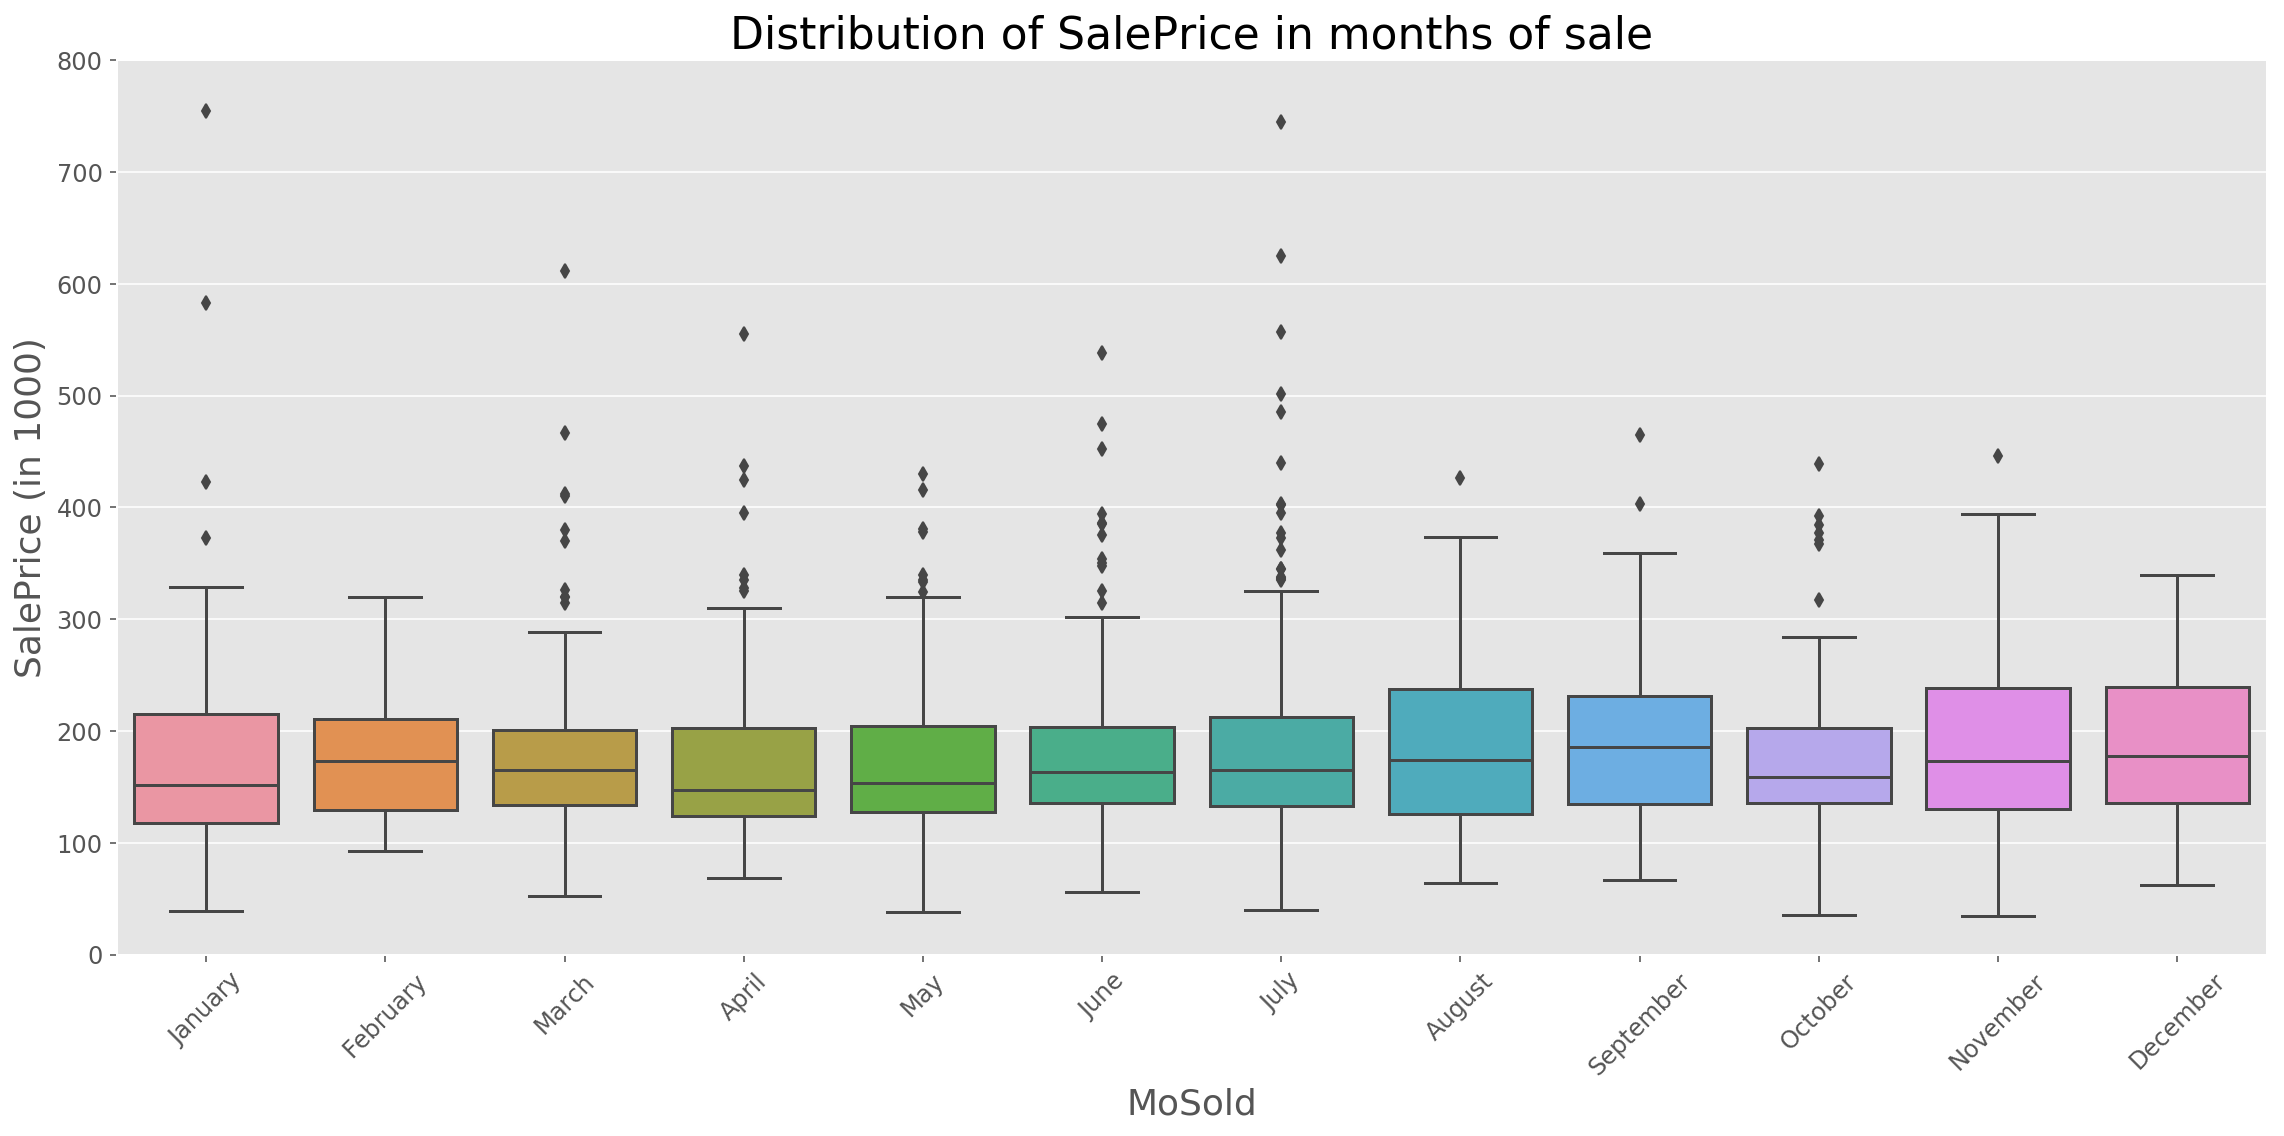

In [24]:
plt.figure(figsize=(16,5));
df.groupby("YrSold").SalePrice.count().plot(kind="bar")
plt.title("Count of observations in years of sale")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,8));
ax = sns.boxplot(x="YrSold", y="SalePrice", data=df)
plt.axis(ymin=0, ymax=800000)
plt.title("Distribution of SalePrice in years of sale")
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_1000))
plt.ylabel("SalePrice (in 1000)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

months_names = calendar.month_name[1:13]

plt.figure(figsize=(16,5));
df.groupby("MoSold").SalePrice.count().plot(kind="bar")
plt.title("Count of observations in months of sale")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(0, 12), labels=months_names, rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,8));
ax = sns.boxplot(x="MoSold", y="SalePrice", data=df)
plt.axis(ymin=0, ymax=800000)
plt.title("Distribution of SalePrice in months of sale")
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_1000))
plt.ylabel("SalePrice (in 1000)")
plt.xticks(ticks=np.arange(0, 12), labels=months_names, rotation=45)
plt.tight_layout()
plt.show()

Observations:
    
- Fewer sales in 2010. Could be either because less samples were collected. Or the financial crisis of 2009 hit the market.
- Most sales in summer months. Could be valuable to bin seasons to additional variables during feature engineering.

Since most of the house were built during the two decades before 2010 let's take this into account and **analyze the actual age of the house in the year of sale**.

In [25]:
df["Age"] = df.YrSold - df.YearBuilt
print(df.Age.describe())

count   1460.00000
mean      36.54795
std       30.25015
min        0.00000
25%        8.00000
50%       35.00000
75%       54.00000
max      136.00000
Name: Age, dtype: float64


- On average the properties were 37 years old at the time of sale (with a mean of 35 very close to that).
- On average houses can be +/- 30 years older or younger than that at time of sale.
- The oldest house was 136 years old and we have sales of house that were built in the year of sale. 

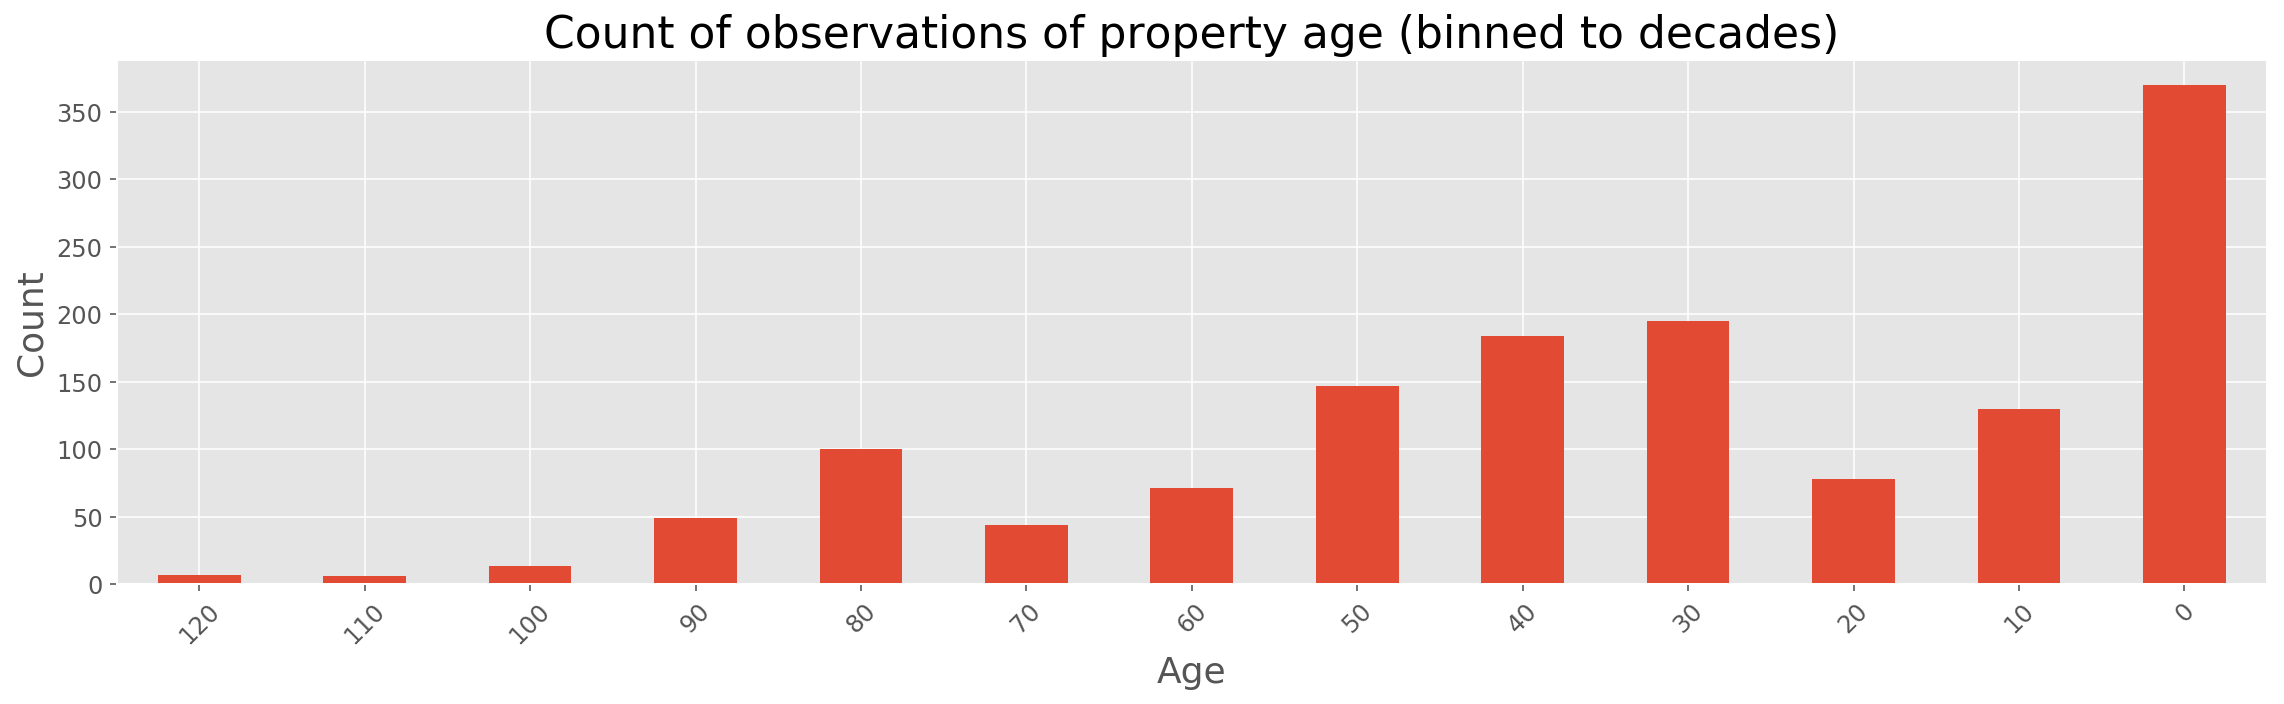

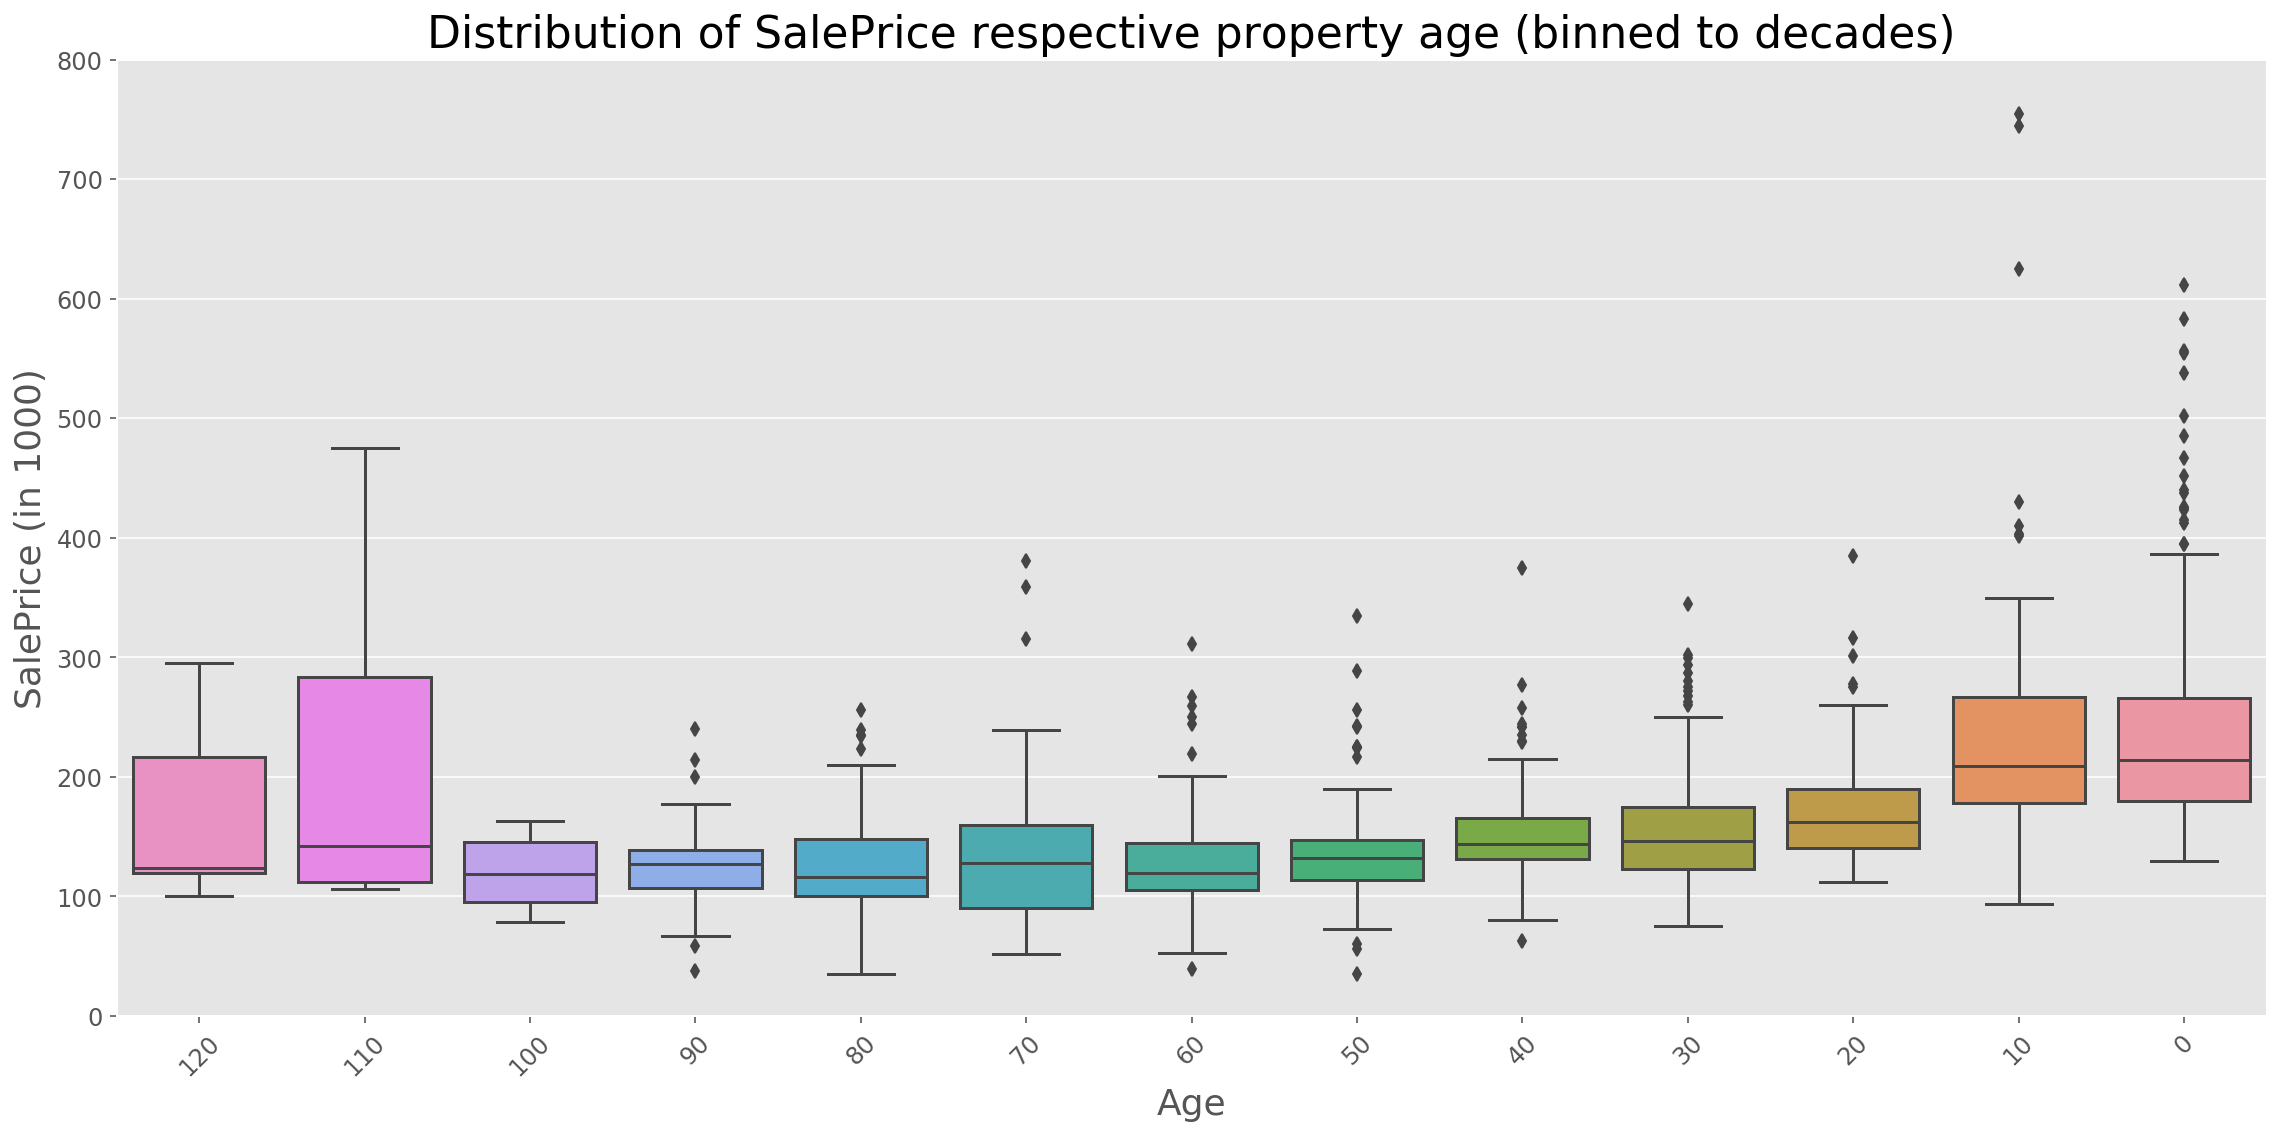

In [26]:
decades = np.arange(0, 136, 10)
df_cut = pd.cut(df.Age, bins=decades, labels=decades[:-1])
df_comb = pd.concat([df_cut, df.SalePrice], axis=1)

plt.figure(figsize=(16,5));
df_comb.groupby("Age").SalePrice.count().plot(kind="bar")
plt.title("Count of observations of property age (binned to decades)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,8));
ax = sns.boxplot(x="Age", y="SalePrice", data=df_comb)
plt.axis(ymin=0, ymax=800000)
plt.title("Distribution of SalePrice respective property age (binned to decades)")
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_1000))
plt.ylabel("SalePrice (in 1000)")
plt.xticks(rotation=45)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

We only observe a notable difference for newer houses. E.g. the median of price for houses between 0 and 19 years of age is almost the same now. 

Lastly we visualize some categoricals in regard to sale price.

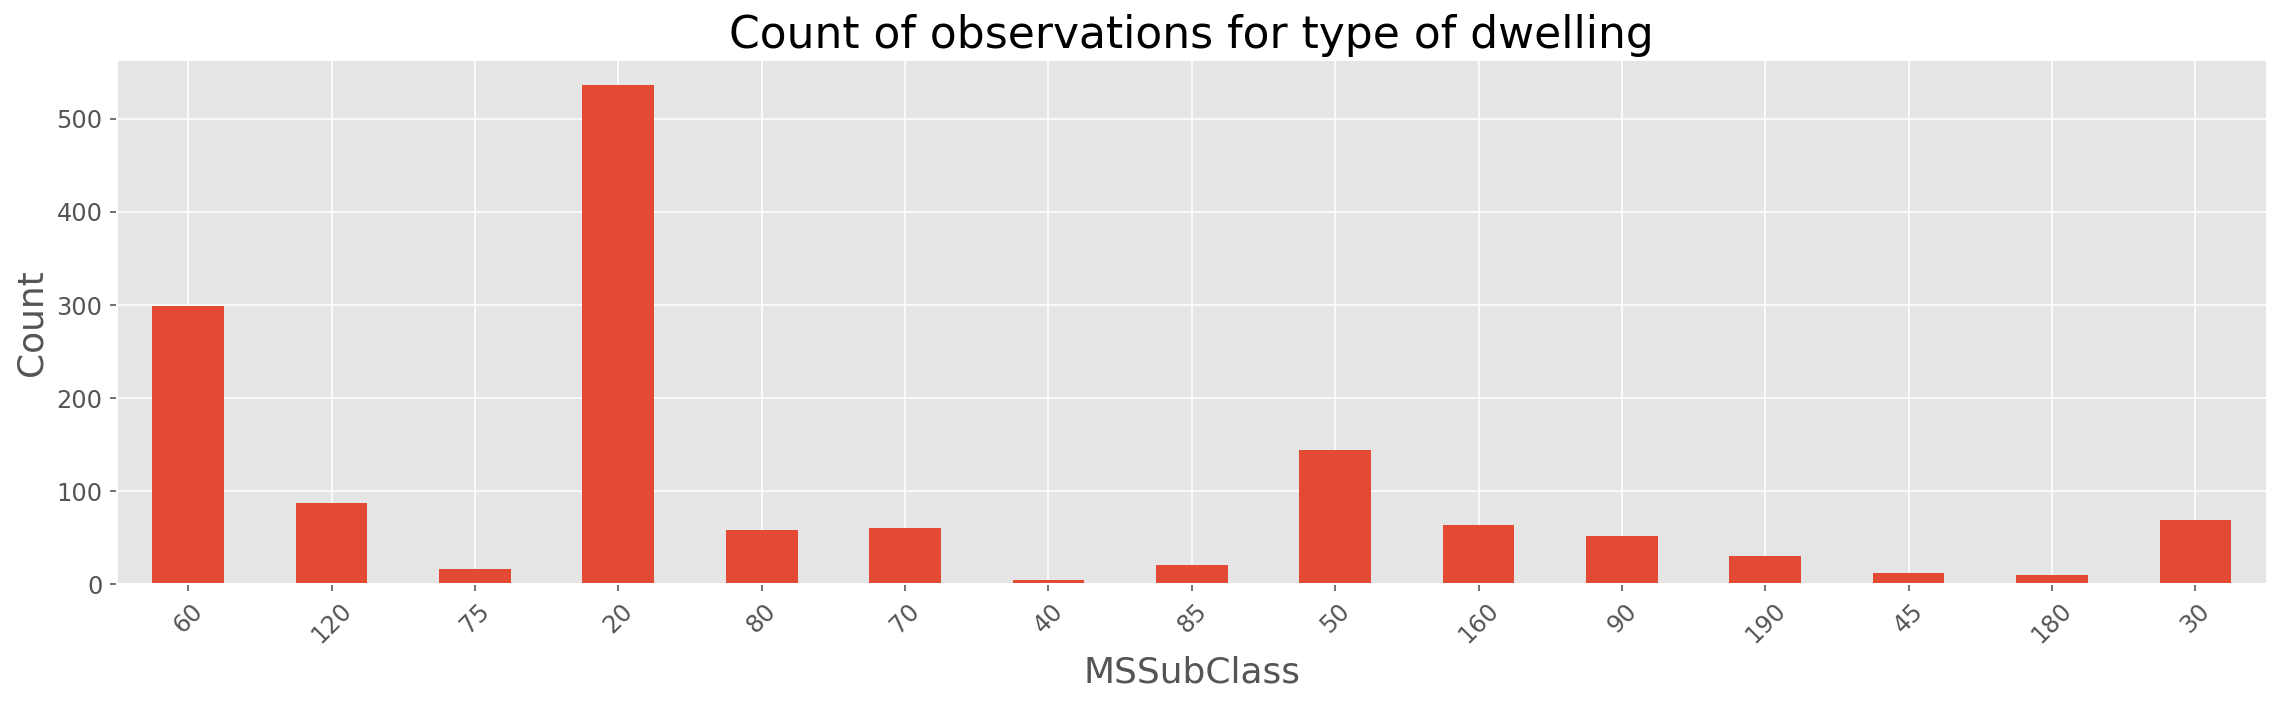

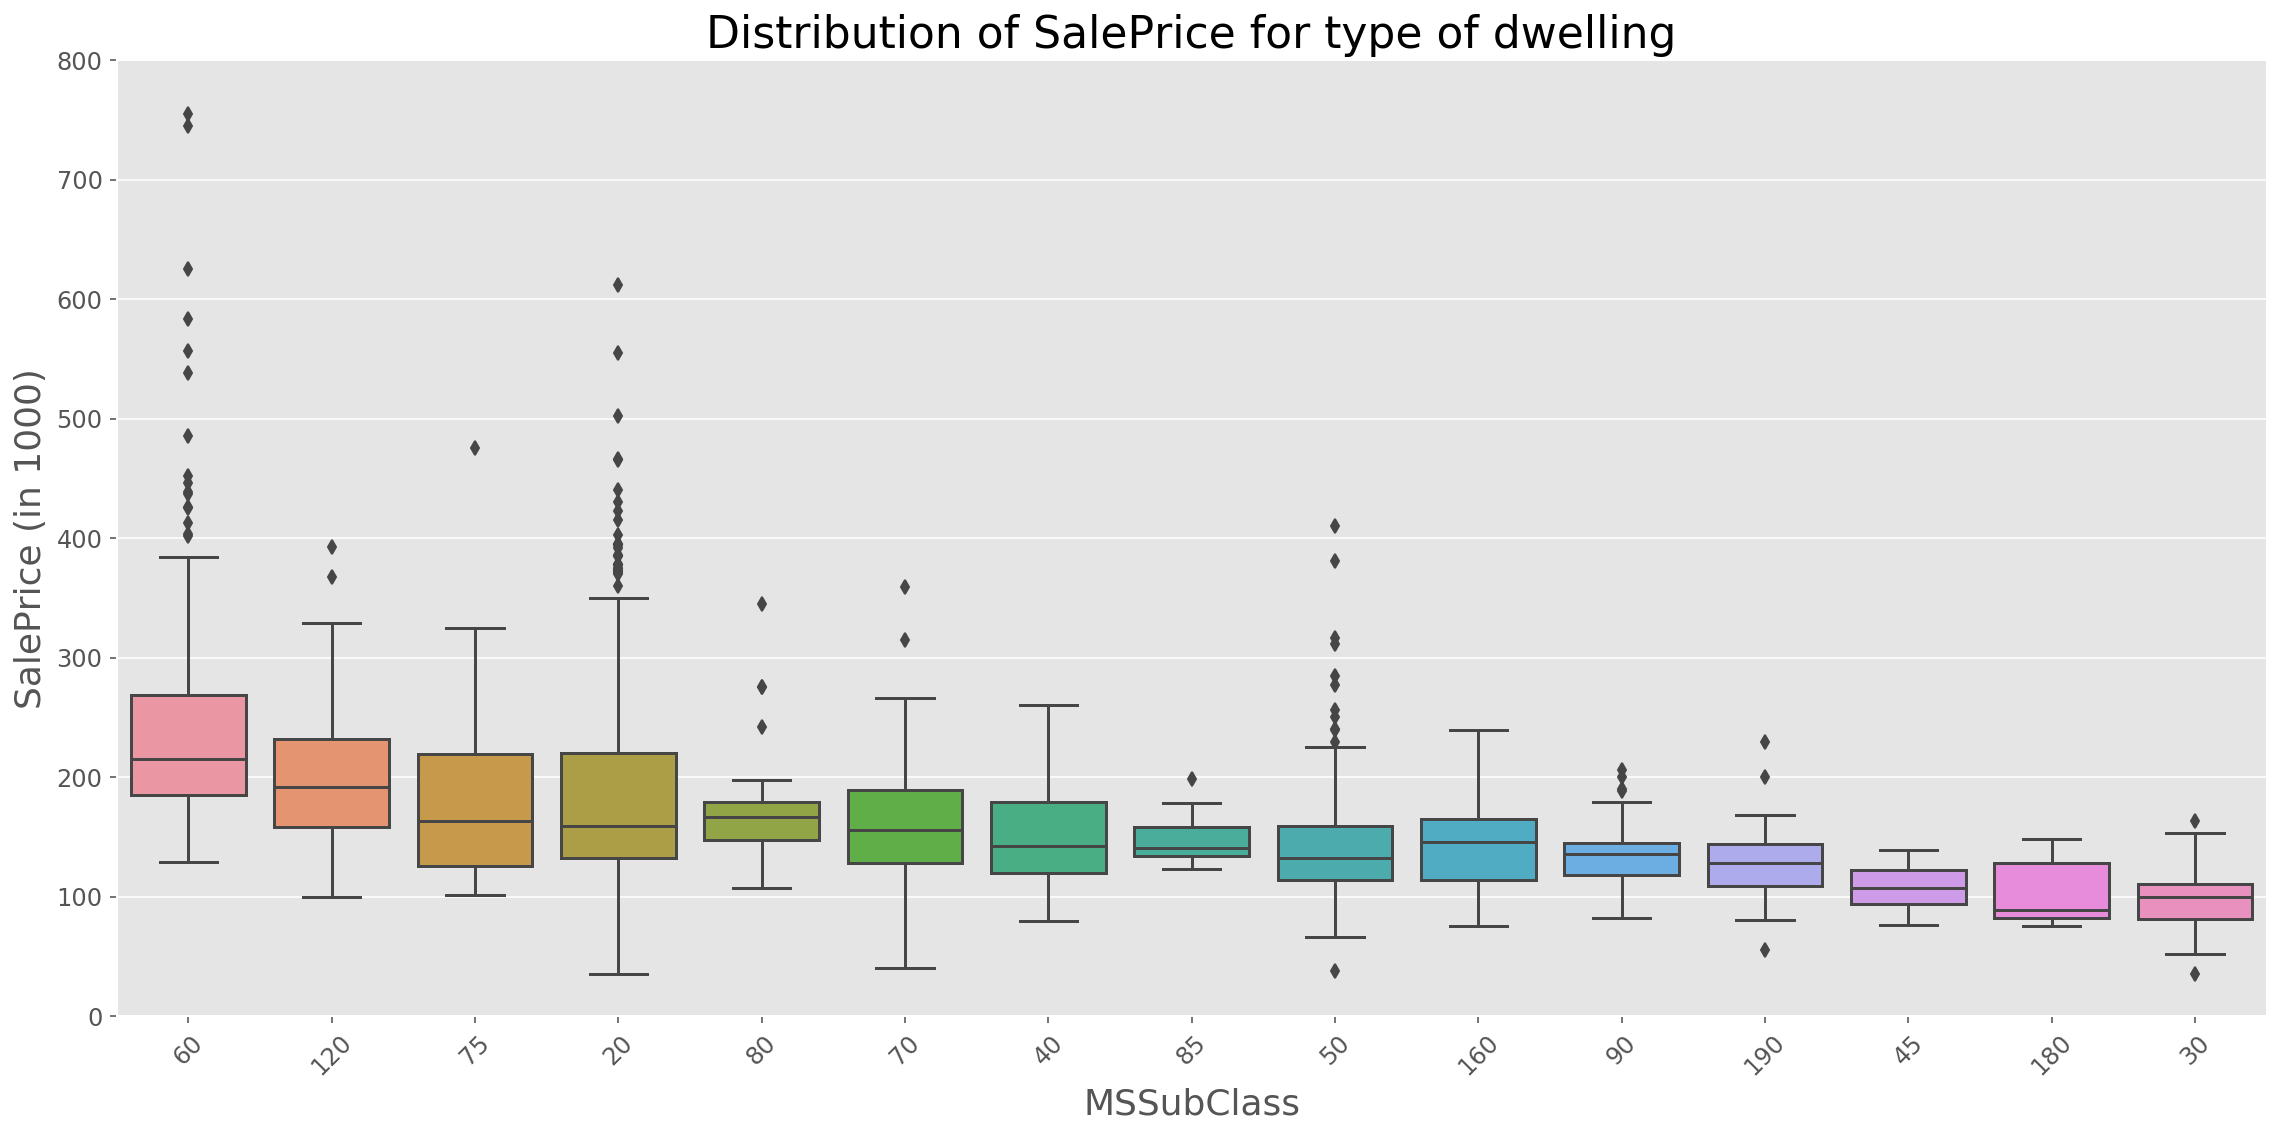

In [27]:
# MSSubClass: Identifies the type of dwelling involved in the sale.
order = df.groupby("MSSubClass").SalePrice.mean().sort_values(ascending=False).index

plt.figure(figsize=(16,5));
df_g = df.groupby("MSSubClass").SalePrice.count()
df_g = df_g.reindex(order)
df_g.plot(kind="bar")
plt.title("Count of observations for type of dwelling")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,8));
ax = sns.boxplot(x="MSSubClass", y="SalePrice", data=df, order=order)
plt.axis(ymin=0, ymax=800000)
plt.title(f"Distribution of SalePrice for type of dwelling")
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_1000))
plt.ylabel("SalePrice (in 1000)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most observations are:

- «1-STORY 1946 & NEWER ALL STYLES» (MSSubClass == 20)
- «2-STORY 1946 & NEWER» (60) or
- «1-1/2 STORY FINISHED ALL AGES» (50)

2-story buildings (60) yield the highest prices on average among these.

A similar feature that describes the type of dwelling is `BldgType`.

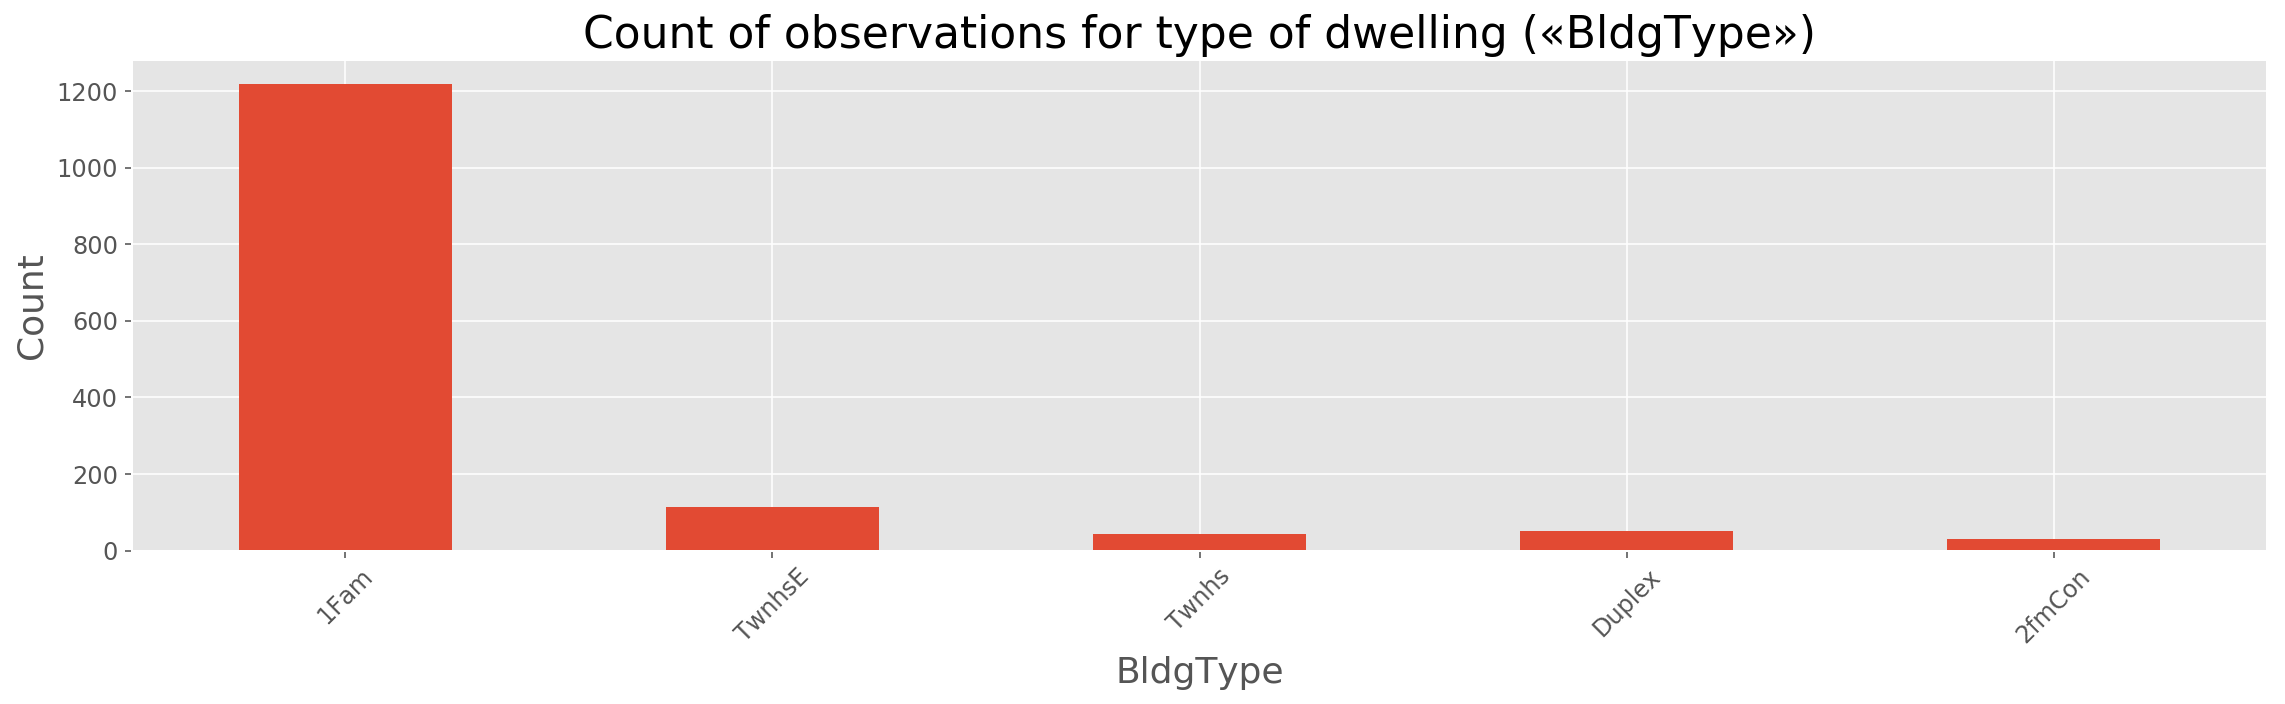

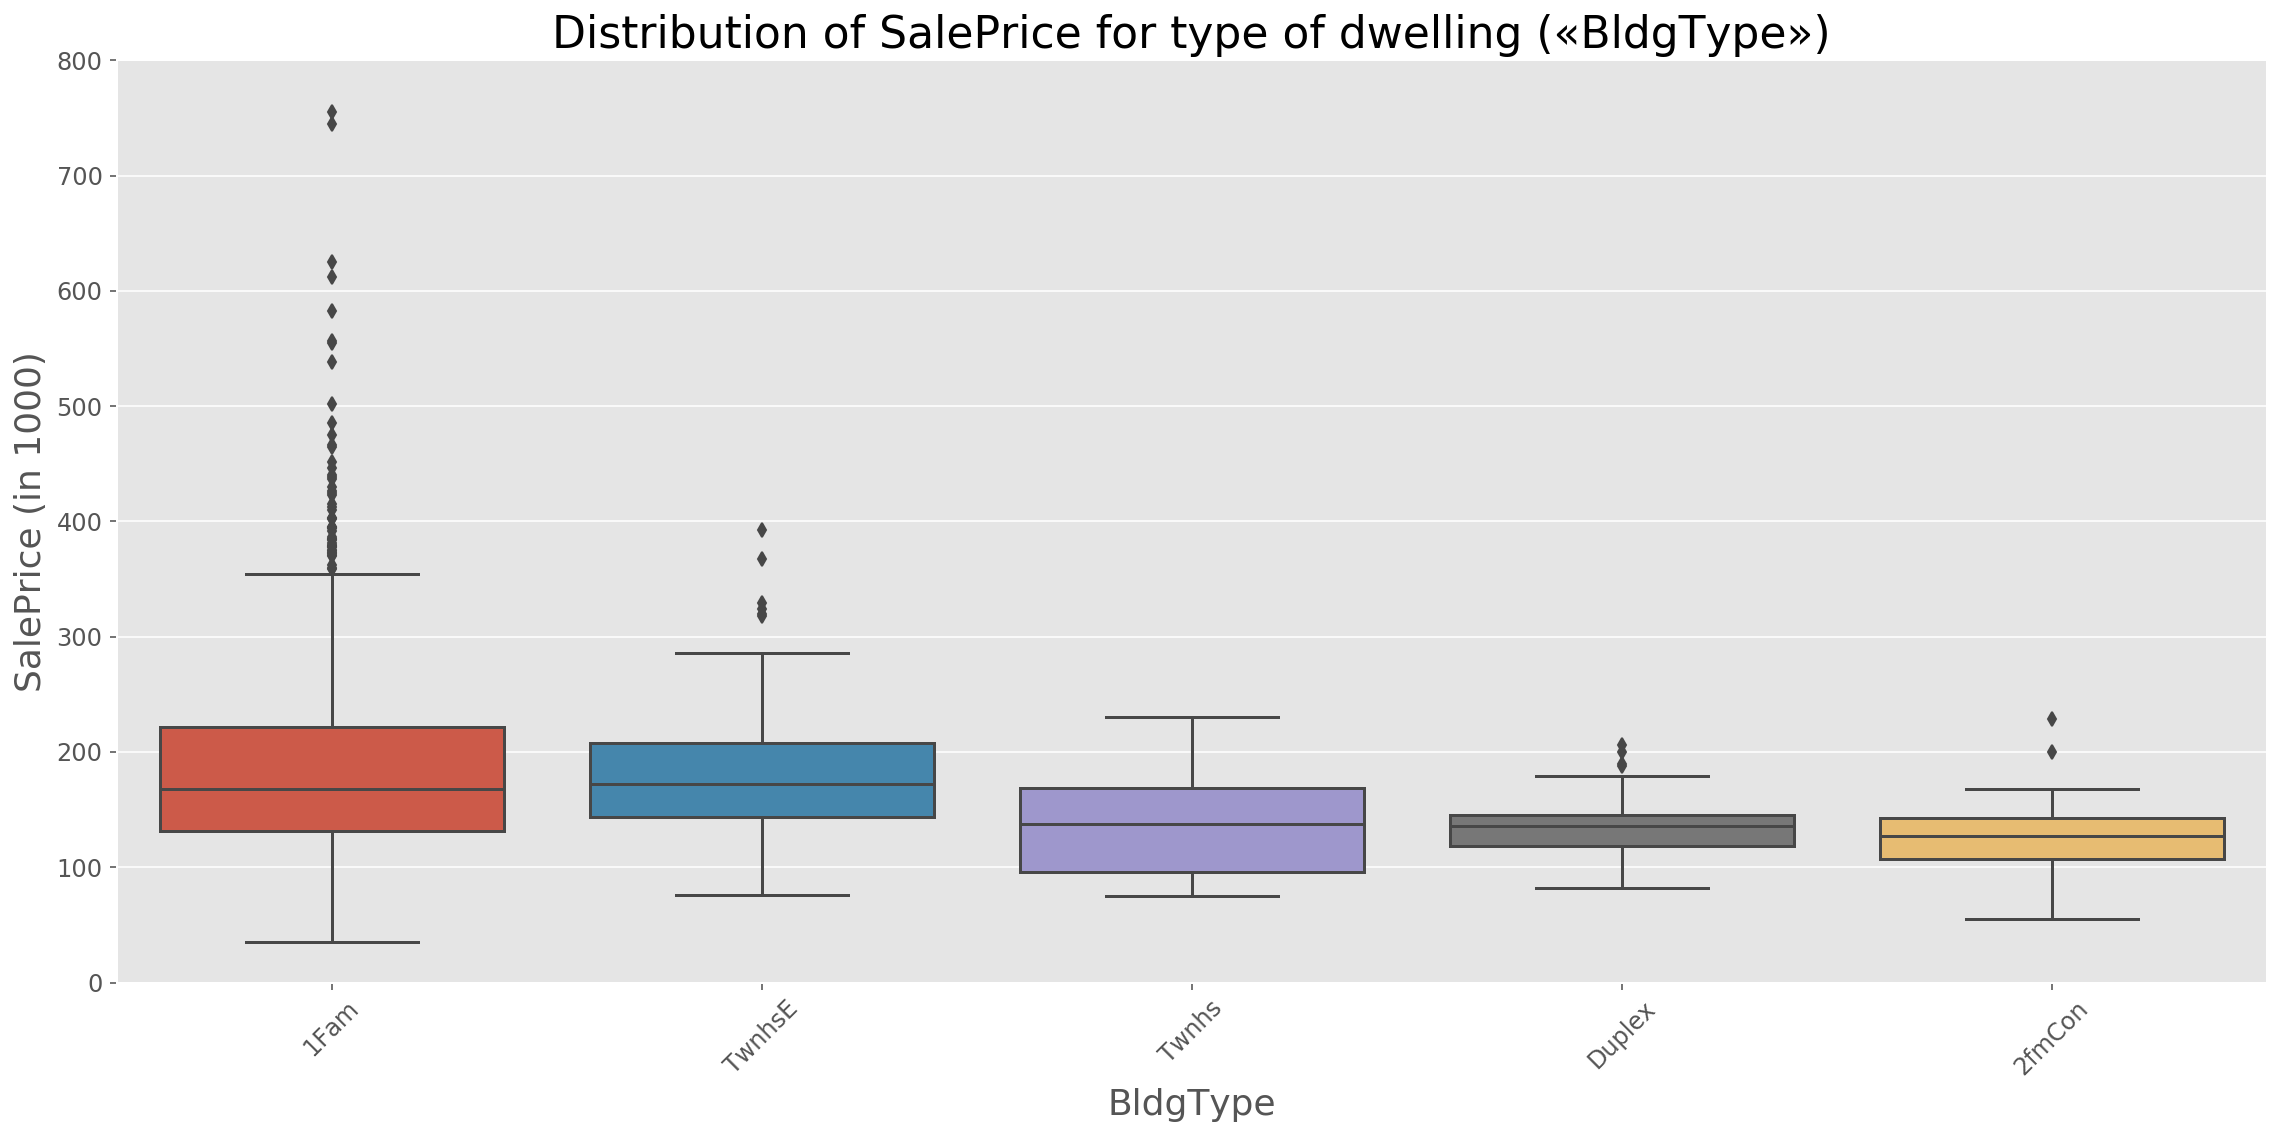

In [28]:
# BldgType: Type of dwelling
order = df.groupby("BldgType").SalePrice.mean().sort_values(ascending=False).index

plt.figure(figsize=(16,5));
df_g = df.groupby("BldgType").SalePrice.count()
df_g = df_g.reindex(order)
df_g.plot(kind="bar")
plt.title("Count of observations for type of dwelling («BldgType»)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,8));
ax = sns.boxplot(x="BldgType", y="SalePrice", data=df, order=order)
plt.axis(ymin=0, ymax=800000)
plt.title(f"Distribution of SalePrice for type of dwelling («BldgType»)")
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_1000))
plt.ylabel("SalePrice (in 1000)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The wide mayority of properties are «Single-family Detached». 
- Townhouse End Units (TwhnsE) come second pricewise and are more expensive than Inside Units (Twhns). Makes sense...
- «Two-family Conversions, originally built as one-family dwelling» are the least expensives properties on average.

**How do neighborhood and zoning affect prices?**

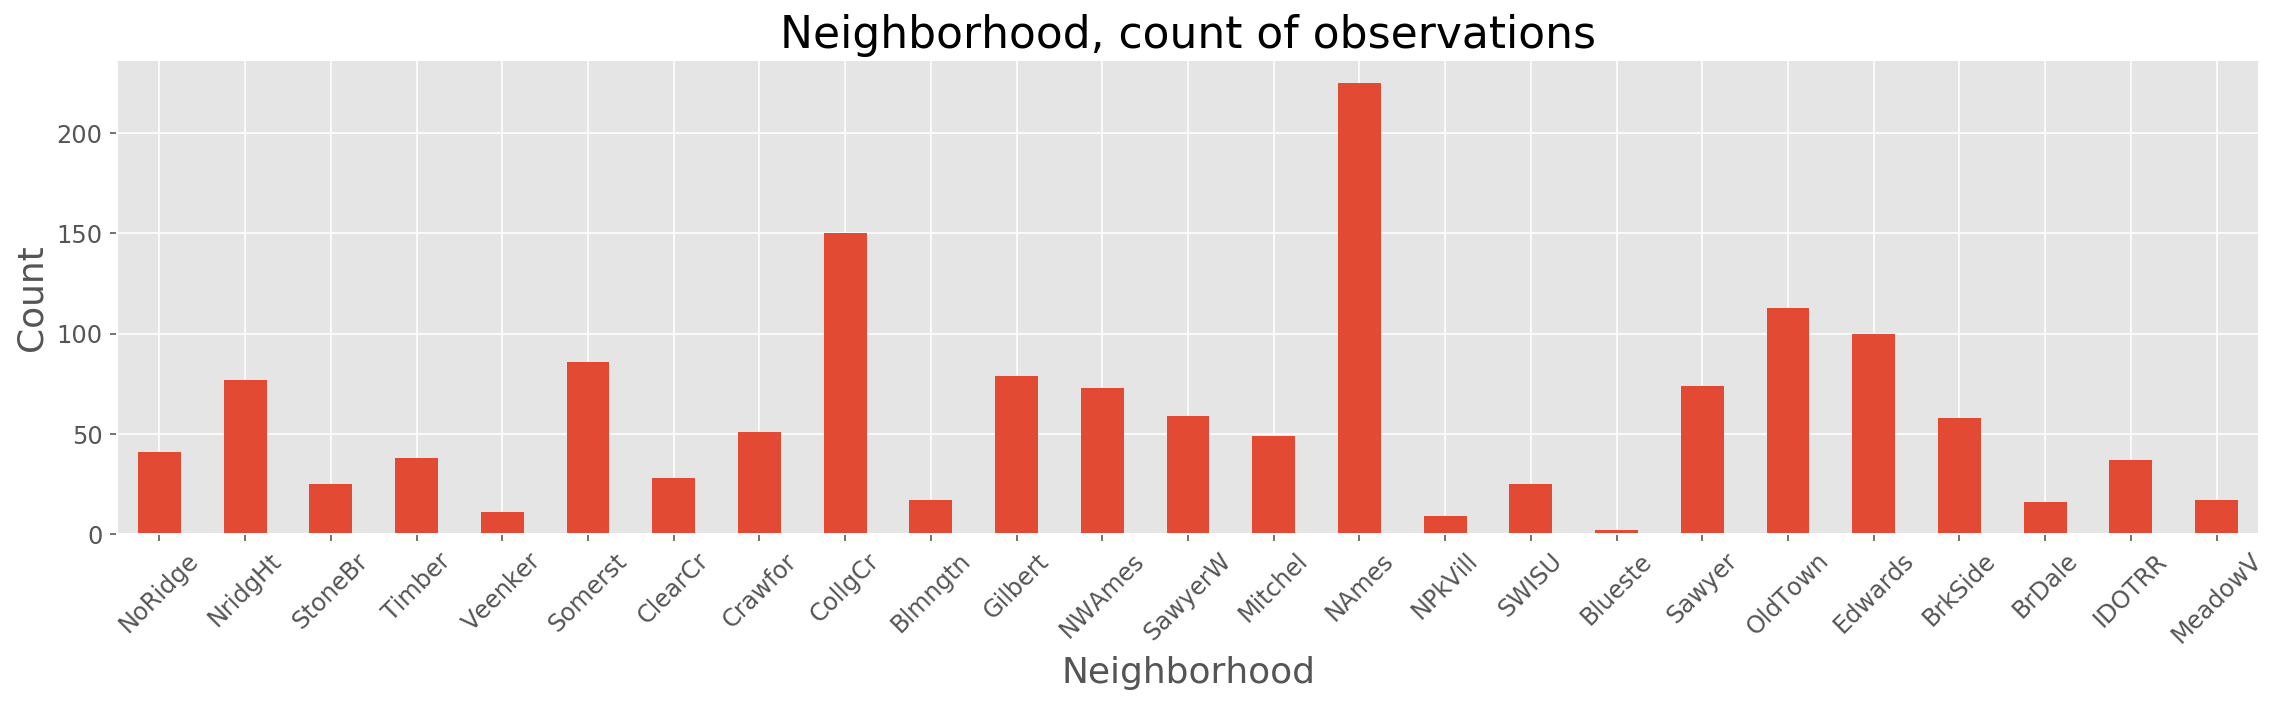

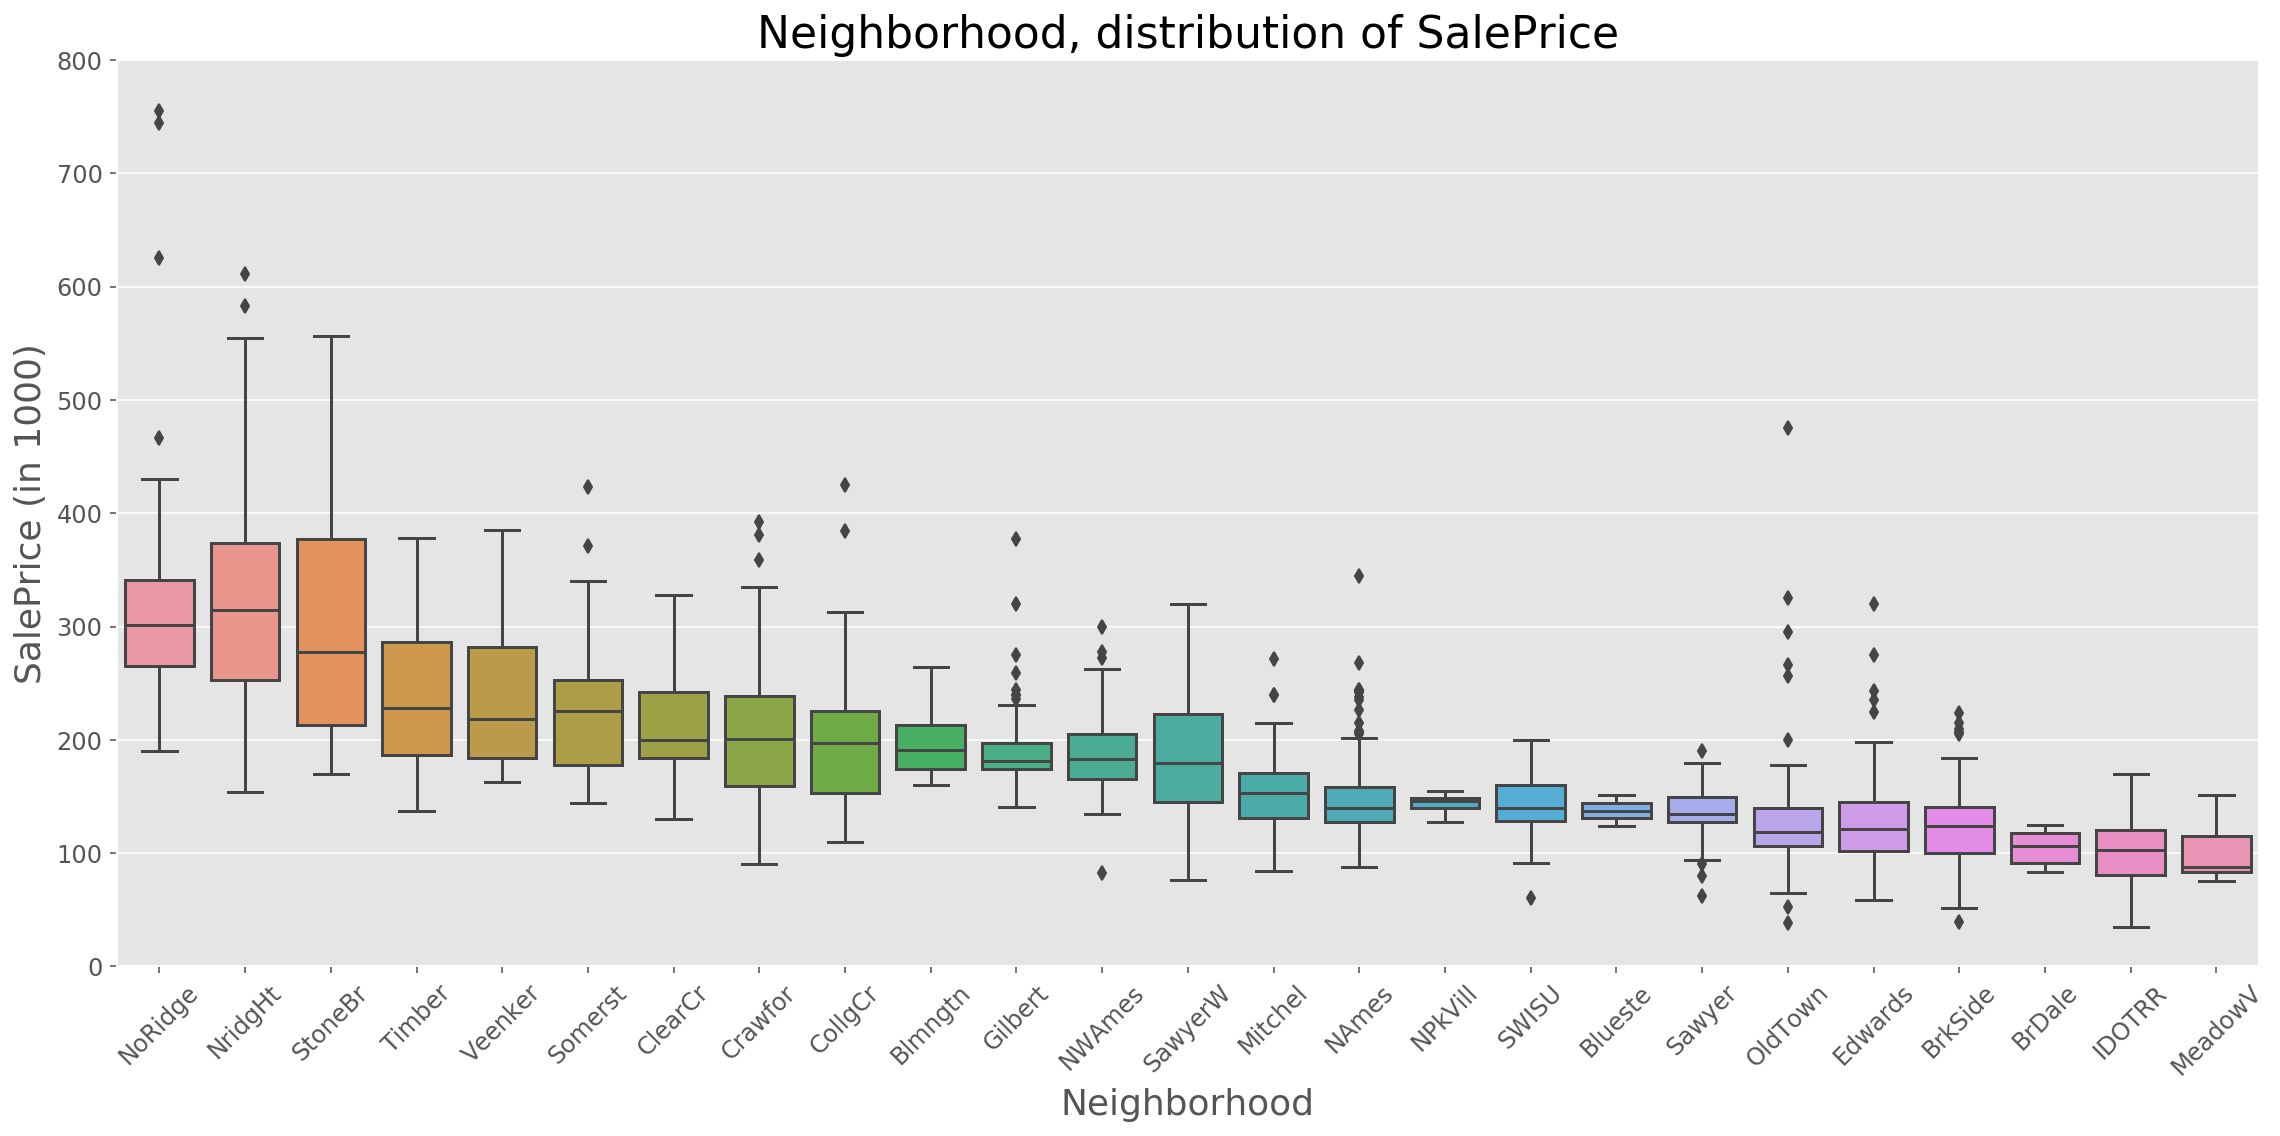

In [29]:
# create descending list of neighborhood names according to mean of sale price
# used to sort columns in plots
order = df.groupby("Neighborhood").SalePrice.mean().sort_values(ascending=False).index

plt.figure(figsize=(16,5));
df_g = df.groupby("Neighborhood").SalePrice.count().sort_values(ascending=False)
df_g = df_g.reindex(order)
df_g.plot(kind="bar")
plt.title("Neighborhood, count of observations")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,8));
ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=df, order=order)
plt.axis(ymin=0, ymax=800000)
plt.title(f"Neighborhood, distribution of SalePrice")
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_1000))
plt.ylabel("SalePrice (in 1000)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The north of Ames seems particularly pricey. A quick look on the map reveals parks, a lake and – golf clubs...

![](https://i.imgur.com/oZLcu99.png)

The least expensive area – Meadow village – in turn lies southwest of the centre, very close to the highway and the airport. So it might be quite noisy there.

Finally let's have a **look at sale types and conditions**.

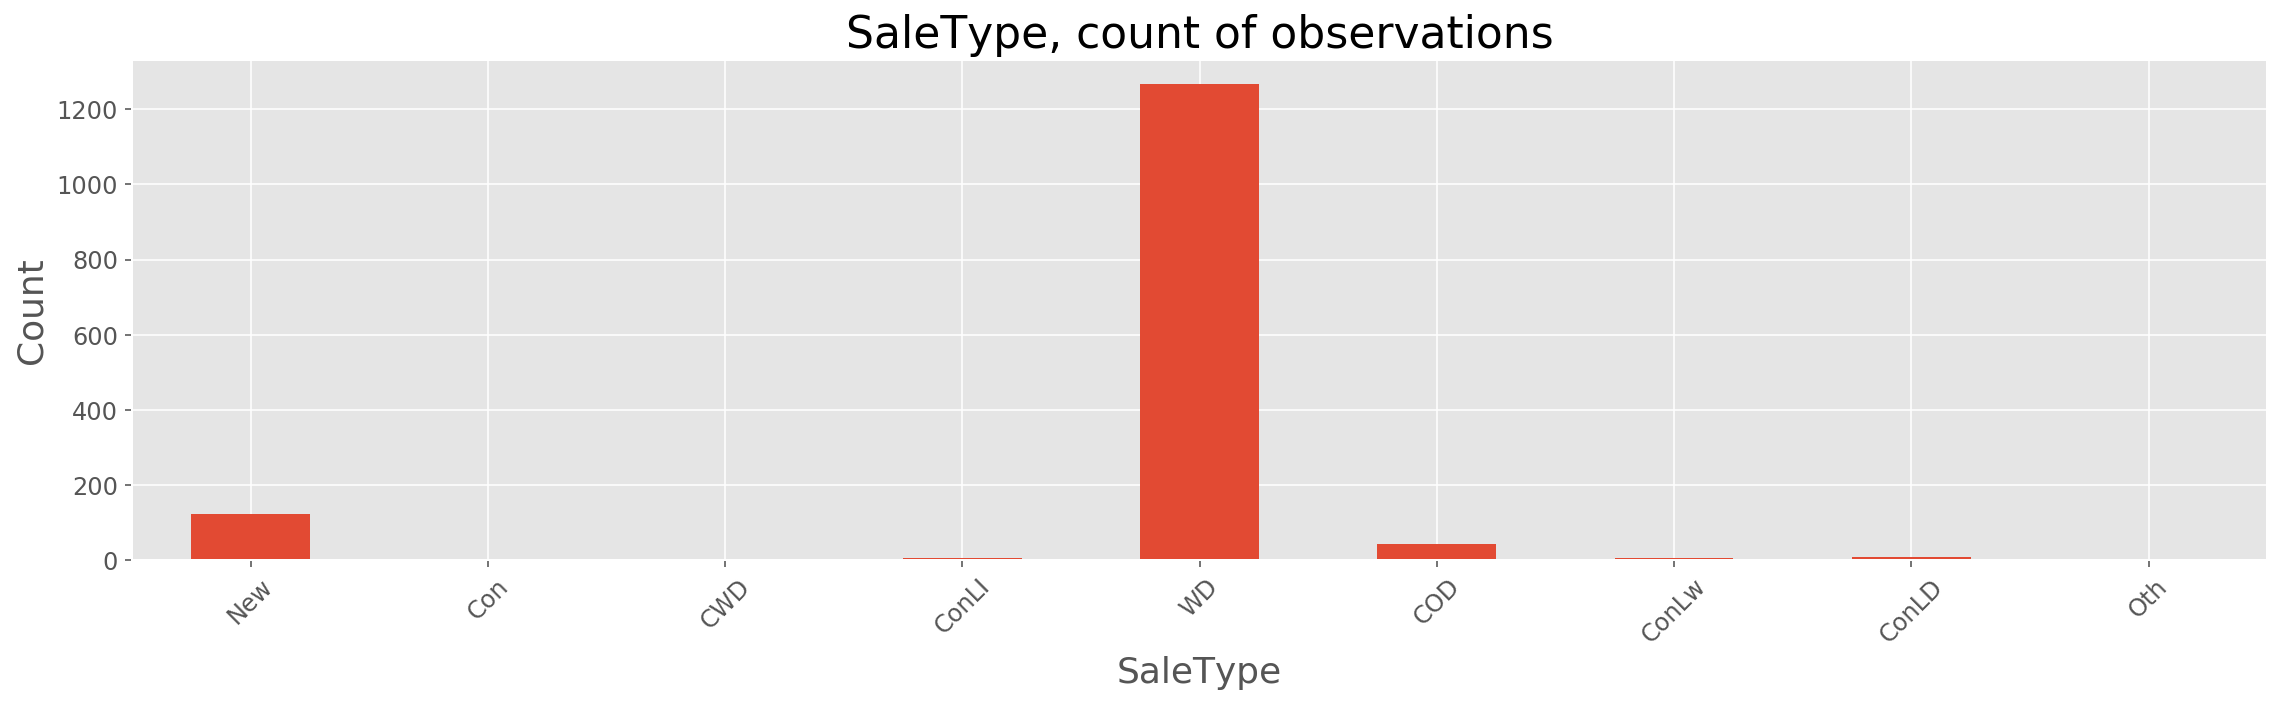

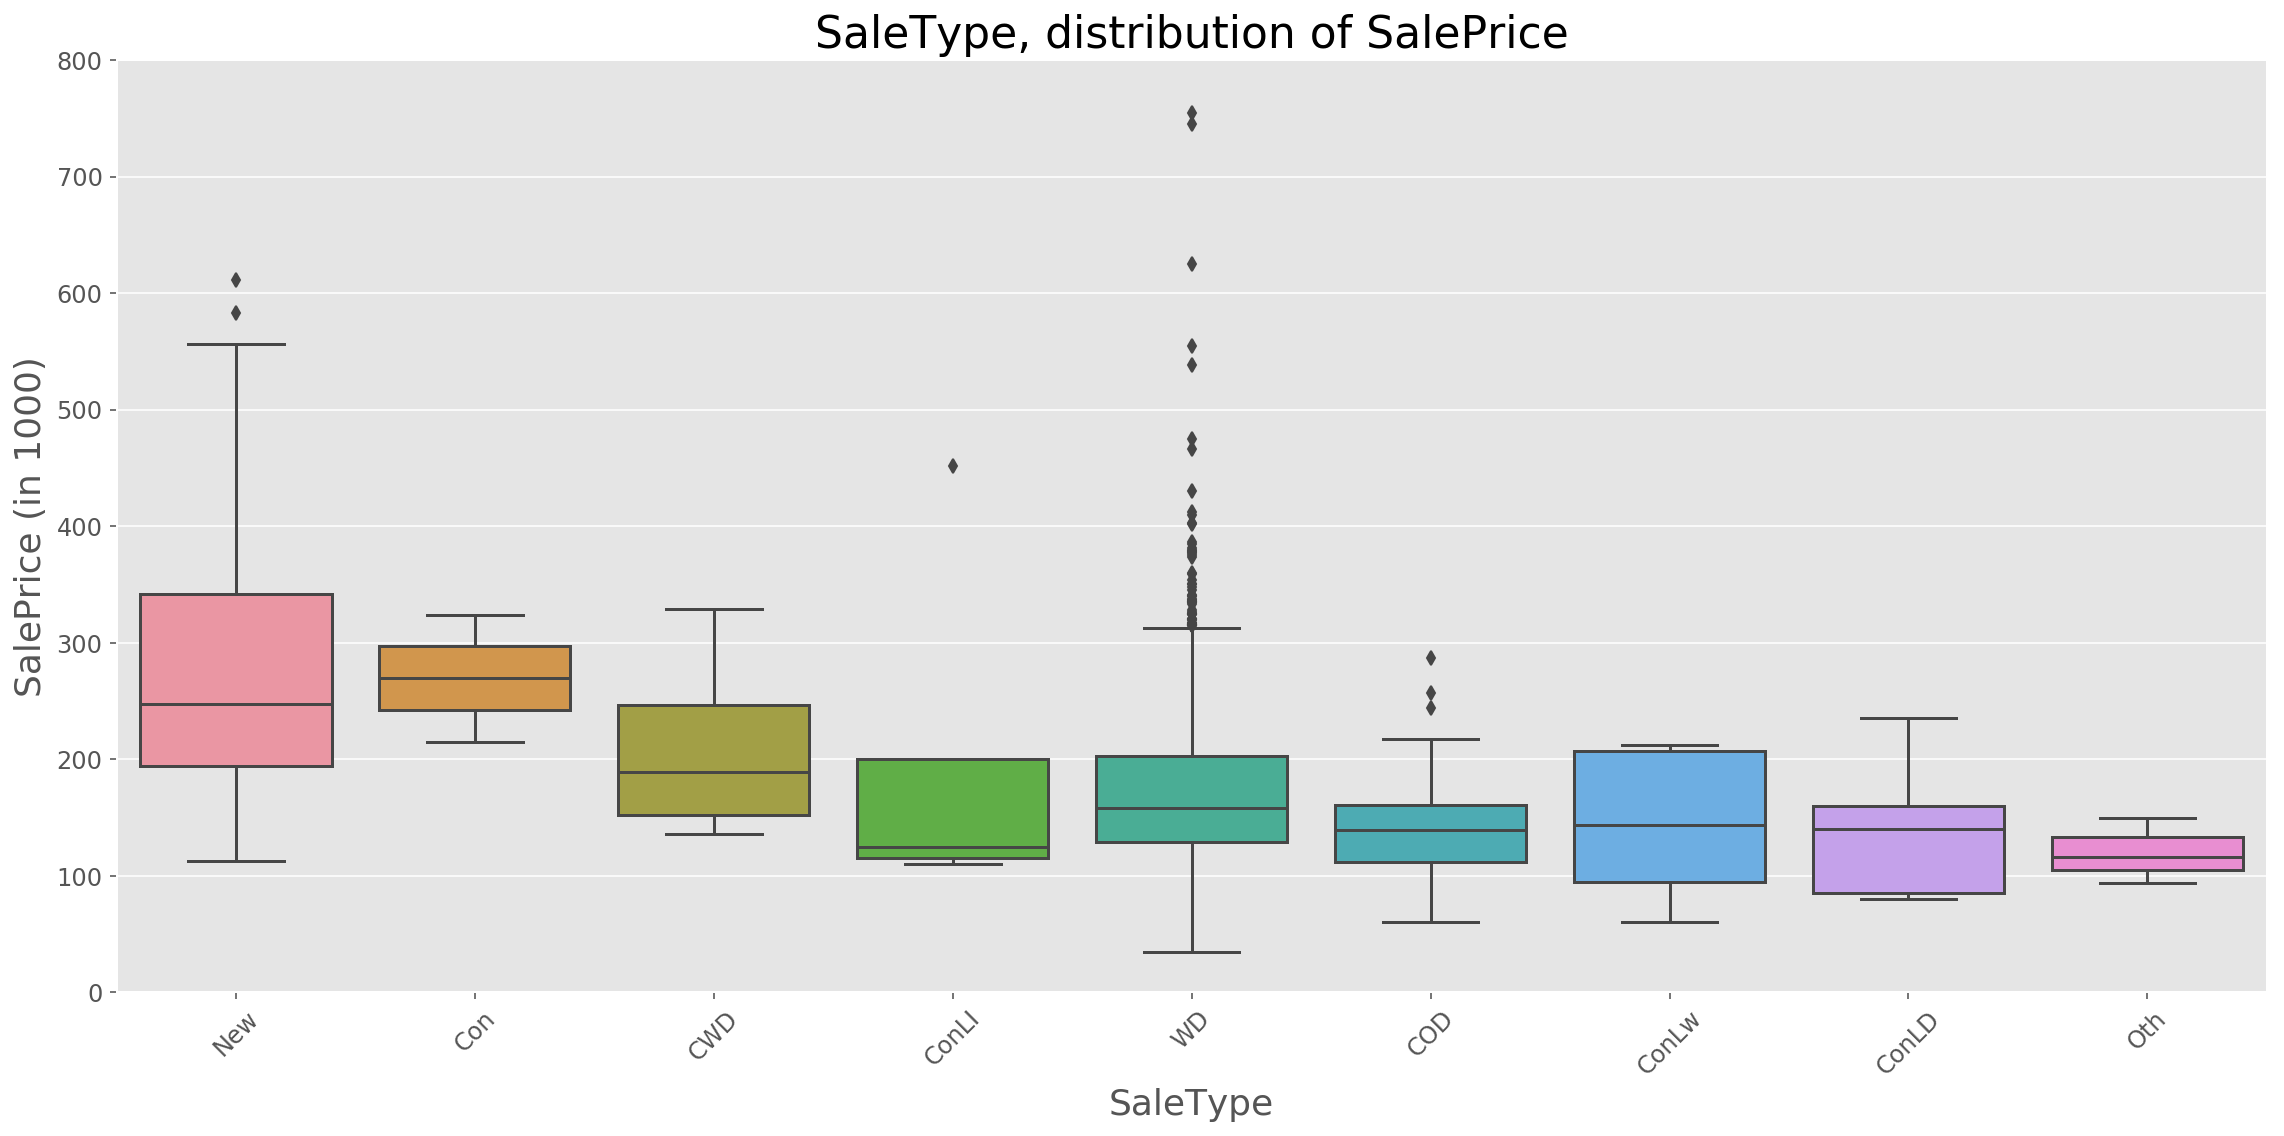

In [30]:
order = df.groupby("SaleType").SalePrice.mean().sort_values(ascending=False).index

plt.figure(figsize=(16,5));
df_g = df.groupby("SaleType").SalePrice.count().sort_values(ascending=False)
df_g = df_g.reindex(order)
df_g.plot(kind="bar")
plt.title("SaleType, count of observations")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,8));
ax = sns.boxplot(x="SaleType", y="SalePrice", data=df, order=order)
plt.axis(ymin=0, ymax=800000)
plt.title(f"SaleType, distribution of SalePrice")
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_1000))
plt.ylabel("SalePrice (in 1000)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We see 

- 1267 «Warranty Deed – Conventional» (WD) sales
- 122 properties that were sold as «New»
- 43 «Court Officer Deed/Estate» (COD)

New houses sell on average for the highest prices.

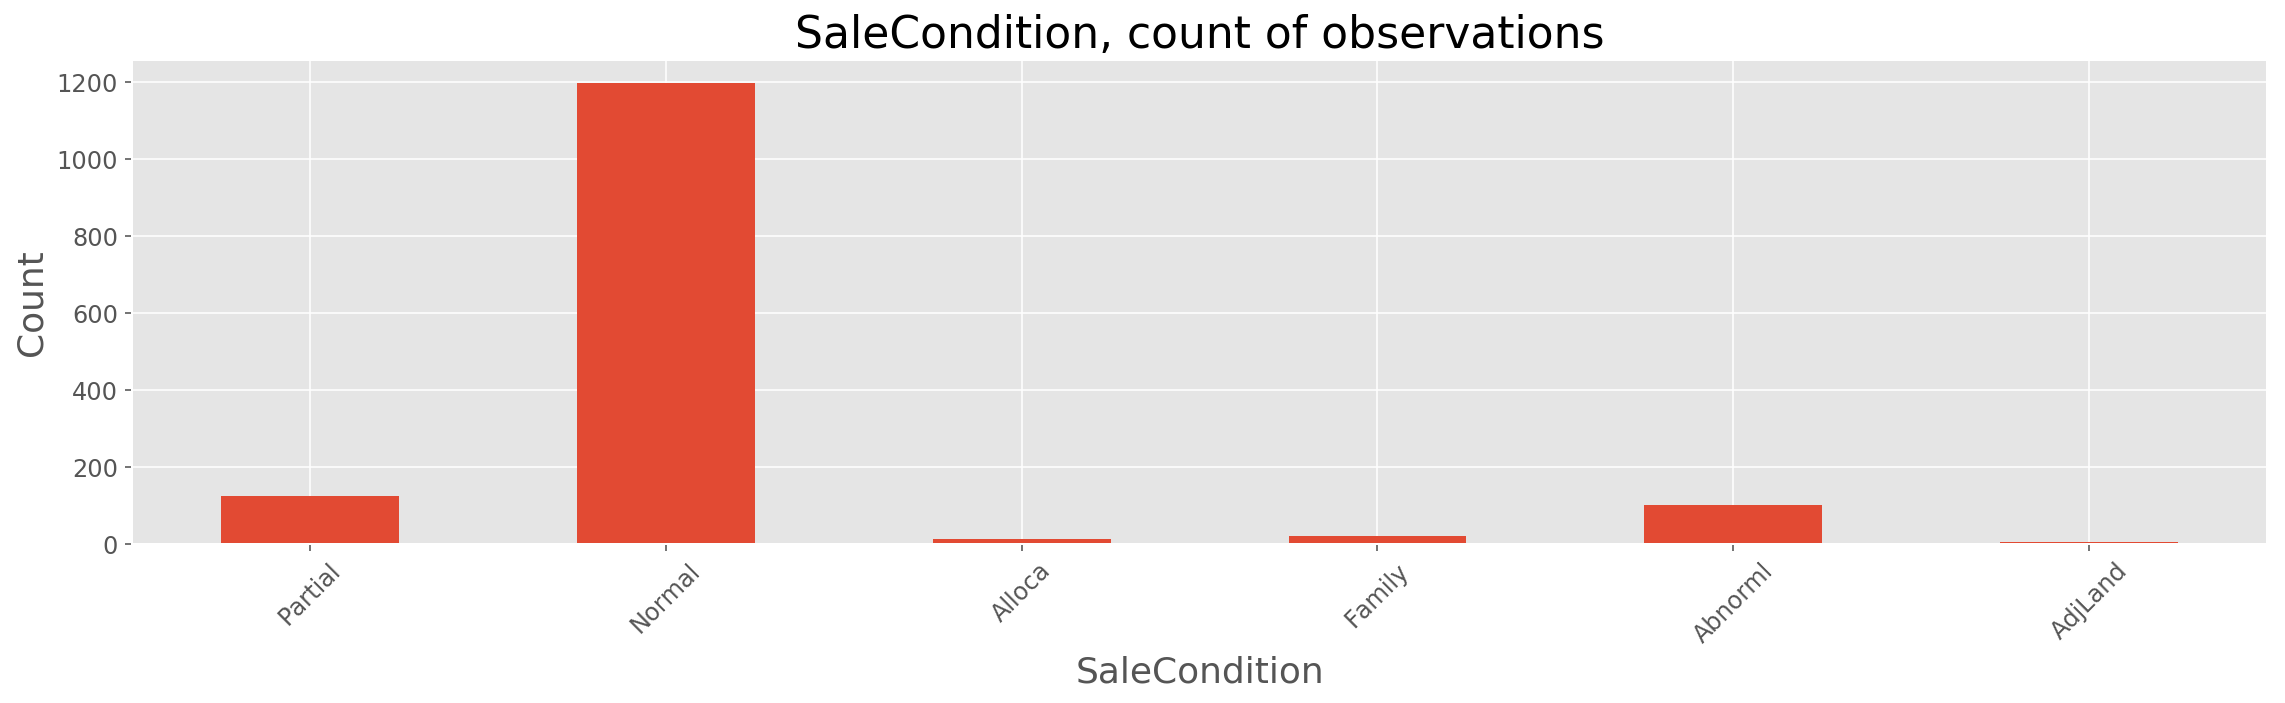

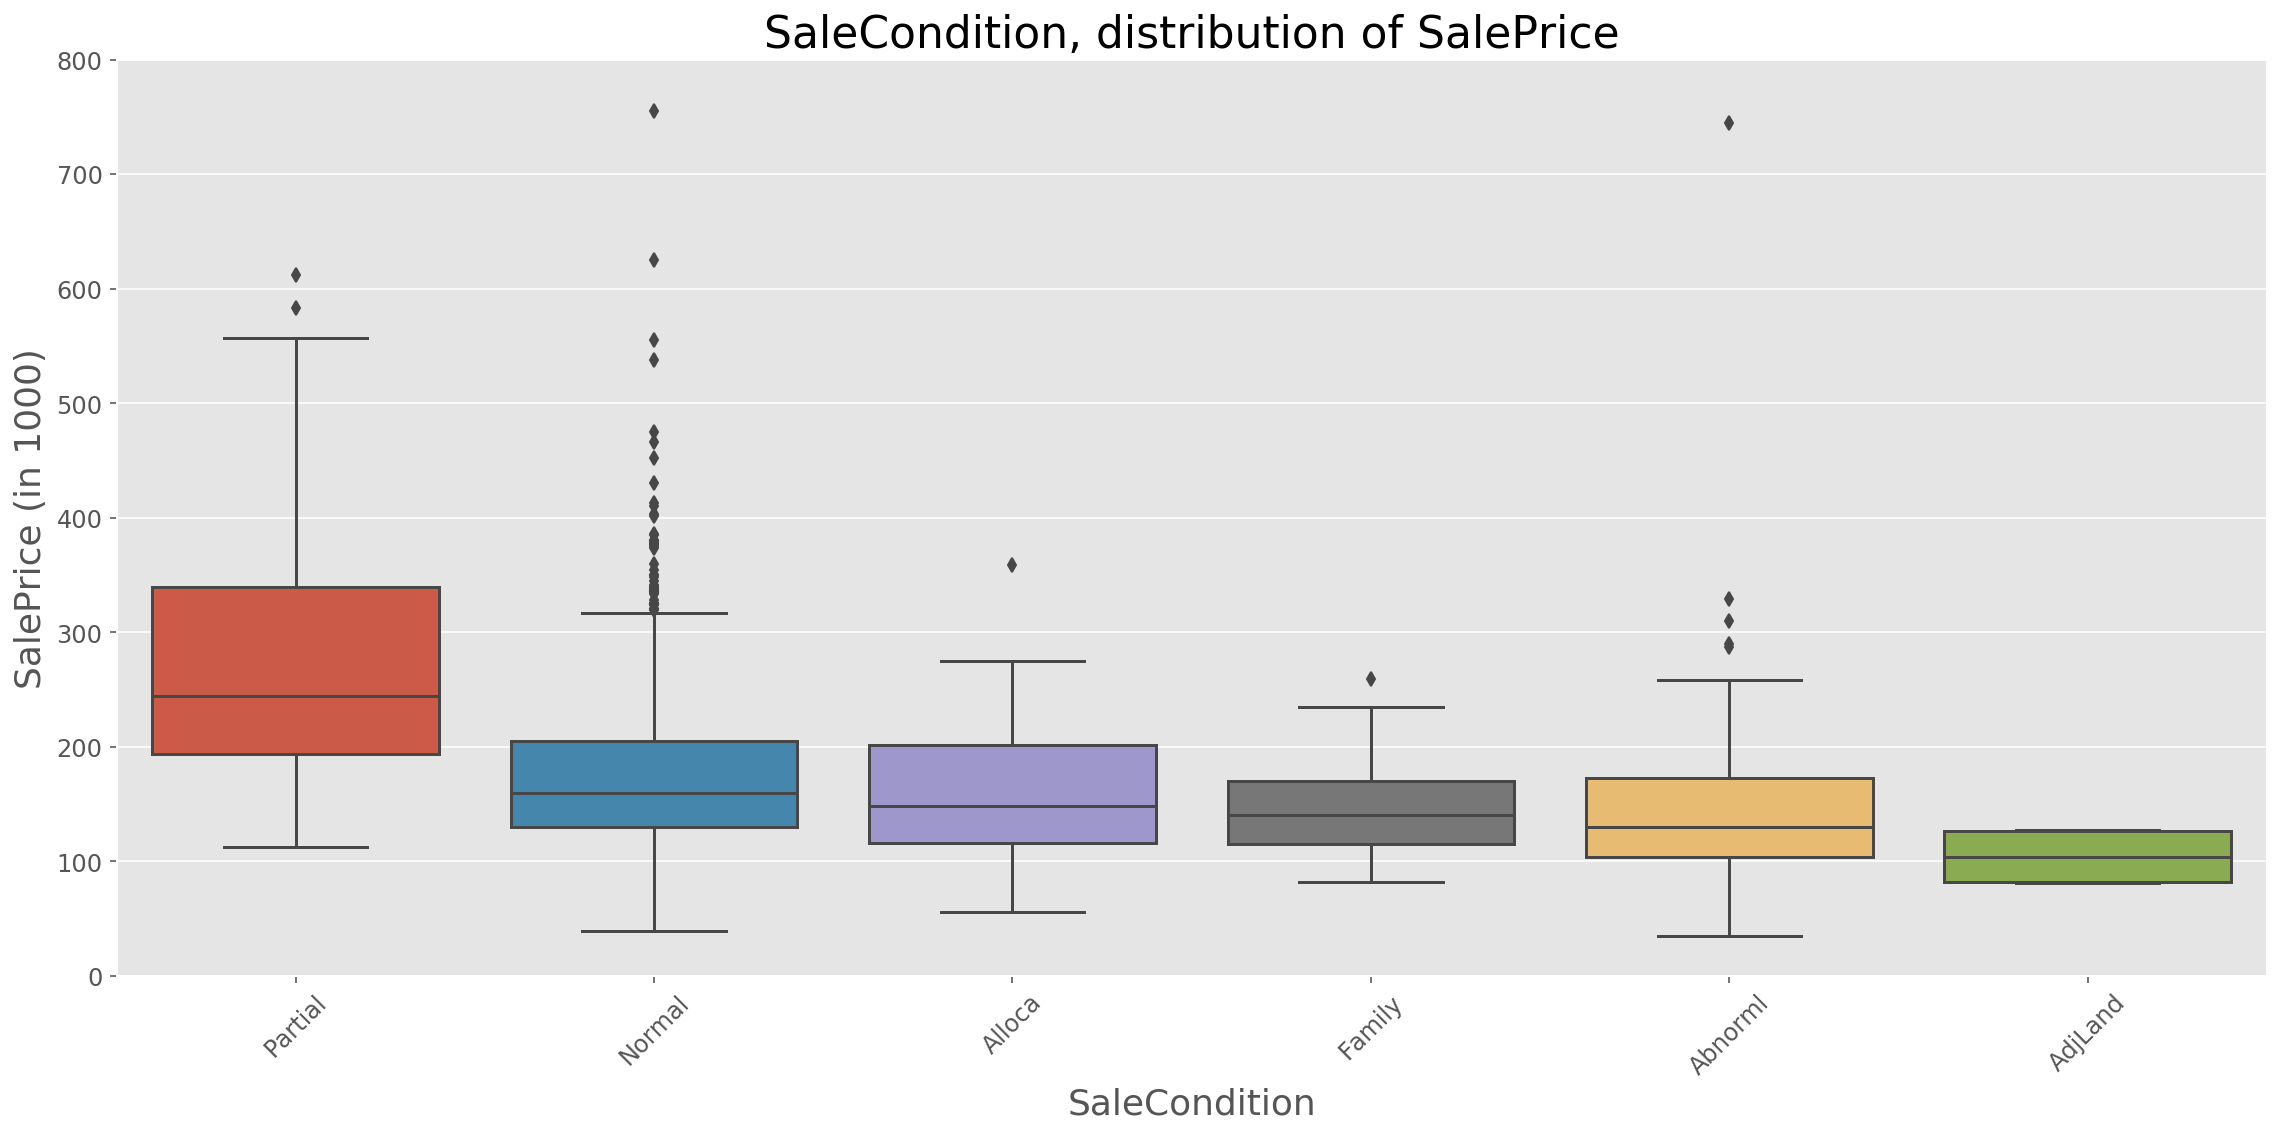

In [31]:
order = df.groupby("SaleCondition").SalePrice.mean().sort_values(ascending=False).index

plt.figure(figsize=(16,5));
df_g = df.groupby("SaleCondition").SalePrice.count().sort_values(ascending=False)
df_g = df_g.reindex(order)
df_g.plot(kind="bar")
plt.title("SaleCondition, count of observations")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,8));
ax = sns.boxplot(x="SaleCondition", y="SalePrice", data=df, order=order)
plt.axis(ymin=0, ymax=800000)
plt.title(f"SaleCondition, distribution of SalePrice")
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_1000))
plt.ylabel("SalePrice (in 1000)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Data cleaning and formatting

![](https://i.imgur.com/VV8pvil.jpg)
Photo by Oliver Hale

In this step we will:
    
- find and fix missing and/or wrong values
- set correct datatypes
- remove outliers

We start by **plotting all numeric features according to the current pandas dtypes.**

In [32]:
# start fresh with again reading in the data
df = pd.read_csv(f"{BASE_PATH}train.csv")
df_test = pd.read_csv(f"{BASE_PATH}test.csv")

# concat all samples to one dataframe for cleaning
# need to be careful not to leak data from test to training set! 
# e.g. by filling missing data with mean of *all* samples rather than training samples only
feat = pd.concat([df, df_test]).reset_index(drop=True).copy()

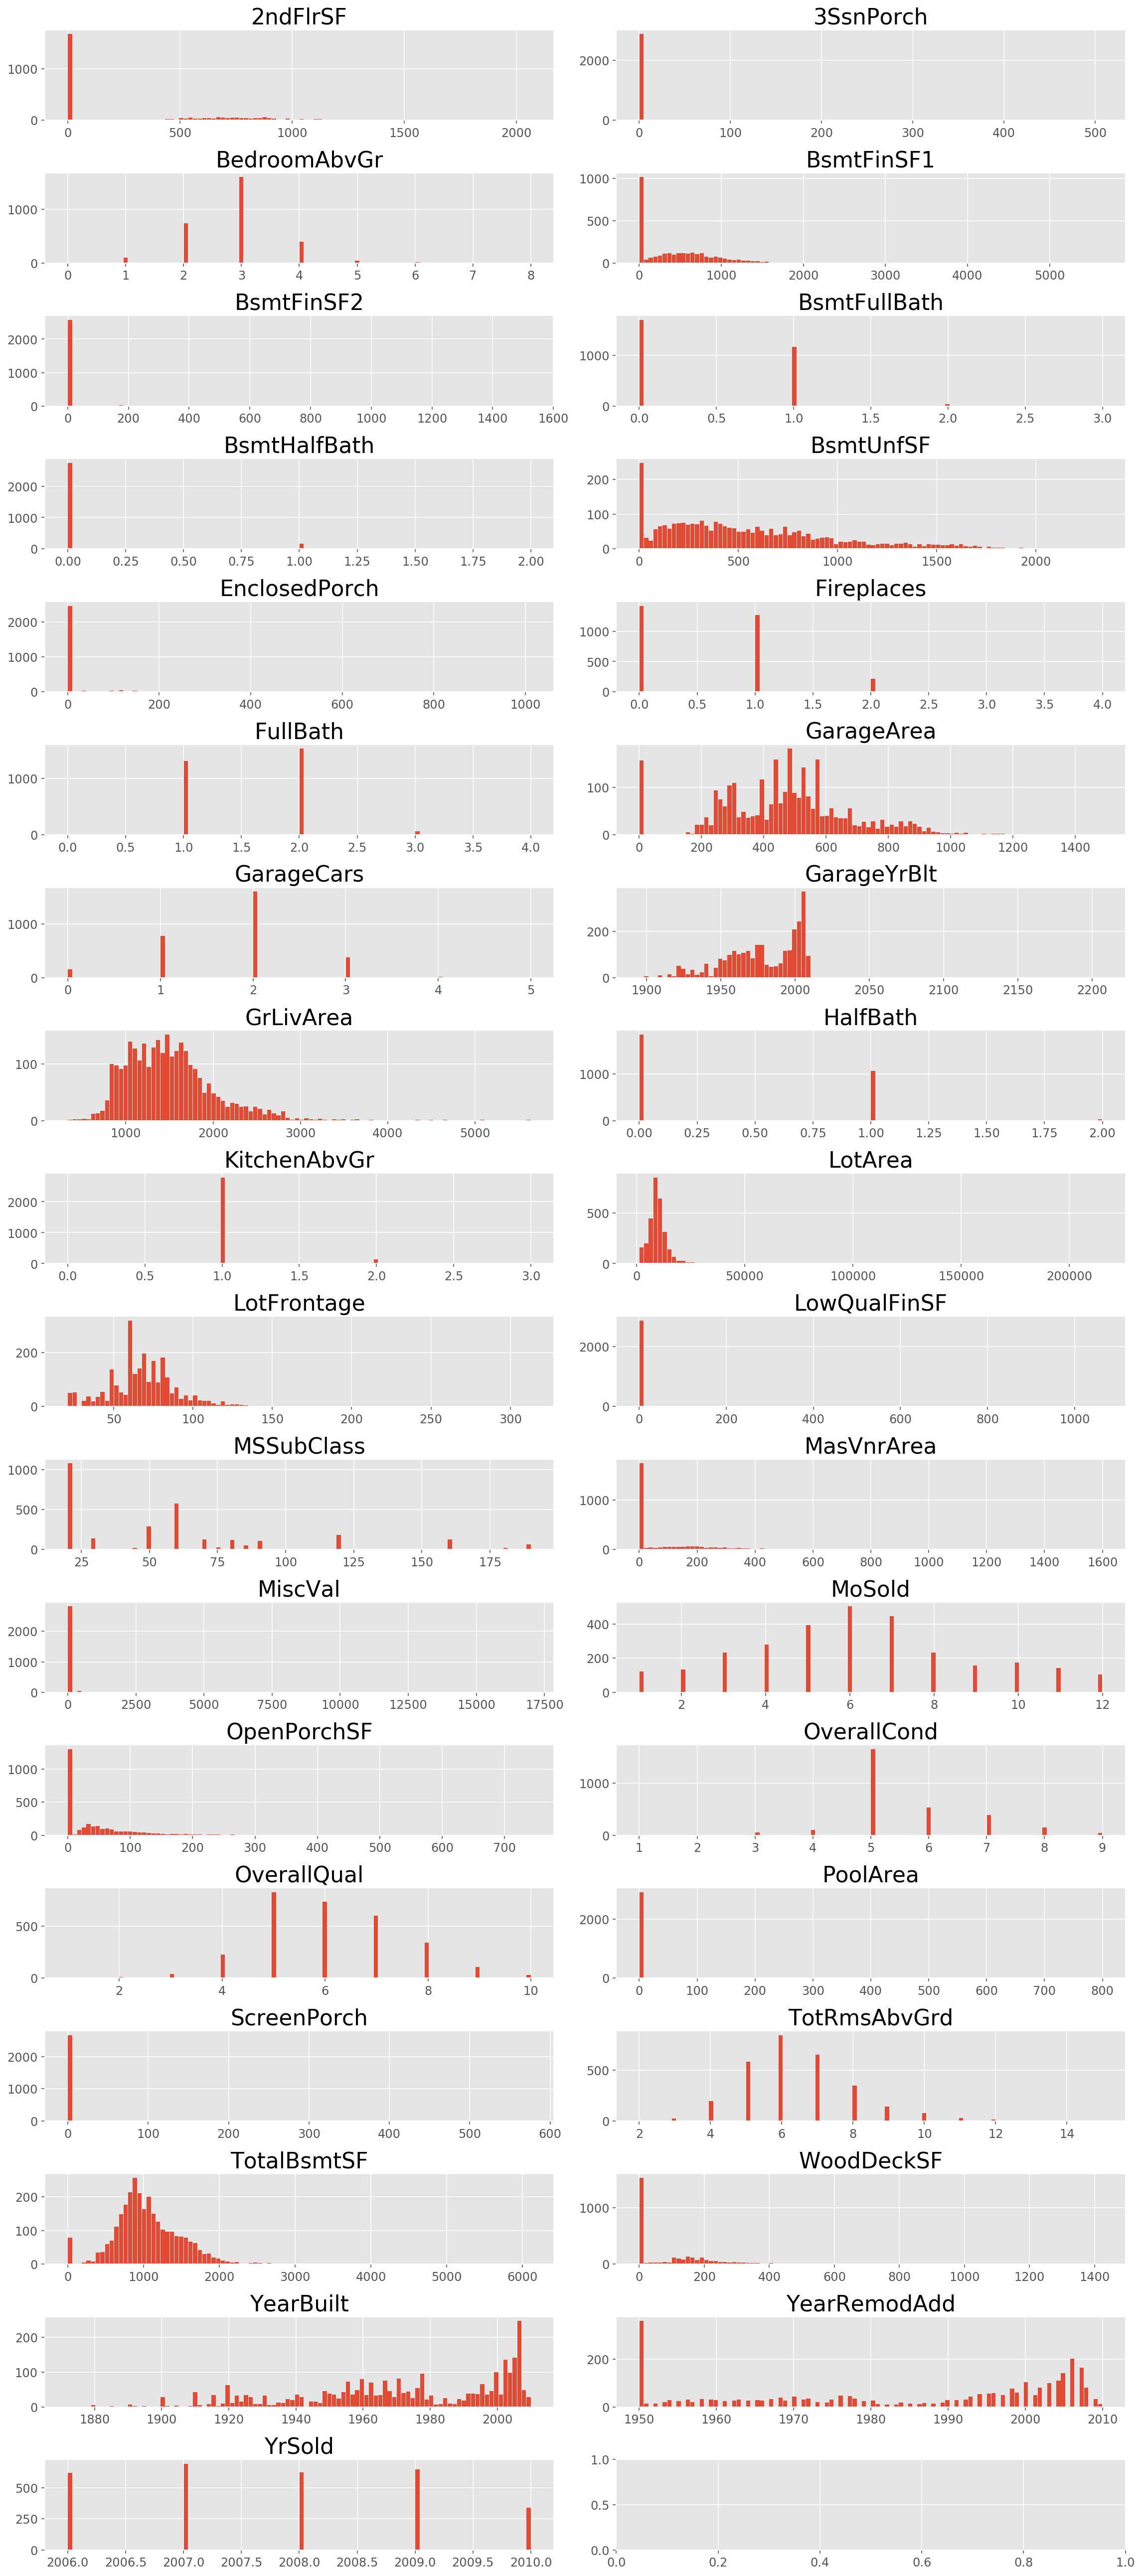

In [33]:
fig, axes = plt.subplots(nrows=18, ncols=2, figsize=(16,36))
num = feat.drop(["Id", "SalePrice"], axis=1).select_dtypes("number")

for idx, column in enumerate(num.columns[1:]):
    num[column].plot(kind="hist", bins=100, rwidth=.9, title=column, ax=axes[idx//2, idx%2])
    ax=axes[idx//2, idx%2].yaxis.label.set_visible(False)

plt.tight_layout()
plt.show()

We immediately notice that some features of `dtype == "number"` are categorical, many values are zeros and almost all value distributions seem skewed. From the initial `df.info()` we also can derive that there are float where ints should be. It's basically a mess.

Let's fix the features one by one.

In [34]:
# get columns with NaN values
missing = feat.columns[feat.isna().any()]
print(missing)

Index(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'PoolQC', 'SalePrice', 'SaleType', 'TotalBsmtSF',
       'Utilities'],
      dtype='object')


In [35]:
# fix missing values in features

# Alley: NA means no alley acces so we fill with string «None»
feat.Alley = feat.Alley.fillna("None")

# BsmtQual et al – NA for features means "no basement", filling with string "None"
bsmt_cols = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual']
for col in bsmt_cols:
    feat[col] = feat[col].fillna("None")

# Basement sizes: NaN likely means 0, can be set to int
for col in ['BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF']:
    feat[col] = feat[col].fillna(0).astype(int)
    
# Electrical: NA likely means unknown, filling with most frequent value SBrkr
feat.Electrical = feat.Electrical.fillna("SBrkr")

# Exterior1st: NA likely means unknown, filling with most frequent value VinylSd
feat.Exterior1st = feat.Exterior1st.fillna("VinylSd")

# Exterior2nd: NA likely means no 2nd material, filling with «None»
feat.Exterior2nd = feat.Exterior2nd.fillna("None")

# Fence: NA means «No Fence» filling with «None»
feat.Fence = feat.Fence.fillna("None")

# FireplaceQu: NA means «No Fireplace» filling with «None»
feat.FireplaceQu = feat.FireplaceQu.fillna("None")

# Functional: NA means «typical» filling with «Typ»
feat.Functional = feat.Functional.fillna("Typ")

# GarageType et al – NA means "no garage", filling with string "None"
grg_cols = ['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType']
for col in grg_cols:
    feat[col] = feat[col].fillna("None")

# Garage sizes: NaN means «no garage» == 0, unsure if build year should be 0?
for col in ['GarageArea', 'GarageCars', 'GarageYrBlt']:
    feat[col] = feat[col].fillna(0).astype(int)

# fix one outlier GarageYrBlt == 2207
to_fix = feat[feat.GarageYrBlt == 2207].index
feat.loc[to_fix, "GarageYrBlt"] = int(feat.GarageYrBlt.mean())
    
# KitchenQual: filling NaNs with most frequent value «Typical/Average» («TA»)
feat.KitchenQual = feat.KitchenQual.fillna("TA")

# LotFrontage can be set to integer, filling missing values with 0
feat.LotFrontage = feat.LotFrontage.fillna(0).astype(int)

# MSZoning filling NaNs with most frequent value «RL» (residental low density)
feat.MSZoning = feat.MSZoning.fillna("RL")

# MSSubClass is encoded numerical but actually categorical
feat.MSSubClass = feat.MSSubClass.astype(str)

# Masonry: NA very likely means no masonry so we fill with string «None» or 0 for size
feat.MasVnrType = feat.MasVnrType.fillna("None")
feat.MasVnrArea = feat.MasVnrArea.fillna(0).astype(int)

# MiscFeature means likely no feature, filling with None
feat.MiscFeature = feat.MiscFeature.fillna("None")

# PoolQC means likely no pool, filling with None
feat.PoolQC = feat.PoolQC.fillna("None")

# SaleType: NaNs likely mean unknown, filling with most frequent value «WD»
feat.SaleType = feat.SaleType.fillna("WD")

# Utilities: NaNs likely mean unknown, filling with most frequent value «AllPub»
feat.Utilities = feat.Utilities.fillna("AllPub")

In [36]:
# label encode ordinal features where there is order in categories
# unfortunately can't use LabelEncoder or pd.factorize() since strings do not contain order of values

feat = feat.replace({  "Alley":        {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond":     {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "BsmtExposure": {"None" : 0, "No" : 2, "Mn" : 2, "Av": 3, 
                                        "Gd" : 4},
                       "BsmtFinType1": {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2": {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual":     {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                       "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "Fence":        {"None" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, 
                                        "GdPrv" : 4},
                       "FireplaceQu":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, 
                                        "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, 
                                        "Typ" : 8},
                       "GarageCond":   {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageQual":   {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"None" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, 
                                        "Lvl" : 4},
                       "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, 
                                        "Reg" : 4},
                       "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC":       {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, 
                                        "Ex" : 4},
                       "Street":       {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, 
                                        "AllPub" : 4}}
                     )

feat.BsmtCond = feat.BsmtCond.astype(int)

In [37]:
# only one hot encode «true» categoricals...  
# ... rather than ordinals, where order matters and we already label encoded in the previous cells

def onehot_encode(data):
    df_numeric = data.select_dtypes(exclude=['object'])
    df_obj = data.select_dtypes(include=['object']).copy()

    cols = []
    for c in df_obj:
        dummies = pd.get_dummies(df_obj[c])
        dummies.columns = [c + "_" + str(x) for x in dummies.columns]
        cols.append(dummies)
    df_obj = pd.concat(cols, axis=1)

    data = pd.concat([df_numeric, df_obj], axis=1)
    data.reset_index(inplace=True, drop=True)
    return data

feat = onehot_encode(feat)

>We know that **many numerical distributions are skewed**. Several Kagglers have fixed this in various interesting ways. <span style="color:darkred">**I'm unsure if this really improves the models accuracy or even might be of disadvantage. I will skip this for now and try during model training.**

# 3. Feature engineering

![](https://i.imgur.com/DPq4YkX.jpg)
Photo by Patryk Gradys

Next step is to create new features by combining existing ones.

In [38]:
# map months to seasons: 0 == winter, 1 == spring etc.
seasons = {12 : 0, 1 : 0, 2 : 0, 
           3 : 1, 4 : 1, 5 : 1,
           6 : 2, 7 : 2, 8 : 2, 
           9 : 3, 10 : 3, 11 : 3}

feat["SeasonSold"]     = feat["MoSold"].map(seasons)
feat["YrActualAge"]    = feat["YrSold"] - feat["YearBuilt"]

feat['TotalSF1']       = feat['TotalBsmtSF'] + feat['1stFlrSF'] + feat['2ndFlrSF']
feat['TotalSF2']       = (feat['BsmtFinSF1'] + feat['BsmtFinSF2'] + feat['1stFlrSF'] + feat['2ndFlrSF'])
feat["AllSF"]          = feat["GrLivArea"] + feat["TotalBsmtSF"]
feat["AllFlrsSF"]      = feat["1stFlrSF"] + feat["2ndFlrSF"]
feat["AllPorchSF"]     = feat["OpenPorchSF"] + feat["EnclosedPorch"] + feat["3SsnPorch"] + feat["ScreenPorch"]

feat['TotalBath']      = 2 * (feat['FullBath'] + (0.5 * feat['HalfBath']) + feat['BsmtFullBath'] + (0.5 * feat['BsmtHalfBath']))
feat["TotalBath"]      = feat["TotalBath"].astype(int)
feat['TotalPorch']     = (feat['OpenPorchSF'] + feat['3SsnPorch'] + feat['EnclosedPorch'] + feat['ScreenPorch'] + feat['WoodDeckSF'])
feat["OverallScore"]   = feat["OverallQual"] * feat["OverallCond"]
feat["GarageScore"]    = feat["GarageQual"] * feat["GarageCond"]
feat["ExterScore"]     = feat["ExterQual"] * feat["ExterCond"]
feat["KitchenScore"]   = feat["KitchenAbvGr"] * feat["KitchenQual"]
feat["FireplaceScore"] = feat["Fireplaces"] * feat["FireplaceQu"]
feat["GarageScore"]    = feat["GarageArea"] * feat["GarageQual"]
feat["PoolScore"]      = feat["PoolArea"] * feat["PoolQC"]

feat['hasPool']        = feat['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
feat['has2ndFloor']    = feat['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
feat['hasGarage']      = feat['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
feat['hasBsmt']        = feat['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
feat['hasFireplace']   = feat['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [39]:
# create new ordinal features by binning continuous features
# log transform values before binning taking into account skewed distributions

cut_cols = ["LotArea", "YearBuilt", "YearRemodAdd", "MasVnrArea", 'BsmtFinSF1',
            'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
            'LowQualFinSF', 'GrLivArea', "GarageYrBlt", 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
frames = []
for cut_col in cut_cols:
    tmp = pd.DataFrame(pd.cut(np.log1p(feat[cut_col]), bins=10, labels=np.arange(0,10)))
    tmp.columns = [cut_col + "_binned"]
    frames.append(tmp)
    
binned = pd.concat(frames, axis=1).astype(int)
feat = pd.concat([feat, binned], axis=1)

# 4. Try out and compare various classifiers

![](https://i.imgur.com/JRhGeDh.jpg)
Photo by Pedro de Sousa

In [40]:
df = pd.read_csv(f"{BASE_PATH}train.csv")
df_test = pd.read_csv(f"{BASE_PATH}test.csv")

dtrain = feat[feat.SalePrice.notnull()].copy()
dtest  = feat[feat.SalePrice.isnull()].copy()
dtest  = dtest.drop("SalePrice", axis=1).reset_index(drop=True)
print(f"Raw data shape   : {df.shape}  {df_test.shape}")
print(f"Clean data shape : {dtrain.shape} {dtest.shape}")

Raw data shape   : (1460, 81)  (1459, 80)
Clean data shape : (1460, 272) (1459, 271)


<font color="purple"> 
## 🤖 Experiment 0: Get a baseline with the DummyRegressor

To get a baseline for all other experiments, we setup a dummy regressor, that simply «predicts» a constant that we define, e.g. the median of all the sale price values in our training data.

In [41]:
X = df
y = df.SalePrice
metric = 'neg_mean_squared_log_error'
clf = DummyRegressor("median")
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")

0.3989 Log Error


Always predicting the median of SalePrice with **the Dummy regressor gets us something like rank #4160 of around 4500 submissions** (at time of writing). This btw. is very close to the sample submission benchmark.

<font color="purple"> 
## 🤖 Experiment 01: Training with just one feature

Let's see how far we get with **just one single feature and simple Linear Regression.** I choose the size of the living area `GrLivArea` because we have seen during EDA that this has a strong correlation to `SalePrice`.

In [42]:
X = df[["GrLivArea"]]
y = df.SalePrice
metric = 'neg_mean_squared_log_error'
clf = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")

0.2750 Log Error


Cool. Much better. Already sth. **around rank #4000 on the Leaderboard with just one feature!** 

Let's try a categorical instead.

In [43]:
X = df[["OverallCond"]]
y = df.SalePrice
metric = 'neg_mean_squared_log_error'
clf = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")

0.4064 Log Error


Less good. How about `OverallQual`?

In [44]:
try:
    X = df[["OverallQual"]]
    y = df.SalePrice
    metric = 'neg_mean_squared_log_error'
    clf = LinearRegression()
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")
except Exception as e:
    print("Oh no... An error has occured...")
    print(e)

Oh no... An error has occured...
Mean Squared Logarithmic Error cannot be used when targets contain negative values.


Oops... What's happening here? 

**The Linear Regressor predicts negative values for SalePrice** and that crashes crossvalidation scoring with our metric (R2 scores would be working). 

But why negative values at all? Let's dig deeper by visualizing the relationship between the two variables and getting a regression line with seaborn's `regplot`.

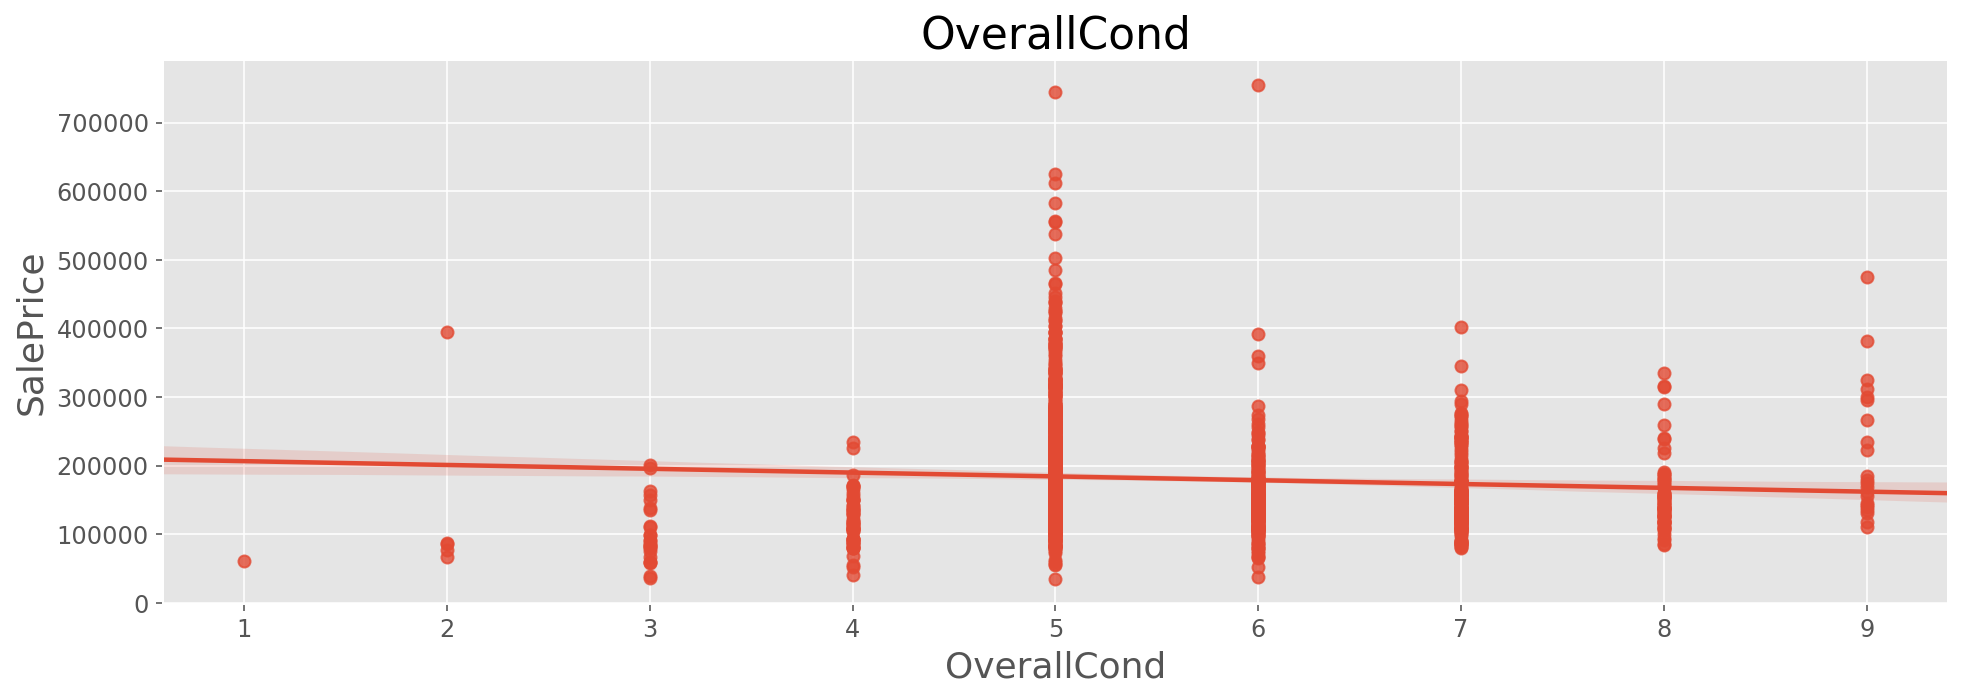

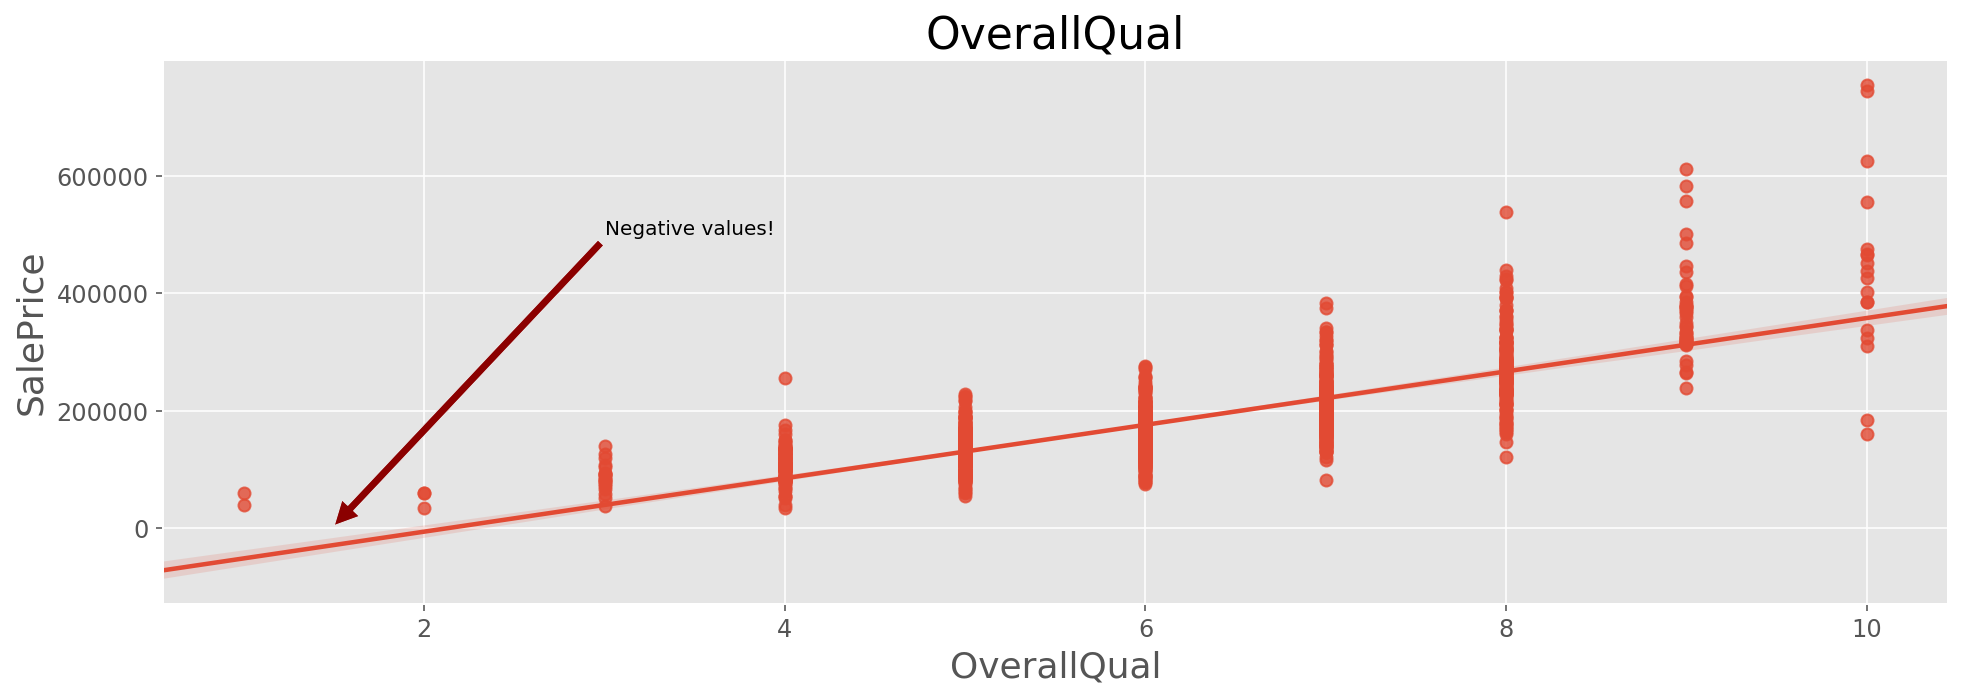

In [45]:
feature = "OverallCond"
plt.figure(figsize=(16,5))
sns.regplot(x=feature, y="SalePrice", data=df)
plt.title(f"{feature}")
plt.show()

feature = "OverallQual"
plt.figure(figsize=(16,5))
ax = sns.regplot(x=feature, y="SalePrice", data=df)
plt.title(f"{feature}")
ax.annotate('Negative values!', xy=(1.5, 5_000), xytext=(3, 500_000), 
            arrowprops=dict(facecolor='darkred'))
plt.show()

We observe two things:

- OverallQual indeed will predict negative sale prices if OverallQual is 2 or less («poor» or «very poor»). 
- OverallCond has a negative trendline. The higher the condition the less is the predicted sales price. Seems wrong too. 

Let's fix this by removing samples with these low values for quality and condition.

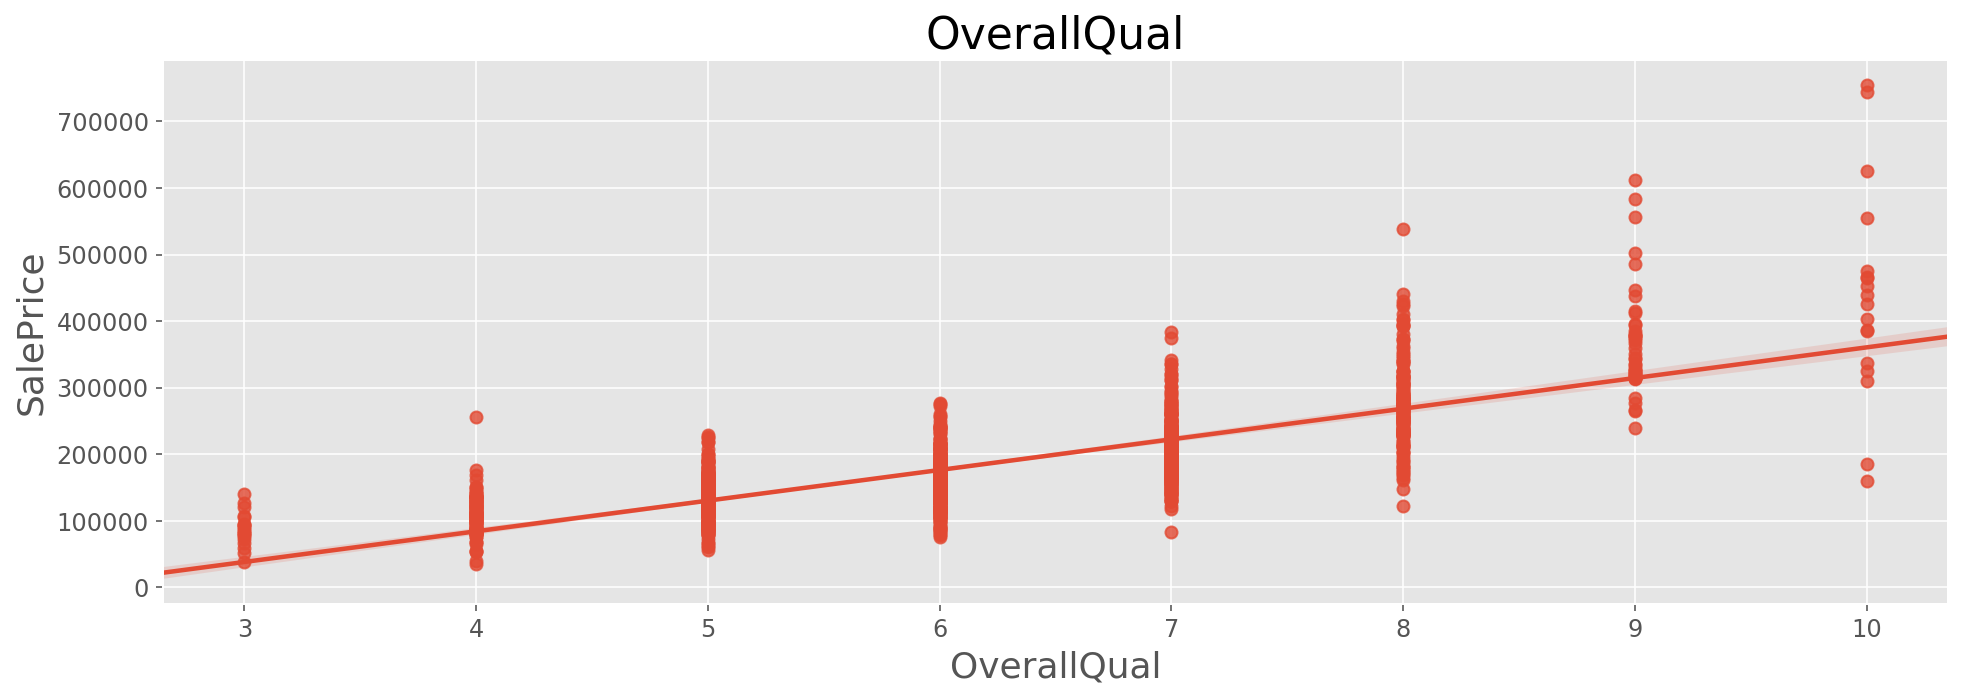

In [46]:
feature = "OverallQual"
plt.figure(figsize=(16,5))
sns.regplot(x=feature, y="SalePrice", data=df[df[feature] >= 3])
plt.title(f"{feature}")
plt.show()

Problem fixed. **Take away: Visualizing the data is almost always superhelpful...**

Now we try again with our metric.

In [47]:
X = df[df.OverallQual >= 3][["OverallQual"]]
y = df[df.OverallQual >= 3].SalePrice
metric = 'neg_mean_squared_log_error'
clf = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")

0.2641 Log Error


Hilarious. Just one single categorical yields a not-so-bad result. And an even better one than what we got from continuous `GrLivArea`.

<font color="purple"> 
## 🤖 Experiment 02: Training with only categorical or numerical raw data

Let's see how far we get with **just categorical or just numerical features.** We will automate our data cleaning with a pipeline.

In [48]:
# we select all the categorical data for crossvalidation
X = df.select_dtypes("object")
y = df.SalePrice
metric = 'neg_mean_squared_log_error'

# use make_pipeline to automatically fill missing values and one hot encode
clf = make_pipeline(SimpleImputer(strategy='most_frequent', fill_value='missing'), 
                    OneHotEncoder(handle_unknown="ignore"), LinearRegression())
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")

0.2414 Log Error


**Progress!** Let's try just all the categoricals instead.

In [49]:
# again fix OverallQual in order to not crash crossvalidation with our metric
df_fixed = df[df.OverallQual >= 3]

# we select all the numerical data for crossvalidation
X = df_fixed.select_dtypes("number").drop(["SalePrice"], axis=1)
y = df_fixed.SalePrice
metric = 'neg_mean_squared_log_error'
clf = make_pipeline(SimpleImputer(), StandardScaler(), LinearRegression())
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")

0.1801 Log Error


**Even more improvement. Just training on the raw numerical values gets us around #3600 on the Leaderboard.**

<font color="purple"> 
## 🤖 Experiment 03: Un-sk(r)ew the distribution of SalePrice

How about log transforming the skewed distribution of `SalePrice`? Will we get a better score?

In [50]:
X = df.select_dtypes("number").drop(["SalePrice"], axis=1)

# log transform SalePrice to fix skewed distribution
# we also now can skip removing the samples with OverallQual < 3
y = np.log1p(df.SalePrice)
metric = 'neg_mean_squared_error'

clf = make_pipeline(SimpleImputer(), StandardScaler(), LinearRegression())
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
print(f"{np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f} Log Error")

0.1534 Log Error


Oh yes. Great step forward. Just **log transforming y gets us to rank #3000.** 

<font color="purple"> 
## 🤖 Experiment 04: Finally using cleaned data and trying other classifiers

How about our **cleaned data** and **some other classifiers**?

In [51]:
classifiers = [
               Ridge(), 
               Lasso(), 
               ElasticNet(),
               KernelRidge(),
               SVR(),
               RandomForestRegressor(),
               GradientBoostingRegressor(),
               lgb.LGBMRegressor(),
               xgb.XGBRegressor(objective="reg:squarederror"),
]

clf_names = [
            "ridge      ",
            "lasso      ",
            "elastic    ",
            "kernlrdg   ",
            "svr        ",
            "rndmforest ", 
            "gbm        ", 
            "lgbm       ", 
            "xgboost    ",
]

In [52]:
X = dtrain.drop(["SalePrice"], axis=1)
y = np.log1p(dtrain.SalePrice)
metric = 'neg_mean_squared_error'

for clf_name, clf in zip(clf_names, classifiers):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    print(f"{clf_name} {np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f}")

ridge       0.1347
lasso       0.1947
elastic     0.1777
kernlrdg    0.1349
svr         0.3993
rndmforest  0.1462
gbm         0.1251
lgbm        0.1325
xgboost     0.1267


We are definitely on track. **Scores of less than 0.13 (GBM, XGBoost) should pull us close toward a rank in the top third of the leaderboard.**

<font color="purple"> 
## 🤖 Experiment 05: Removing the outliers we were warned about...

Remember the outliers Dean De Cock warned us about? Removing these now...

In [53]:
X = dtrain[dtrain.GrLivArea < 4000].drop(["SalePrice"], axis=1)
y = np.log1p(dtrain[dtrain.GrLivArea < 4000].SalePrice)
metric = 'neg_mean_squared_error'

for clf_name, clf in zip(clf_names, classifiers):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    print(f"{clf_name} {np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f}")

ridge       0.1177
lasso       0.1668
elastic     0.1500
kernlrdg    0.1179
svr         0.3960
rndmforest  0.1410
gbm         0.1199
lgbm        0.1256
xgboost     0.1199


Amazing!! Just removing 4 observations yields much better results for almost all classifiers. We are now ready to choose the classifiers, tune hyperparameters and make a submission. 

Before that let's conduct a last experiment and **find out, what the classifiers like about our data...**

<font color="purple"> 
## 🤖 Experiment 06: Use PCA to reduce collinearity?

Fellow Kaggler [massquantity suggests here](https://www.kaggle.com/massquantity/all-you-need-is-pca-lb-0-11421-top-4#Ensemble-Methods) that we can reduce the collinearity that we have in the data and even might have increased with feature engineering by applying PCA to the whole data set. I think it's a cool idea worth persuing. 

Let's try to quickly validate this with our data (which is significantly different from his in terms of feature cleaning and engineering).

In [54]:
X = dtrain[dtrain.GrLivArea < 4000].drop(["SalePrice"], axis=1)
# we carefully reduce dimensionality from 271 features to 250 dimensions
pca = PCA(n_components=250)
X_pca = pca.fit_transform(X)
y = np.log1p(dtrain[dtrain.GrLivArea < 4000].SalePrice)
metric = 'neg_mean_squared_error'

for clf_name, clf in zip(clf_names, classifiers):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    print(f"{clf_name} {np.sqrt(-cross_val_score(clf, X_pca, y, cv=kfold, scoring=metric)).mean():.4f}")

ridge       0.1177
lasso       0.1739
elastic     0.1593
kernlrdg    16.3512
svr         0.3960
rndmforest  0.1894
gbm         0.1440
lgbm        0.1514
xgboost     0.1485


So at first glance this doesn't work here. **Did you have more sucess with PCA? Happy to hear your thoughts in the comments...**

<font color="purple"> 
## 🤖 Experiment 07: Use boxcox transform numerical features to improve score?

Several [Kagglers](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard) **apply a [box cox transformation](http://onlinestatbook.com/2/transformations/box-cox.html) to skewed numerical features**. Cool idea worth persuing too. 

Let's quickly validate this with our data.

In [55]:
X = dtrain[dtrain.GrLivArea < 4000].drop(["SalePrice"], axis=1).copy()

sk = pd.DataFrame(X.iloc[:, :60].skew(), columns=["skewness"])
sk = sk[sk.skewness > .75]
for feature_ in sk.index:
    X[feature_] = boxcox1p(X[feature_], 0.15)

y = np.log1p(dtrain[dtrain.GrLivArea < 4000].SalePrice)
metric = 'neg_mean_squared_error'

for clf_name, clf in zip(clf_names, classifiers):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    print(f"{clf_name} {np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f}")

ridge       0.1168
lasso       0.1684
elastic     0.1519
kernlrdg    0.1169
svr         0.3960
rndmforest  0.1414
gbm         0.1197
lgbm        0.1256
xgboost     0.1199


The box cox transformation seems to improve our models only slightly and only for some of the classifiers.

<font color="purple"> 
## Experiment 08: Which features do the classifiers pick up?

What features are relevant for the classifiers? Was feature engineering worth our while?

We'll get the feature importance of XGBoost as an example.

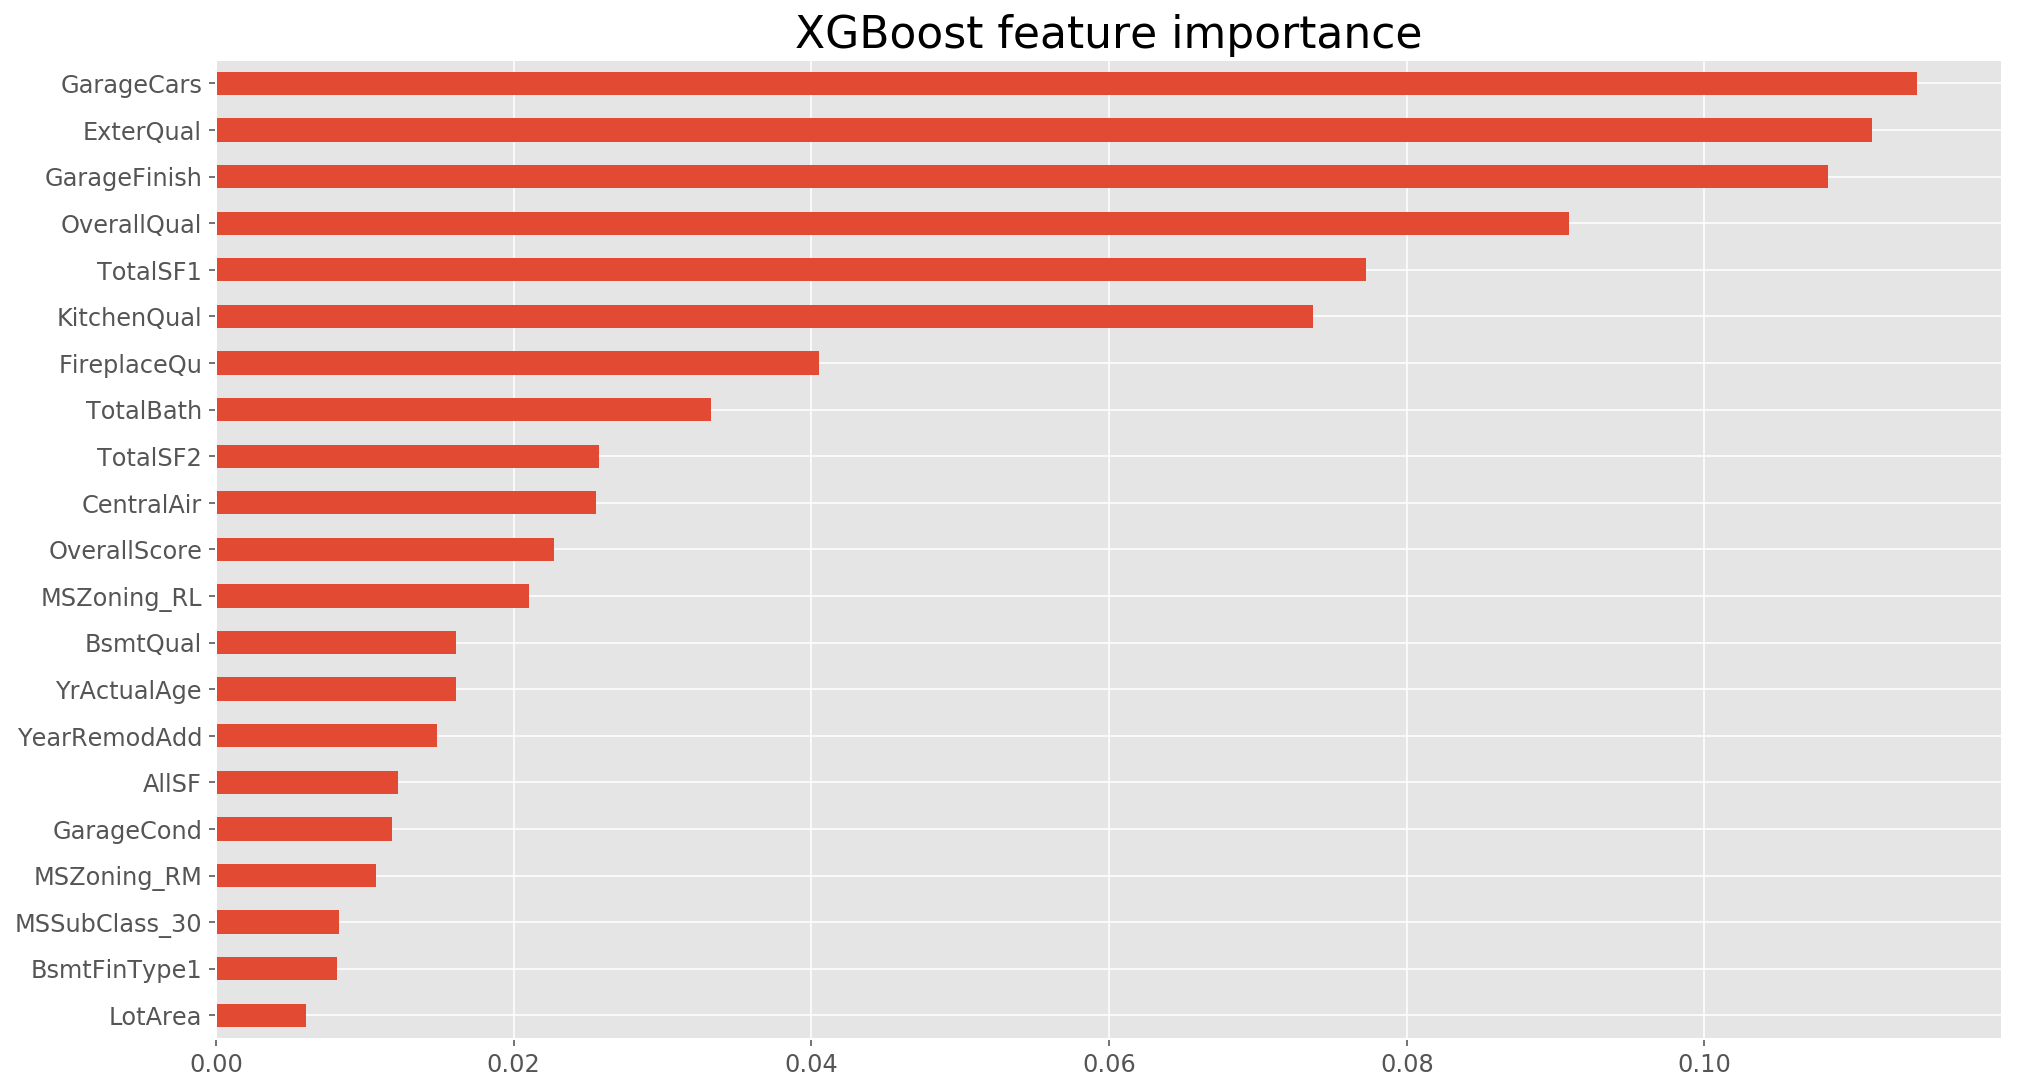

In [56]:
X = dtrain[dtrain.GrLivArea < 4000].drop(["SalePrice"], axis=1).copy()
y = np.log1p(dtrain[dtrain.GrLivArea < 4000].SalePrice)

# again we apply the boxcox transformation
sk = pd.DataFrame(X.iloc[:, :60].skew(), columns=["skewness"])
sk = sk[sk.skewness > .75]
for feature_ in sk.index:
    X[feature_] = boxcox1p(X[feature_], 0.15)

clf = xgb.XGBRegressor(objective="reg:squarederror", n_jobs=-1)
coeffs = clf.fit(X, y).feature_importances_
df_co = pd.DataFrame(coeffs, columns=["importance_"])
df_co.index = X.columns
df_co.sort_values("importance_", ascending=True, inplace=True)

plt.figure(figsize=(16,9))
df_co.iloc[250:, :].importance_.plot(kind="barh")
plt.title(f"XGBoost feature importance")
plt.show()

Top correlated features like GarageCars, OverallQual are still very informative to the algorithm. Some of our engineered features like `TotalSF(1,2)`, `TotalBath` and `OverallScore` rank very high too. 

It seems that feature engineering was effective, at least inasmuch some created featured rank among the relevant ones.

<font color="purple"> 
## Experiment 09: Do our predictions actually make any sense at all?

Now we'll look at the predictions in detail.

In [57]:
# use only the most promising classifiers
classifiers = [
               Ridge(), 
               Lasso(), 
               ElasticNet(),
               KernelRidge(),
               GradientBoostingRegressor(),
               lgb.LGBMRegressor(),
               xgb.XGBRegressor(objective="reg:squarederror"),
]

clf_names = [
            "ridge      ",
            "lasso      ",
            "elastic    ",
            "kernlrdg   ",
            "gbm        ", 
            "lgbm       ", 
            "xgboost    ",
]

In [58]:
X = dtrain[dtrain.GrLivArea < 4000].drop(["SalePrice"], axis=1).copy()
y = np.log1p(dtrain[dtrain.GrLivArea < 4000].SalePrice)
X_test = dtest.copy()

sk = pd.DataFrame(X.iloc[:, :60].skew(), columns=["skewness"])
sk = sk[sk.skewness > .75]
for feature_ in sk.index:
    X[feature_] = boxcox1p(X[feature_], 0.15)
    X_test[feature_] = boxcox1p(X_test[feature_], 0.15)

In [59]:
# for clf_name, clf in zip(clf_names, classifiers):
#     kfold = KFold(n_splits=5, shuffle=True, random_state=1)
#     print(f"{clf_name} {np.sqrt(-cross_val_score(clf, X, y, cv=kfold, scoring=metric)).mean():.4f}")

In [60]:
predictions = []

for clf_name, clf in zip(clf_names, classifiers):
    clf.fit(X, y)
    preds = clf.predict(X_test)
    # reverse log transform predicted sale prices with np.expm1()
    predictions.append(np.expm1(preds))

We again have a look at the basic statistics of sales prices in our training data in order to compare these to stats of predicted values. 

We have a mean of 180k, a minimum of around 35k and a maximum sale price of 755k.

In [61]:
print(df.SalePrice.describe())

count     1460.00000
mean    180921.19589
std      79442.50288
min      34900.00000
25%     129975.00000
50%     163000.00000
75%     214000.00000
max     755000.00000
Name: SalePrice, dtype: float64


Let's compare this to the predicted values.

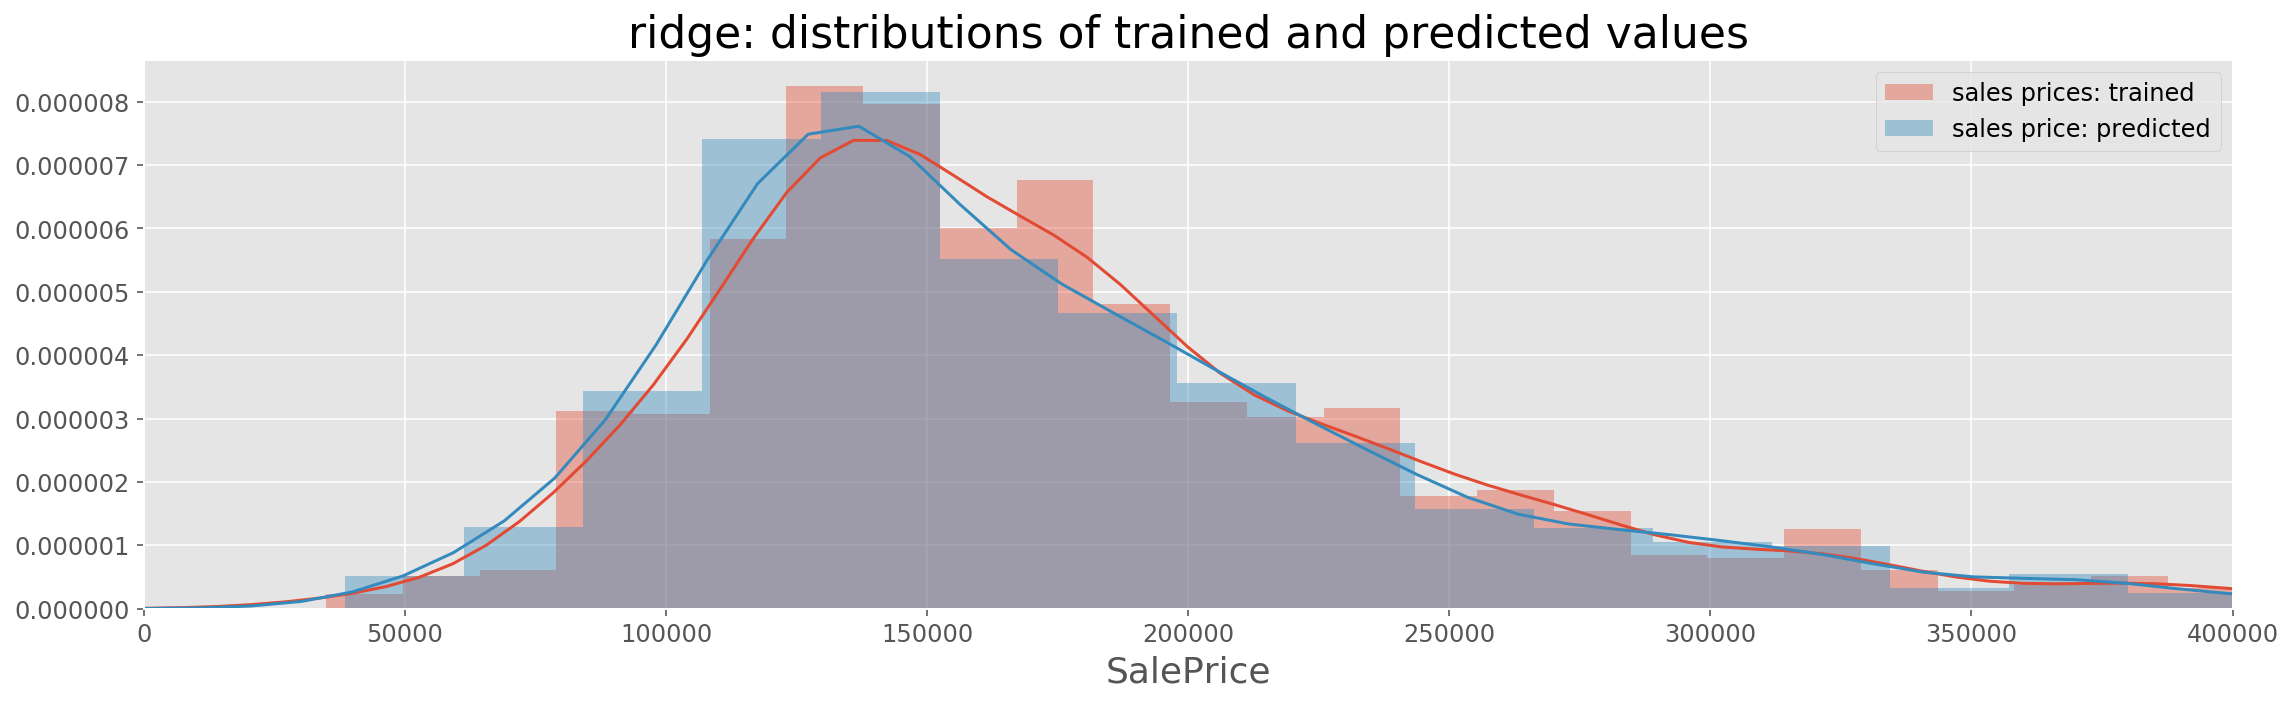

ridge min/max of predicted sales prices
38563 1176739


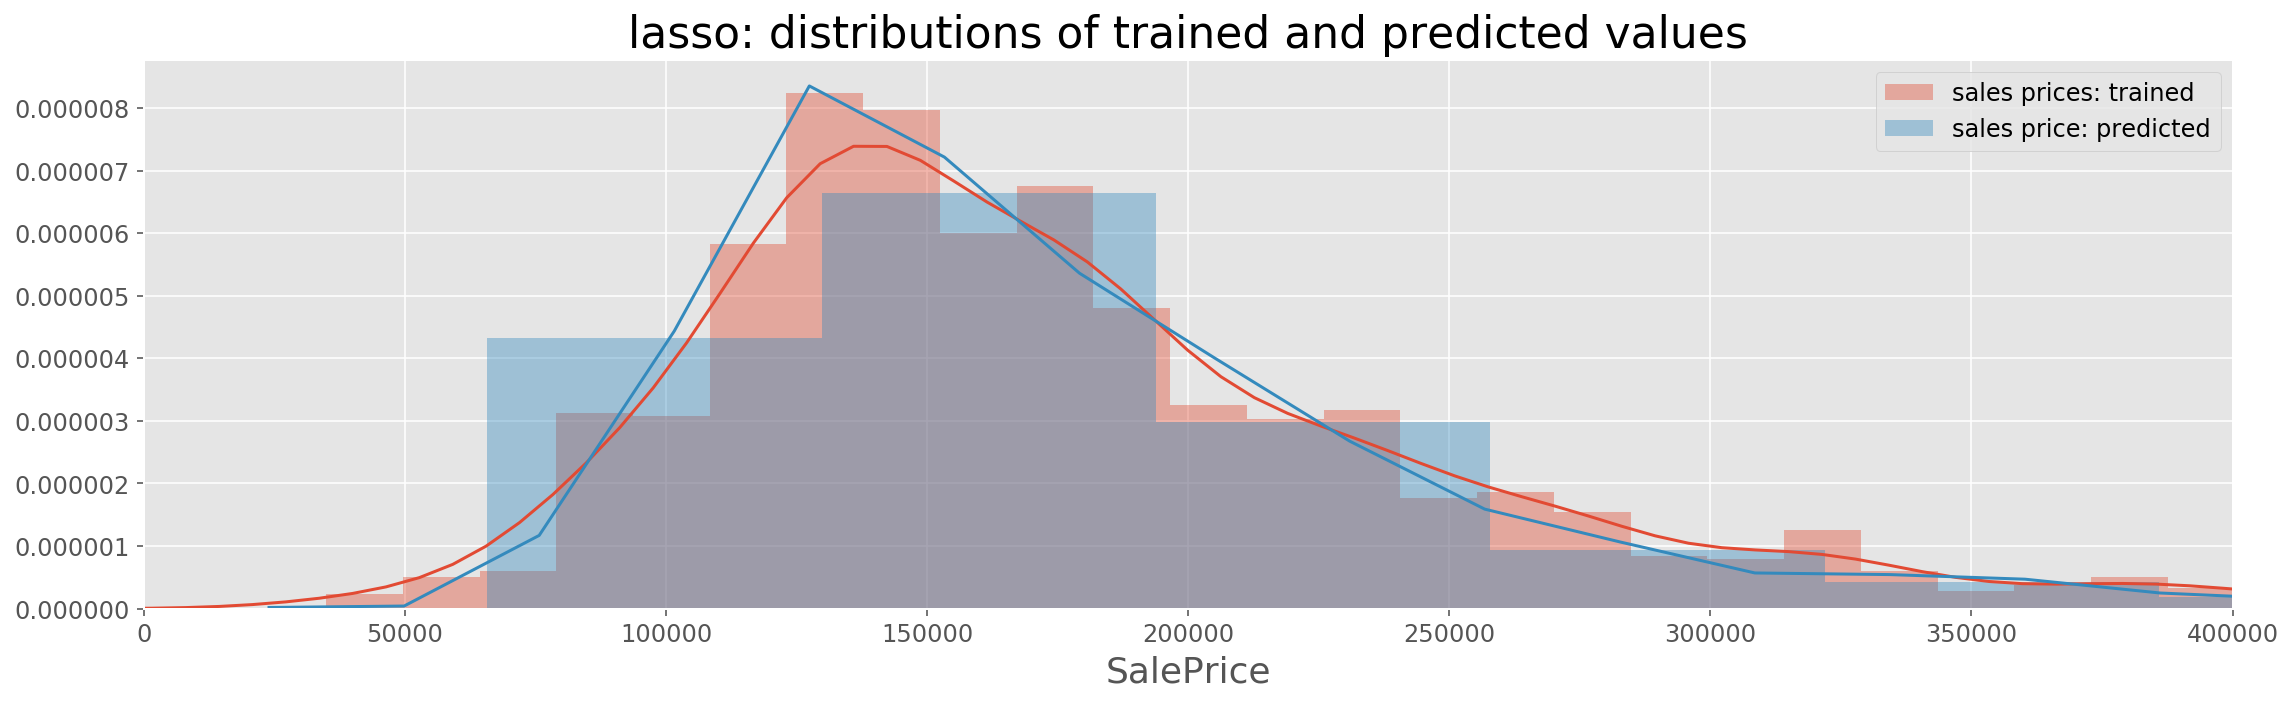

lasso min/max of predicted sales prices
65791 3267232


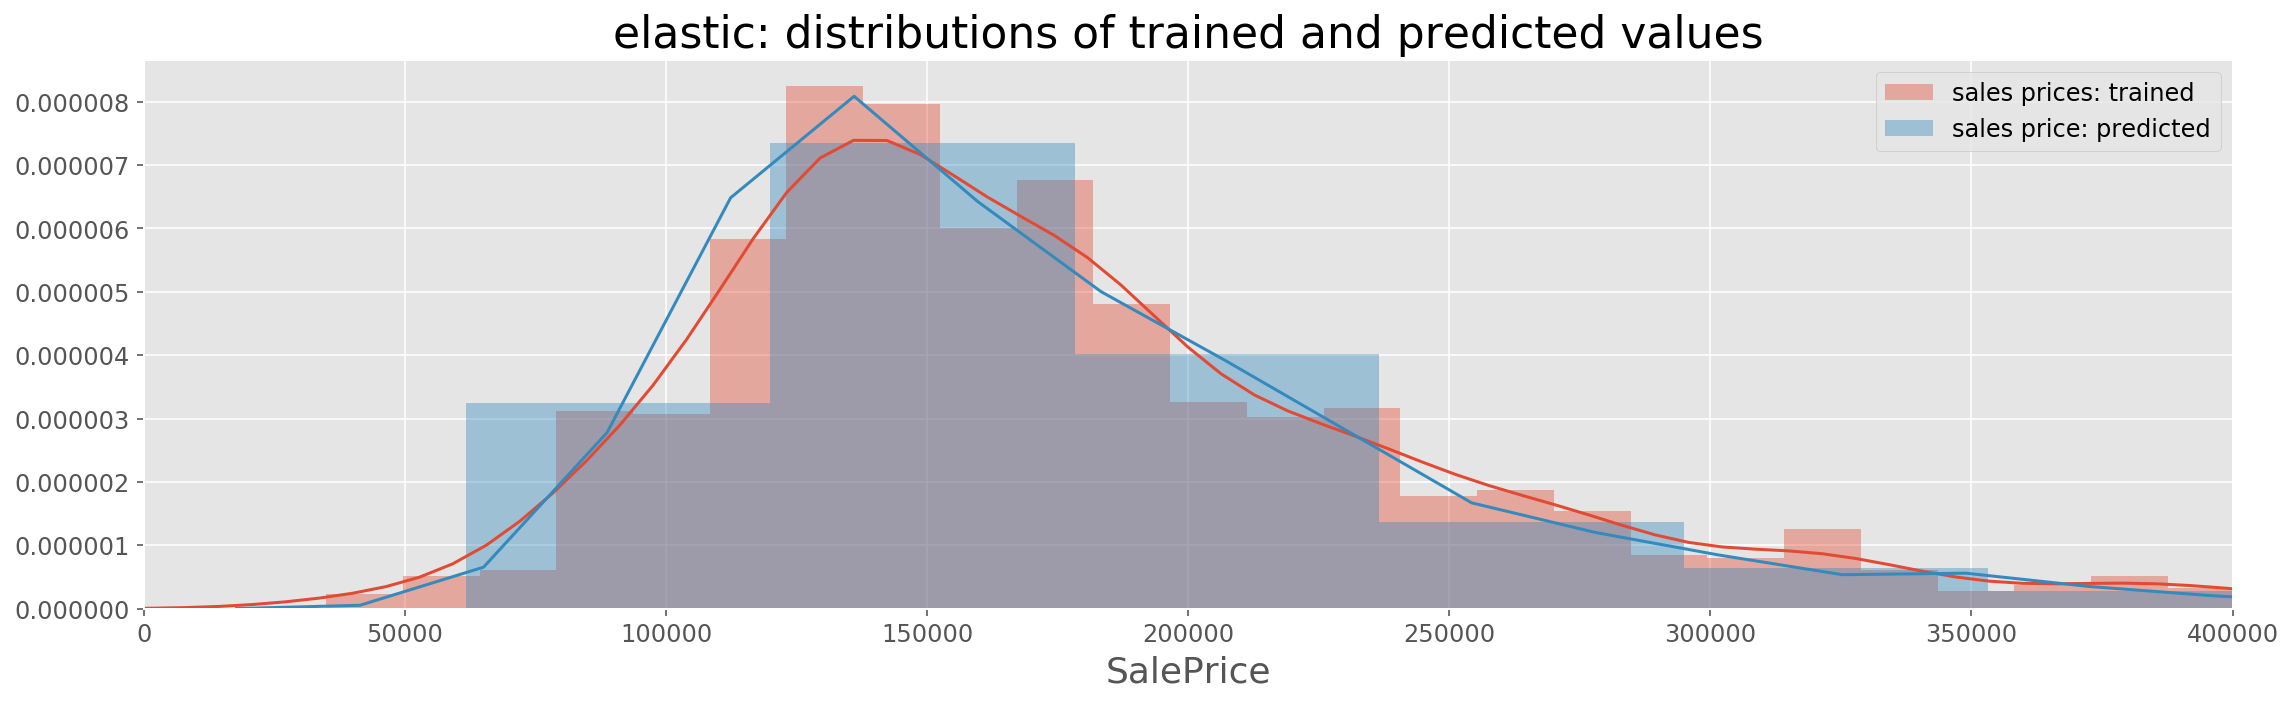

elastic min/max of predicted sales prices
61641 2977830


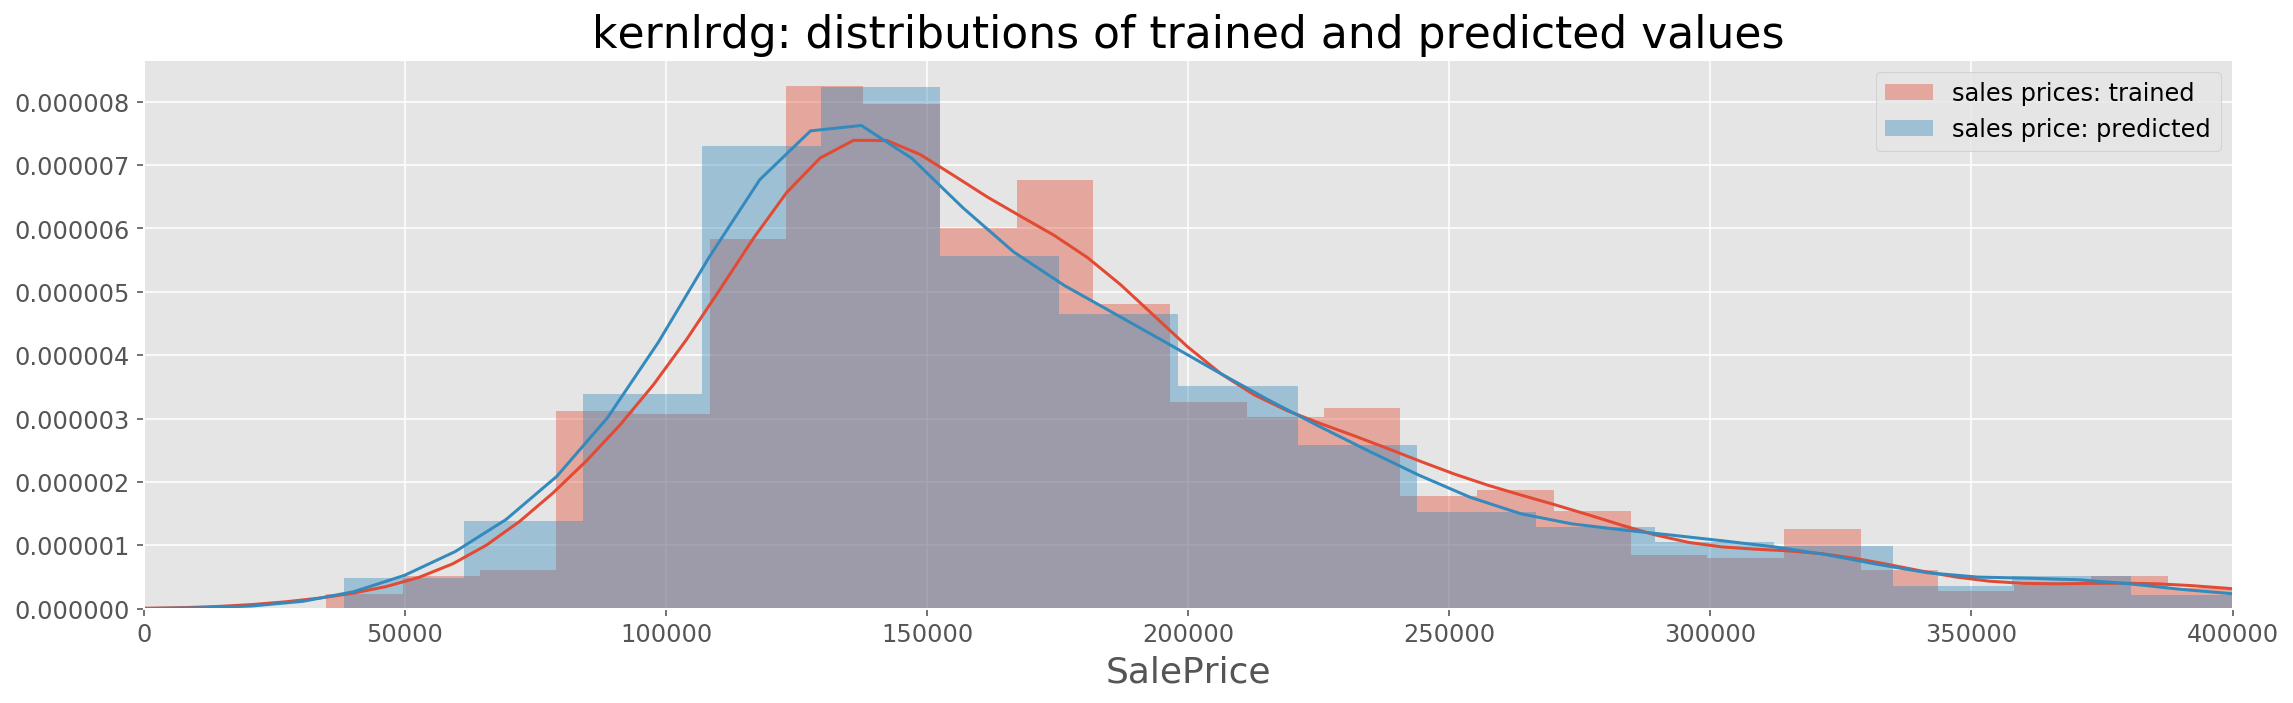

kernlrdg min/max of predicted sales prices
38426 1179149


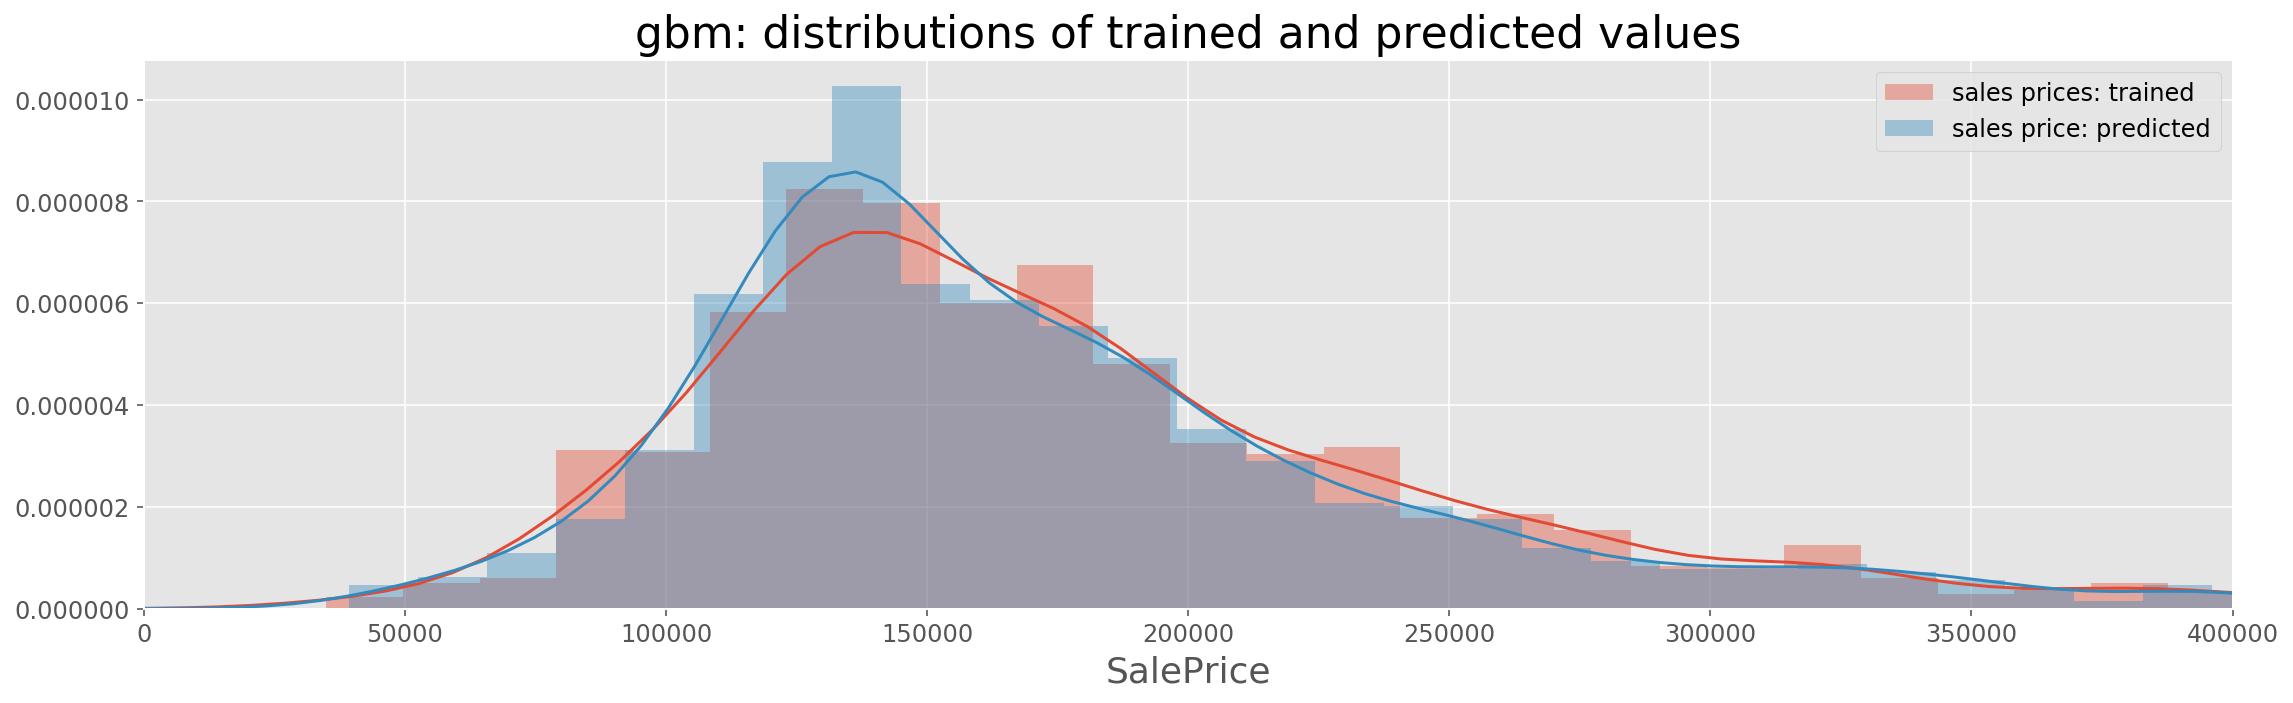

gbm min/max of predicted sales prices
39312 607585


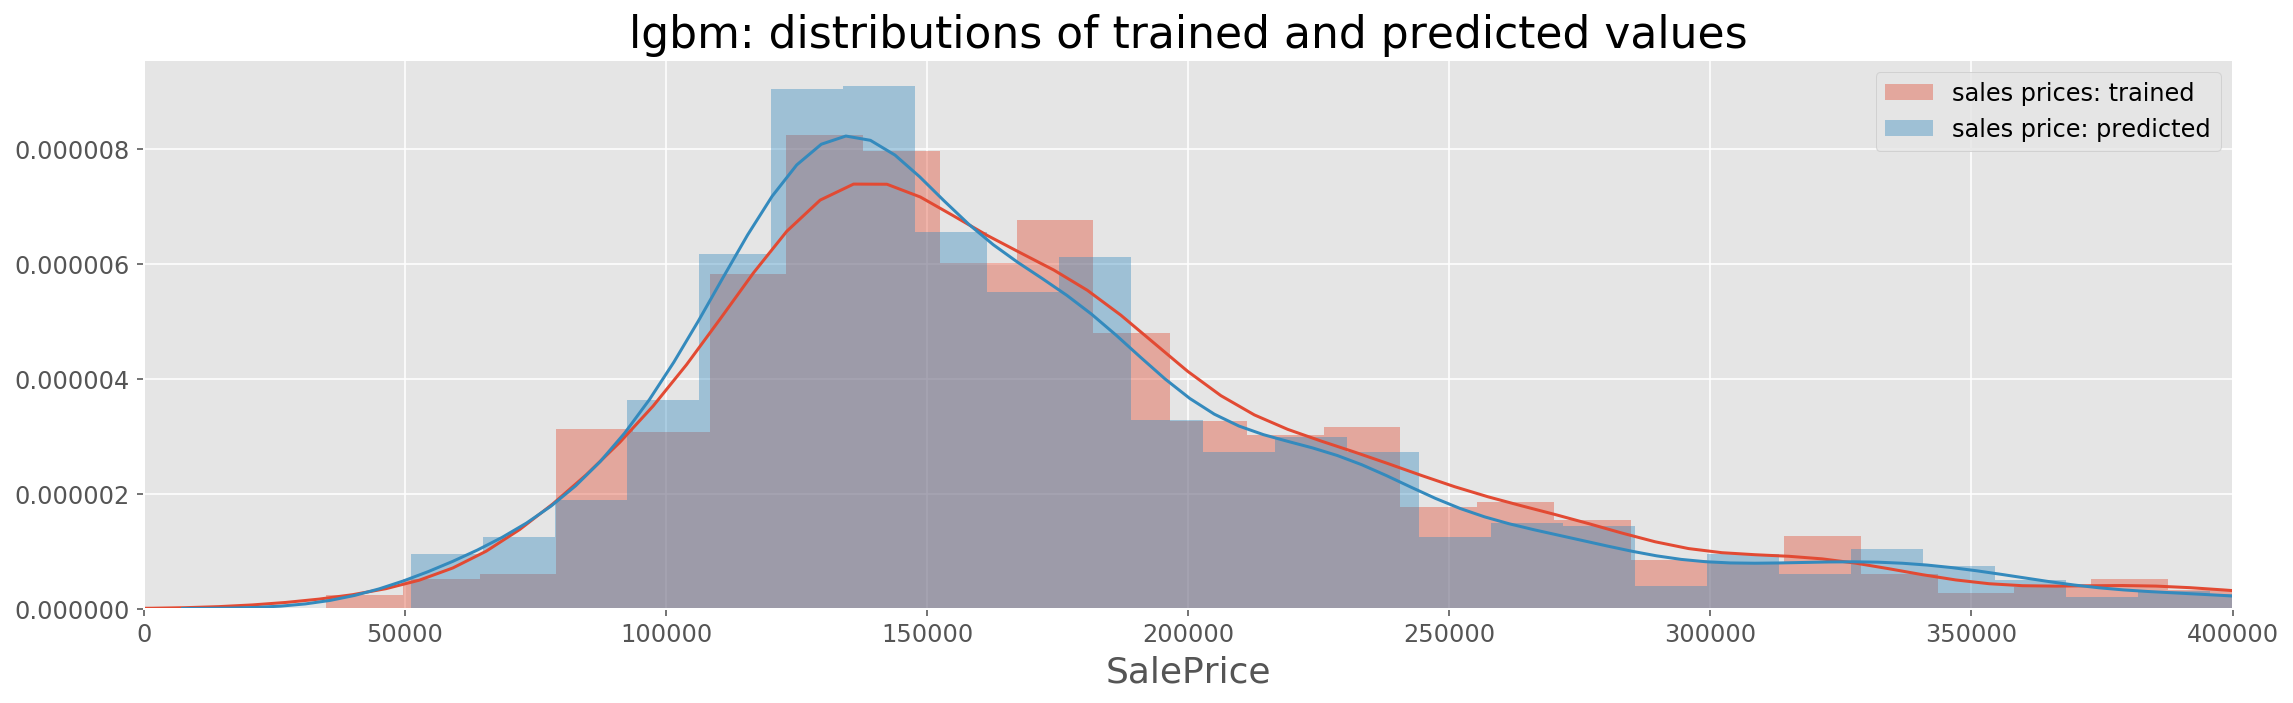

lgbm min/max of predicted sales prices
51178 561164


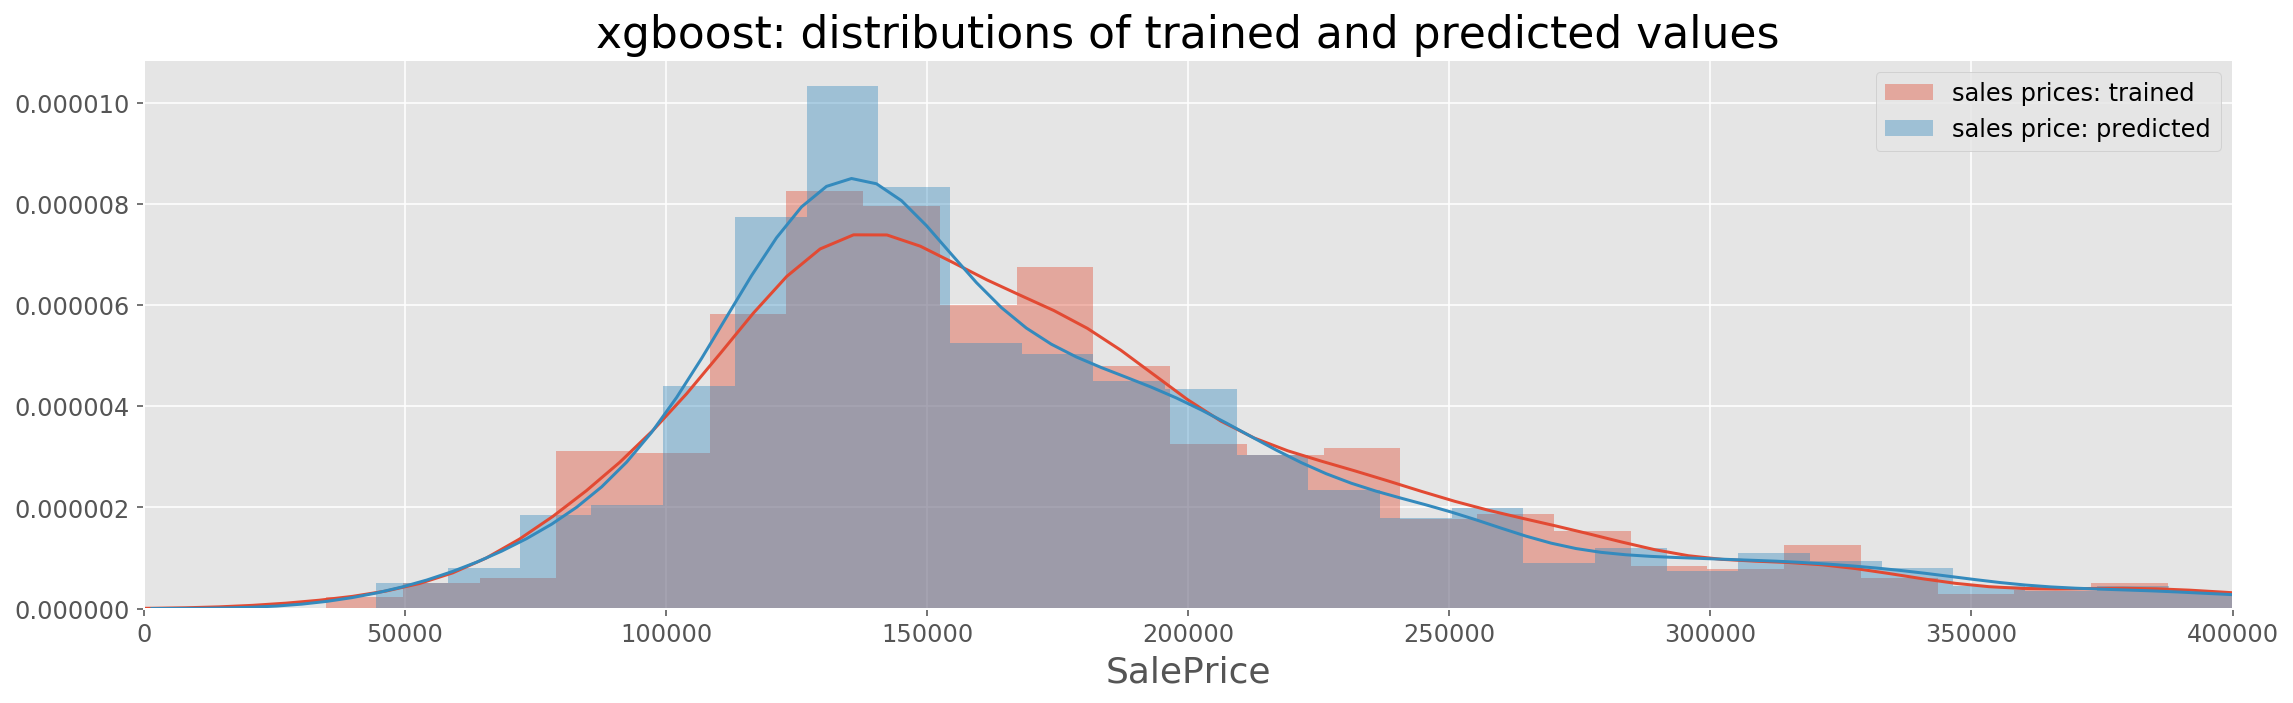

xgboost min/max of predicted sales prices
44546 566193


In [62]:
p_stats = [df.SalePrice.describe()]

for idx, clf_name in zip(range(0,7), clf_names):
    plt.figure(figsize=(16,5))
    p_tmp = pd.DataFrame(predictions[idx], columns=["preds"])
    sns.distplot(df.SalePrice)
    sns.distplot(p_tmp)
    plt.legend(["sales prices: trained", "sales price: predicted"])
    plt.xlim(0, 400_000)
    plt.title(f"{clf_name.strip()}: distributions of trained and predicted values")
    plt.tight_layout()
    plt.show()
    print(f"{clf_name.strip()} min/max of predicted sales prices")
    print(f"{p_tmp.min().values[0]:.0f} {p_tmp.max().values[0]:.0f}")
    p_stats.append(p_tmp.describe())

**Ridge, Lasso, ElasticNet and KernelRidge predict a maximum value of way more than 1 million USD** which doesn't seem right at all. 

Let's see where the outlier(s) come from.

In [63]:
for idx, clf_name in enumerate(clf_names):
    p = pd.DataFrame(predictions[idx])
    # filter all values beyond max sale price in training data
    p_out = p[p[0] > 755_000].astype(int) 
    if len(p_out) > 0:
        p_out.columns = [f"{clf_name.strip().capitalize()} _ predicted SalePrice"]
        display(p_out)

Ridge _ predicted SalePrice
1089                      1176738

Lasso _ predicted SalePrice
1089                      3267231

Elastic _ predicted SalePrice
1089                        2977830

Kernlrdg _ predicted SalePrice
1089                         1179149

So there is one single observation in the test data with the index 1089, that very likely can't accurately be predicted by the linear classifiers. 

I have looked at the features and **found a possible error in the test data: The house was sold BEFORE it was built...** 😃

In [64]:
dtest.loc[1089][["YearBuilt", "YrSold", "YrActualAge"]]

YearBuilt      2008
YrSold         2007
YrActualAge      -1
Name: 1089, dtype: int64

So we should either cap the prediction for that observations to reasonable maximum or correct the erroneous feature in the test set.

<font color="purple"> 
## Experiment 10: How do we pick the most diverse set of models for an ensemble?

The more different the models that we choose for an ensemble the better it'll perform. We'll set up a correlation matrix and examine the correlations with a heatmap.

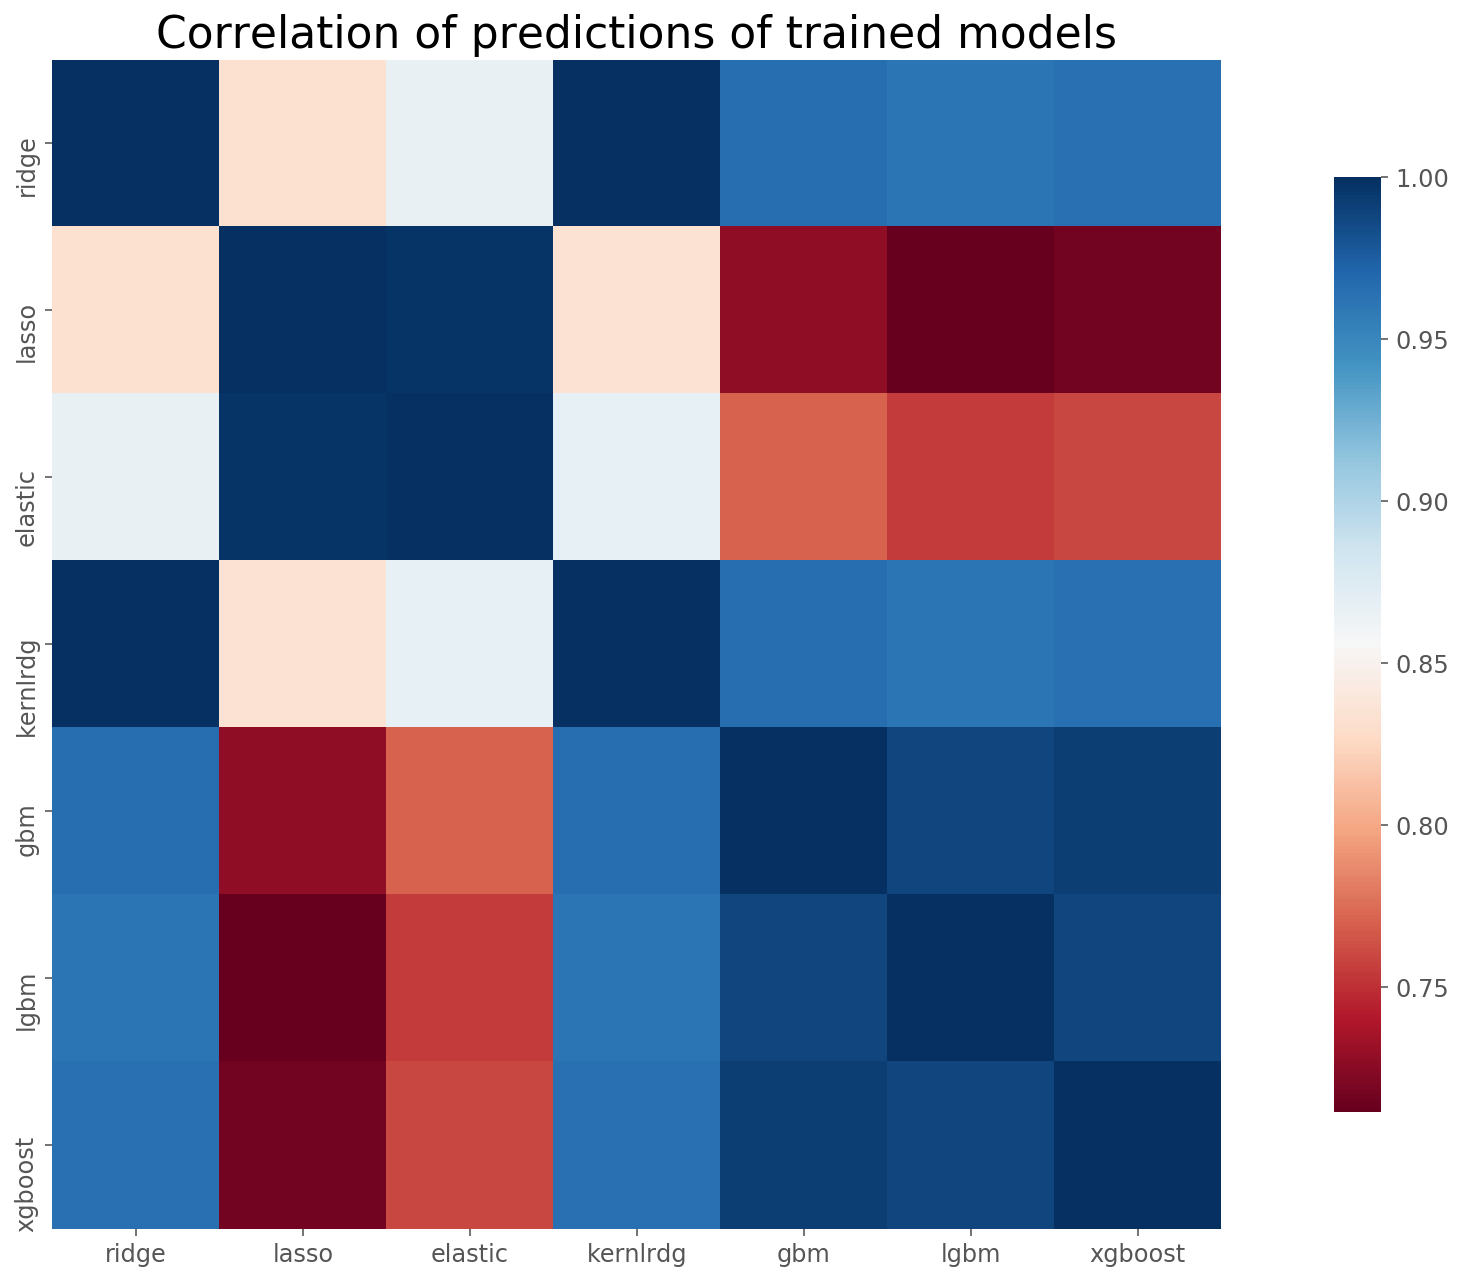

In [65]:
X = dtrain[dtrain.GrLivArea < 4000].drop(["SalePrice"], axis=1)

sk = pd.DataFrame(X.iloc[:, :60].skew(), columns=["skewness"])
sk = sk[sk.skewness > .75]
for feature_ in sk.index:
    X[feature_] = boxcox1p(X[feature_], 0.15)

y = np.log1p(dtrain[dtrain.GrLivArea < 4000].SalePrice)
metric = 'neg_mean_squared_error'

predictions = []
# create an array for stats, set stats of training set as first column
pred_stats = [df.SalePrice.describe()]

for clf_name, clf in zip(clf_names, classifiers):
    clf.fit(X, y)
    preds = clf.predict(X_test)
    # reverse log transform predicted sale prices with np.expm1()
    predictions.append(np.expm1(preds))
    pred_stats.append(pd.DataFrame(np.expm1(preds)).describe())

# calculate correlations of predicted values between each of the models
pr_corr = pd.DataFrame(predictions).T.corr()
pr_corr.columns = [x.strip() for x in clf_names]
pr_corr.index = [x.strip() for x in clf_names]
plt.figure(figsize=(16,9))
sns.heatmap(pr_corr, cmap="RdBu", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation of predictions of trained models")
plt.tight_layout()
plt.show()

- The pure linear models Ridge, Lasso and ElasticNet are highly correlated. 
- The other obvious group seems to GBM, LightGBM and XGBoost. 
- KernelRidge sticks out in itself.

Let's do the same – but now based on the statistics of the predicted values rather than on the values itself.

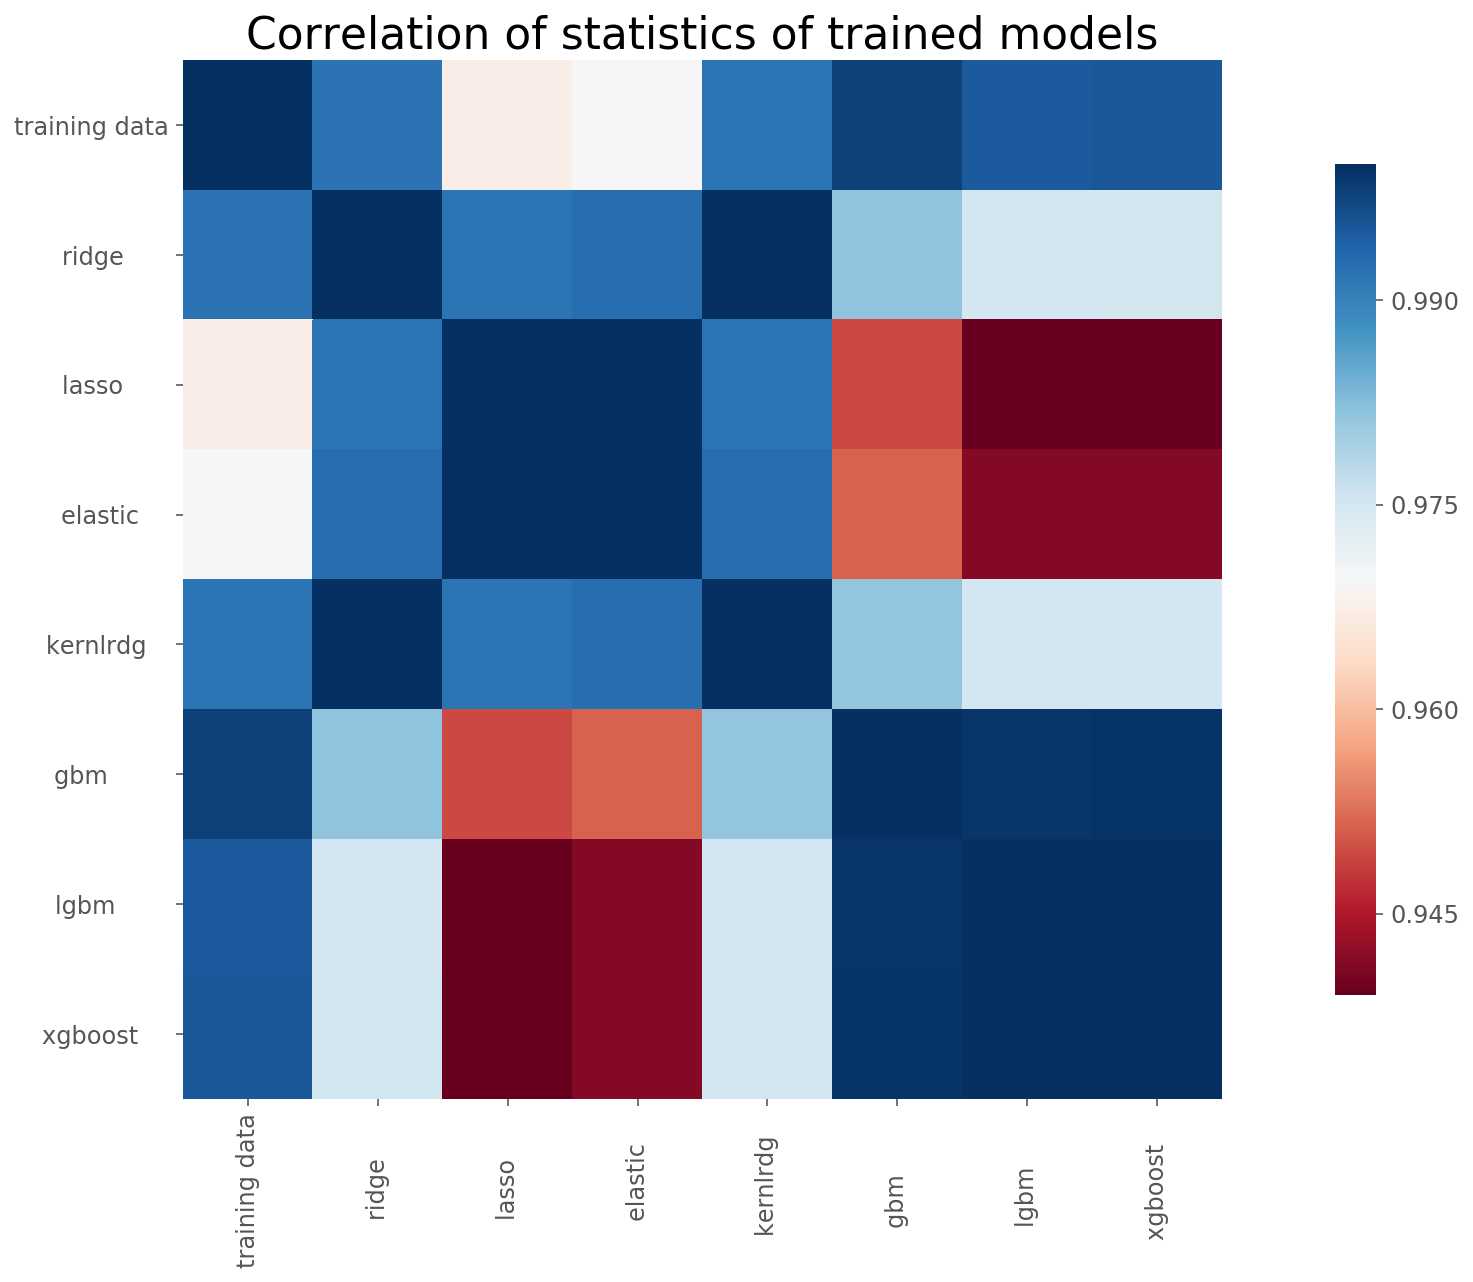

In [66]:
p = pd.concat(pred_stats, axis=1)
cols = ["training data"]
cols.extend(clf_names)
p.columns = cols
plt.figure(figsize=(16,9))
sns.heatmap(p.corr(), cmap="RdBu", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation of statistics of trained models")
plt.tight_layout()
plt.show()

- We notice the three groups we have identified in the last heatmap. 
- We see also that the statistics of sales prices in the training data is more accurately replicated by the non-linear models.

<font color="darkgreen"> 
## 😎 Conclusions from experiments...

<span style="color:darkgreen">
- We get **astonishingly decent results from training on raw data and single features only.**
- We get **decent results too, if we just train on either raw numerical or categorical data.**
- We **achieved *some* improvement by data cleaning and feature engineering, but not that much.** Doea that change if we tune hyperparameters? 
- **Log transforming SalePrice is very effective as well as box cox transforming several other skewed features.**
- **Removing the outliers beyond 4000 square feet in `GrLivArea` is super effective too.**
- Looking closely at predictions is valuable. We found a hefty outlier that we need to fix before submission.
- We have identified the differences in our trained models which will help us building an ensemble.
- Applying PCA didn't help in any way to reduce possible collinearity.

Promising scores from 
- Ridge 
- Lasso
- ElasticNet
- KernelRidge
- GBM
- LightGBM
- XGBoost 

LinearRegression, Support Vector and Random Forest Regression do not seem to work well on the engineered data. There might be too much collinearity in the expanded features or in the data set in general.

</span>

# 5. Hypertuning the engines

![](https://i.imgur.com/3cuLUjm.jpg)
Photo by Michael Mroczek

> <span style="color:darkred">Skip ahead to the next chapter (6.) if you don't want to find **new** parameters.

For each of the promising classifiers we now try to find optimal hyperparameters with a search grid and sklearn's `GridSearchCV()`. (*commented out to allow for faster execution of whole kernel*)

As a starting point I looked into several of the kernels that I already have mentioned and tuned based on their findings.


In [67]:
# X = dtrain[dtrain.GrLivArea < 4000].drop(["SalePrice"], axis=1)
# y = np.log1p(dtrain[dtrain.GrLivArea < 4000].SalePrice)
# metric = 'neg_mean_squared_error'

# sk = pd.DataFrame(X.iloc[:, :60].skew(), columns=["skewness"])
# sk = sk[sk.skewness > .75]
# for feature_ in sk.index:
#     X[feature_] = boxcox1p(X[feature_], 0.15)

In [68]:
# # GridSearchCV Ridge
# ridge = make_pipeline(RobustScaler(), Ridge(alpha=15, random_state=1))
# param_grid = {
#     'ridge__alpha' : np.linspace(12, 18, 10),
#     'ridge__max_iter' : np.linspace(10, 200, 5),
# }
# search = GridSearchCV(ridge, param_grid, cv=5, scoring=metric, n_jobs=-1)
# search.fit(X, y)
# print(f"{search.best_params_}")
# print(f"{np.sqrt(-search.best_score_):.4}")

In [69]:
# # GridSearchCV Lasso
# lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.00044, random_state=1))
# param_grid = {'lasso__alpha' : np.linspace(0.00005, 0.001, 30)}
# search = GridSearchCV(lasso, param_grid, cv=5, scoring=metric, n_jobs=-1)
# search.fit(X, y)
# print(f"{search.best_params_}")
# print(f"{np.sqrt(-search.best_score_):.4}")

In [70]:
# # GridSearchCV ElasticNet
# elastic = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=1, random_state=1))
# param_grid = {
#     'elasticnet__alpha' : np.linspace(0.0001, 0.001, 10),
#     'elasticnet__l1_ratio' : np.linspace(0.5, 1, 10),
# }
# search = GridSearchCV(elastic, param_grid, cv=5, scoring=metric, n_jobs=-1)
# search.fit(X, y)
# print(f"{search.best_params_}")
# print(f"{np.sqrt(-search.best_score_):.4}")

In [71]:
# # GridSearchCV KernelRidge
# kernel = KernelRidge(alpha=1)
# param_grid = {'alpha' : np.linspace(0.001, 1, 30)}
# search = GridSearchCV(kernel, param_grid, cv=5, scoring=metric, n_jobs=-1)
# search.fit(X, y)
# print(f"{search.best_params_}")
# print(f"{np.sqrt(-search.best_score_):.4}")

In [72]:
# # GridSearchCV GBM
# # huber loss is considered less sensitive to outliers
# gbm = GradientBoostingRegressor(n_estimators=2500, learning_rate=0.04,
#                                    max_depth=2, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state=1)
# param_grid = {
#     'n_estimators' : [2500],
#     'learning_rate' : [0.03, 0.04, 0.05],
#     'max_depth' : [2],
# }
# search = GridSearchCV(gbm, param_grid, cv=5, scoring=metric, n_jobs=-1)
# search.fit(X, y)
# print(f"{search.best_params_}")
# print(f"{np.sqrt(-search.best_score_):.4}")

In [73]:
# # GridSearchCV LightGBM
# lgbm = lgb.LGBMRegressor(objective='regression', num_leaves=5,
#                         learning_rate=0.03, n_estimators=8000,
#                         max_bin=55, bagging_fraction=0.8,
#                         bagging_freq=5, feature_fraction=0.23,
#                         feature_fraction_seed=9, bagging_seed=9,
#                         min_data_in_leaf=6, min_sum_hessian_in_leaf=11)
# param_grid = {
#     'n_estimators' : [8000],
#     'learning_rate' : [0.03],
# }
# search = GridSearchCV(clf, param_grid, cv=5, scoring=metric, n_jobs=-1)
# search.fit(X, y)
# print(f"{search.best_params_}")
# print(f"{np.sqrt(-search.best_score_):.4}")

In [74]:
# # GridSearchCV XGBoost
# xgbreg = xgb.XGBRegressor(objective="reg:squarederror",
#                              colsample_bytree=0.46, gamma=0.047, 
#                              learning_rate=0.04, max_depth=2, 
#                              min_child_weight=0.5, n_estimators=2000,
#                              reg_alpha=0.46, reg_lambda=0.86,
#                              subsample=0.52, random_state=1, n_jobs=-1)

# param_grid = {
#     'xgbregressor__max_depth' : [2],
#     'xgbregressor__estimators' : [1600, 1800, 2000],
#     "xgbregressor__learning_rate" : [0.02, 0.03, 0.04],
#     "xgbregressor__min_child_weight" : [0.2, 0.3, 0.4],
#     }
# search = GridSearchCV(clf, param_grid, cv=3, scoring=metric, n_jobs=-1)
# search.fit(X, y)
# print(f"{search.best_params_}")
# print(f"{np.sqrt(-search.best_score_):.4}")

In [75]:
# # try a stacked regressor on top of the seven tuned classifiers 
# # leaving out xgboost in the stack for now since it seems to crash the stacked regressor
# clf_to_stack = [lasso, ridge, elastic, kernel, gbm, lgbm]

# stack = StackingCVRegressor(regressors=(clf_to_stack),
#                             meta_regressor=xgb.XGBRegressor(objective="reg:squarederror", n_jobs=-1), 
#                             use_features_in_secondary=True)

# print(f"{np.sqrt(-cross_val_score(stack, X, y, scoring=metric)).mean():.4f} Log Error")

Job done... On to training on the full data set and submission...

# 6. Train and submit

![](https://i.imgur.com/4ujY3Q8.jpg)
Photo by VanveenJF

In [76]:
X = dtrain[dtrain.GrLivArea < 4000].drop(["SalePrice"], axis=1)
y = np.log1p(dtrain[dtrain.GrLivArea < 4000].SalePrice)

X_test = dtest
# fixing the outlier where YrSold is earlier than YrBuilt
X_test.loc[1089]["YrSold"] = 2009
X_test.loc[1089]["YrActualAge"] = 0

metric = 'neg_mean_squared_error'

In [77]:
# apply box cox transformation on numerical features
# skipping the one hot encoded features as well as engineered ones
sk = pd.DataFrame(X.iloc[:, :60].skew(), columns=["skewness"])
sk = sk[sk.skewness > .75]
for feature_ in sk.index:
    X[feature_] = boxcox1p(X[feature_], 0.15)
    X_test[feature_] = boxcox1p(X_test[feature_], 0.15)

In [78]:
ridge   = make_pipeline(RobustScaler(), Ridge(alpha=15, random_state=1))
lasso   = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
elastic = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, 
                                                   l1_ratio=1, random_state=1))
kernel  = KernelRidge(alpha=1.0)

gbm = GradientBoostingRegressor(n_estimators=2500, learning_rate=0.04,
                                   max_depth=2, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state=1)

lgbm = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                        learning_rate=0.03, n_estimators=8000,
                        max_bin=55, bagging_fraction=0.8,
                        bagging_freq=5, feature_fraction=0.23,
                        feature_fraction_seed=9, bagging_seed=9,
                        min_data_in_leaf=6, min_sum_hessian_in_leaf=11)

xgbreg = xgb.XGBRegressor(objective="reg:squarederror",
                             colsample_bytree=0.46, gamma=0.047, 
                             learning_rate=0.04, max_depth=2, 
                             min_child_weight=0.5, n_estimators=2000,
                             reg_alpha=0.46, reg_lambda=0.86,
                             subsample=0.52, random_state=1, n_jobs=-1)

In [79]:
classifiers = [ridge, lasso, elastic, kernel, gbm, lgbm, xgbreg]
clf_names   = ["ridge  ", "lasso  ", "elastic", "kernel ", "gbm    ", "lgbm   ", "xgbreg "]

predictions_exp = []

for clf_name, clf in zip(clf_names, classifiers):
    print(f"{clf_name} {np.sqrt(-cross_val_score(clf, X, y, scoring=metric).mean()):.5f}")
    clf.fit(X, y)
    preds = clf.predict(X_test)
    predictions_exp.append(np.expm1(preds))

ridge   0.11399
lasso   0.11174
elastic 0.11174
kernel  0.11880
gbm     0.11369
lgbm    0.12349
xgbreg  0.12274


In [80]:
prediction_final = pd.DataFrame(predictions_exp).mean().T.values
submission = pd.DataFrame({'Id': df_test.Id.values, 'SalePrice': prediction_final})
submission.to_csv(f"submission.csv", index=False)

## Congrats! We made it... 

![](https://i.imgur.com/bizOcnq.jpg)
Photo by Jakob Owens

# 7. Conclusion

<span style="color:darkgreen">
**Pros:**
- I was really surprised to see **how much effect removing just a few outliers and fixing the skewed distribution of the target variable had.**
- A lot of the gains I seem to have derived from trying, combining and tuning various classifiers rather than from feature engineering.
- **Most of my insights and learning came from making mistakes and fixing these.** Especially be visualizing the relevant parts of the data.
- The Ames Housing data set is comfortably small to allow for fast iteration and experimentation. 
- At the same time the data feels sufficiently complex to learn a lot. 
    
<span style="color:darkred">
**Cons:**
- I am **not satisfied with the results of the data cleaning and feature engineering.** The results are pretty close to what I can achieve with [my automated sklearn Pipeline playground](https://www.kaggle.com/chmaxx/sklearn-pipeline-playground-for-10-classifiers). Either I have made mistakes that spoiled the efforts. Or there is not much that we can gain on this data with cleaning and creating new variables.
- I am **disappointed with the results of the StackingCV classifier.** Ensembling by simply averaging brought quite some improvement. I would have expected the Stacking Regressor to be more valuable. Again: I suspect my mistakes being the culprit. Others seem to have made much more progress employing stacking.

# References

[Pedro Marcelino](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)<br>
[Serigne](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)<br>
[juliencs](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)<br>
[Kirill Aleksandrovich](https://www.kaggle.com/aleksandrovich/top-8-ensemble-of-models)<br>
[maasguantity](https://www.kaggle.com/massquantity/all-you-need-is-pca-lb-0-11421-top-4#Ensemble-Methods)<br>
[Alexandru Papiu](https://www.kaggle.com/apapiu/regularized-linear-models)<br>
[MJ Bahmani](https://www.kaggle.com/mjbahmani/the-data-scientist-s-toolbox-tutorial-1)<br>
[SonniHS](https://www.kaggle.com/sonnihs/house-prices)<br>
[Aleksandrs Gehsbargs](https://www.kaggle.com/agehsbarg/top-10-0-10943-stacking-mice-and-brutal-force)<br>
[deja vu](https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner/notebook)<br>

[DanB](https://www.kaggle.com/dansbecker/xgboost)<br>
[OnlineStatBook](http://onlinestatbook.com/2/index.html)<br>
[Google ML Guides](https://developers.google.com/machine-learning/crash-course/ml-intro)<br>
[Jake VanderPlas's Data Science Handbook](https://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/00.00-Preface.ipynb)

[Blog Post NYT Data Science Academy](https://nycdatascience.com/blog/student-works/predicting-house-price-in-ames-iowa-using-machine-learning/)